In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import ttest_rel
from itertools import product
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_tesco = pd.read_pickle(r'df_tesco_marker_V3.pkl')

df_site_agg = df_tesco.groupby(['Site Name','PBL'])[['Total Sales Value','exclShopSales','volumeADO',\
       'volumeUL95','shopSalesFromFuel','totalSalesEsso','UL 95_ Approved Price Vs Marker Price',\
       'ADO_ Approved Price Vs Marker Price']].agg({'median_':'median','sum_':'sum'}).reset_index()

df_site_agg.columns = [''.join(col).strip() for col in df_site_agg.columns.values]

In [3]:
data3 = pd.read_pickle('data3.pkl')

In [4]:
df_site_agg_2  = data3.merge(df_site_agg,how='left',on='PBL')

In [44]:
cols = pd.read_excel(r'cols_site.xlsx').query('is_sel==1')['cols'].tolist()[4:]

In [5]:
path = "D:\\UK PVO\\siteDataPrep\\site_data_attr_plots\\"
y_vals = [ 'median_Total Sales Value','median_exclShopSales', 'median_volumeADO', 'median_volumeUL95',\
           'median_shopSalesFromFuel', 'median_totalSalesEsso','median_UL 95_ Approved Price Vs Marker Price',\
           'median_ADO_ Approved Price Vs Marker Price']

24 Hours
Opening Time
Closing Time
Plot Size Front
Plot Size Depth
Plot Size Area
Quality
Access
Visibility
Pri Traffic
Sec Traffic


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Carriageway Barrier
Highly Transient
Traffic Speed
Forecourt Layout
MF Pumps
MF Positions
HGV Pumps
HGV Positions
LPG Pumps
LPG Positions
MPDs
MF Volume
Automat Service
Diesel Only Cards
Customer Toilets
Shop Area
Shop Sales
Shop Quality
Dedicated Spaces
Pedestrian Customers
Shop Competition
Alcohol
Lottery
Take Away Food
Hot Drinks
Microwave
In Store Bakery
Coffee Offer Brand
Car Product Range
Catering Quality
Catering Competition
Car Wash Quality
Car Wash Competition
Hand Car Wash
Drive-thru
Survey Date
TPS OPT-OUT
CTPS OPT-OUT


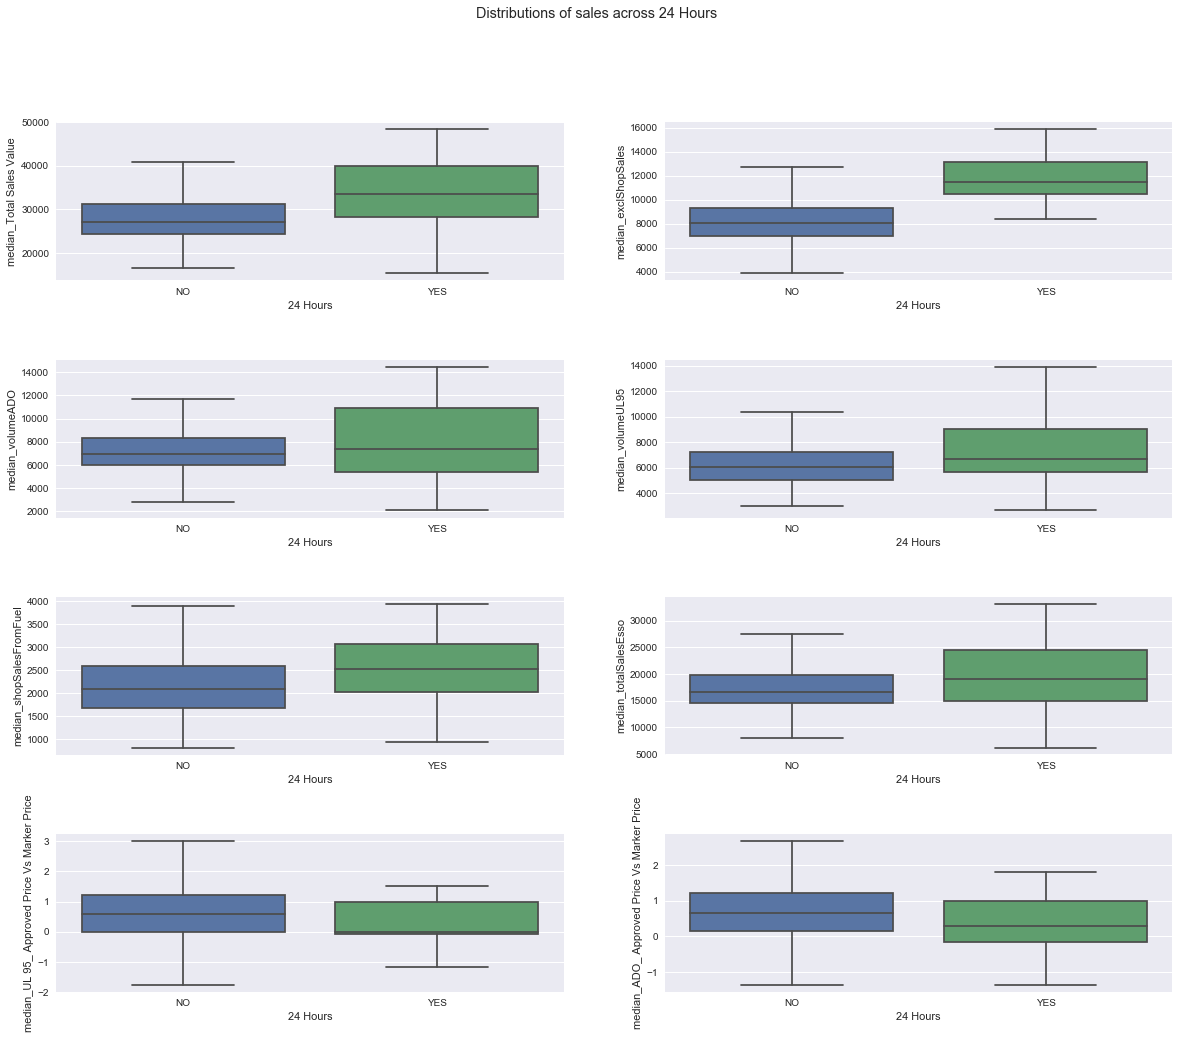

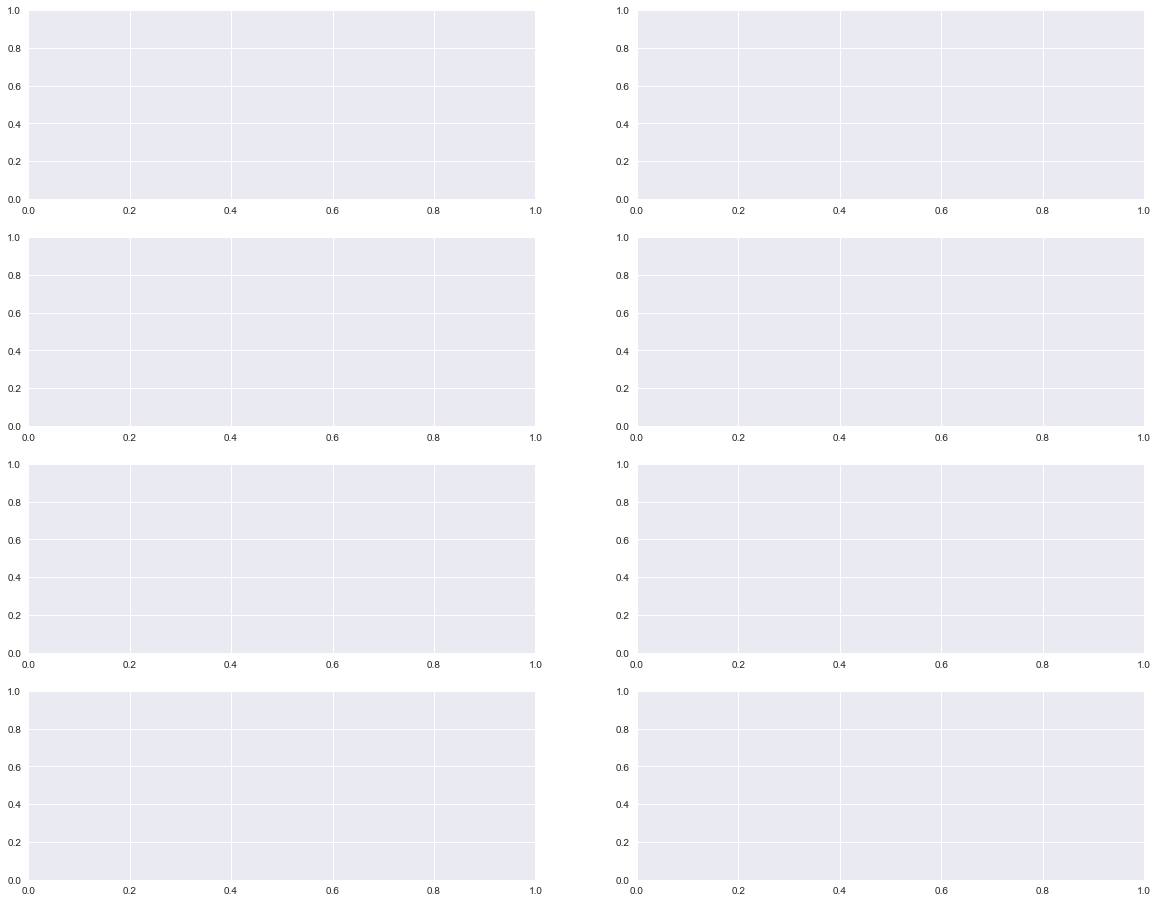

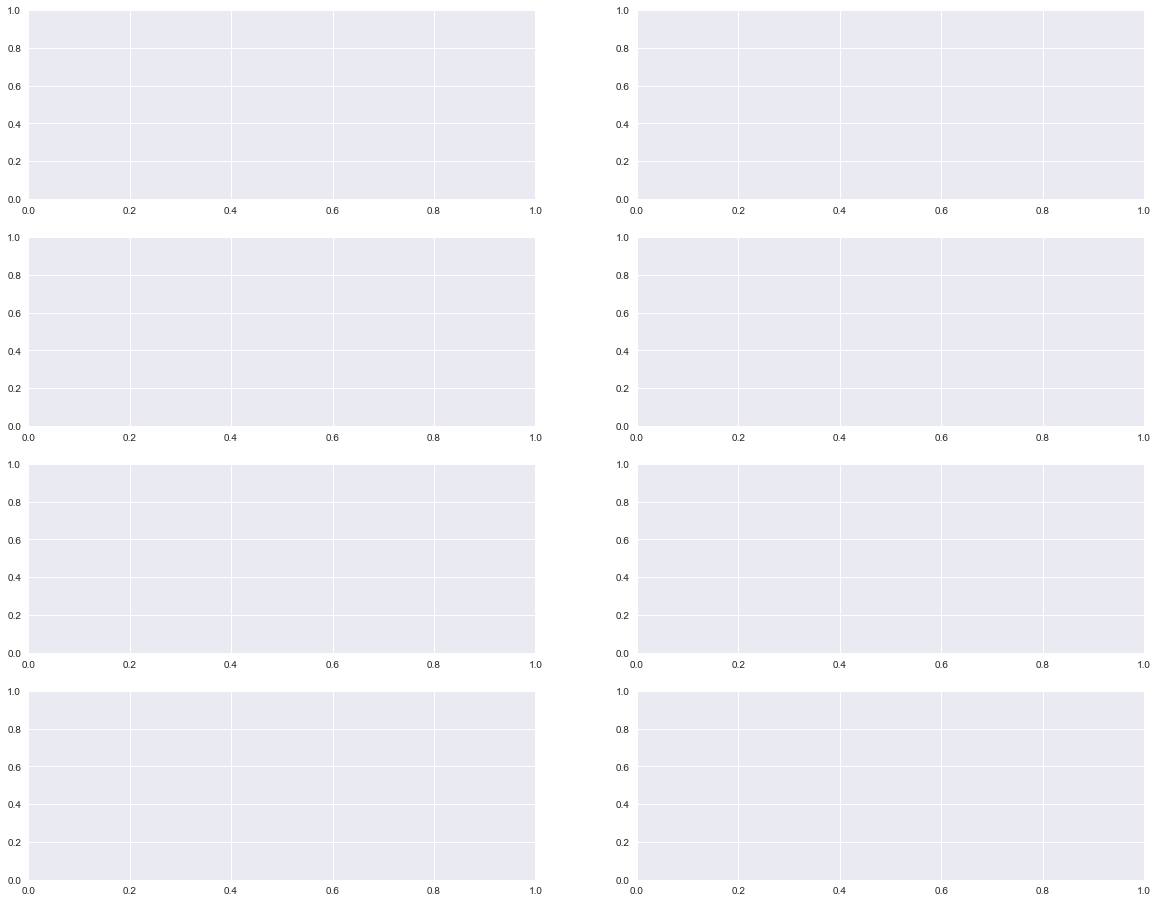

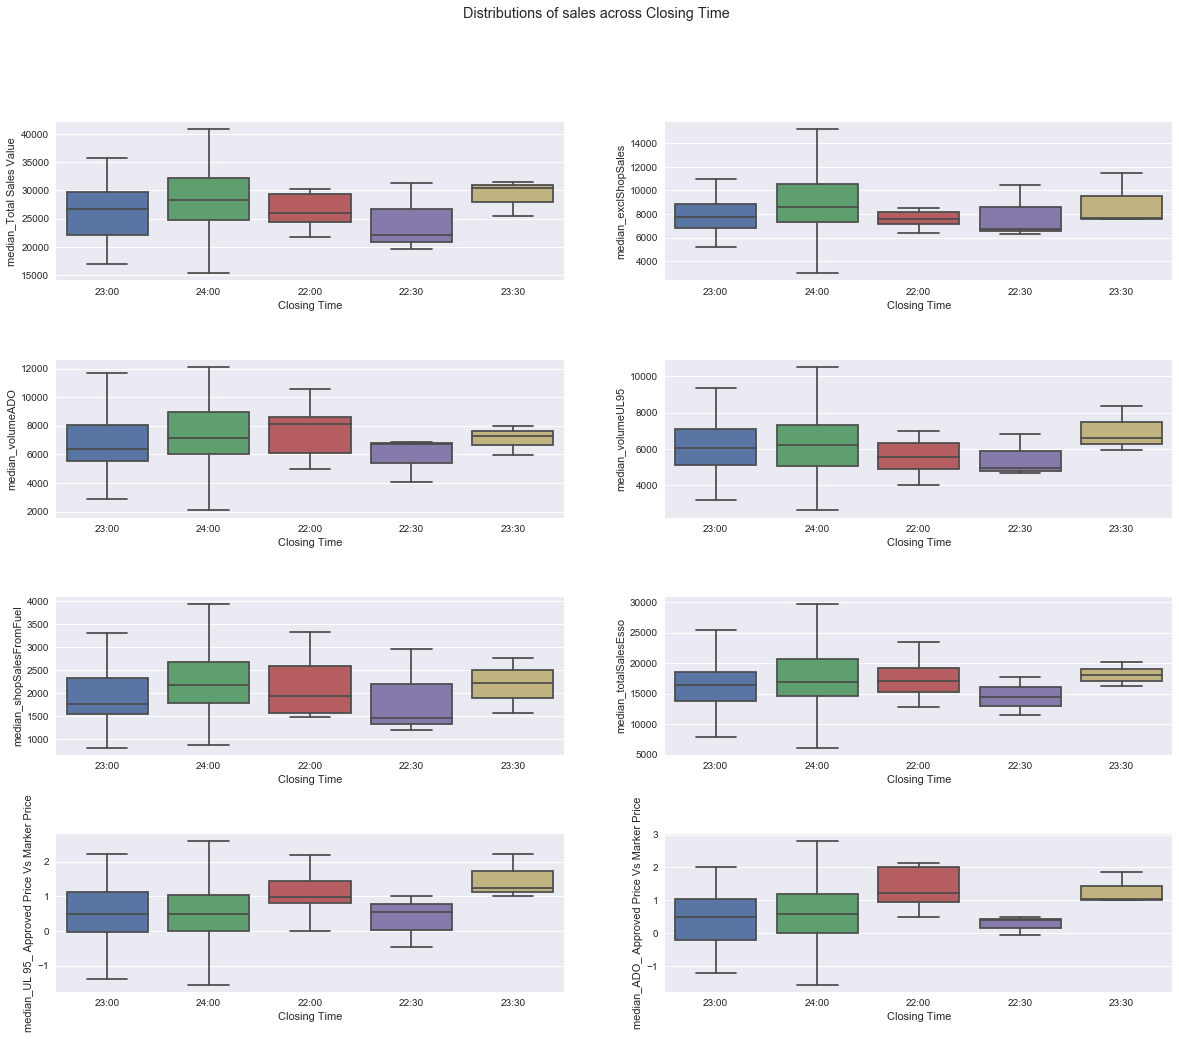

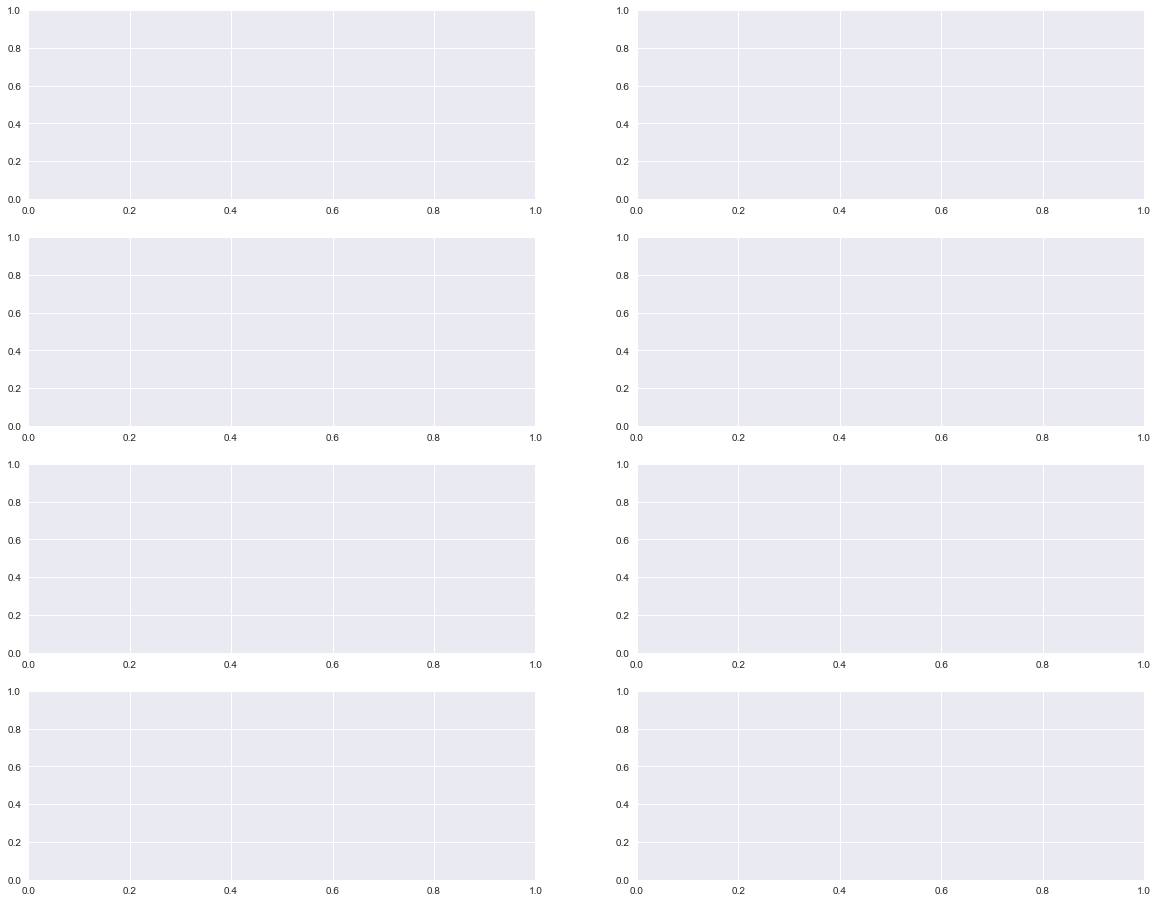

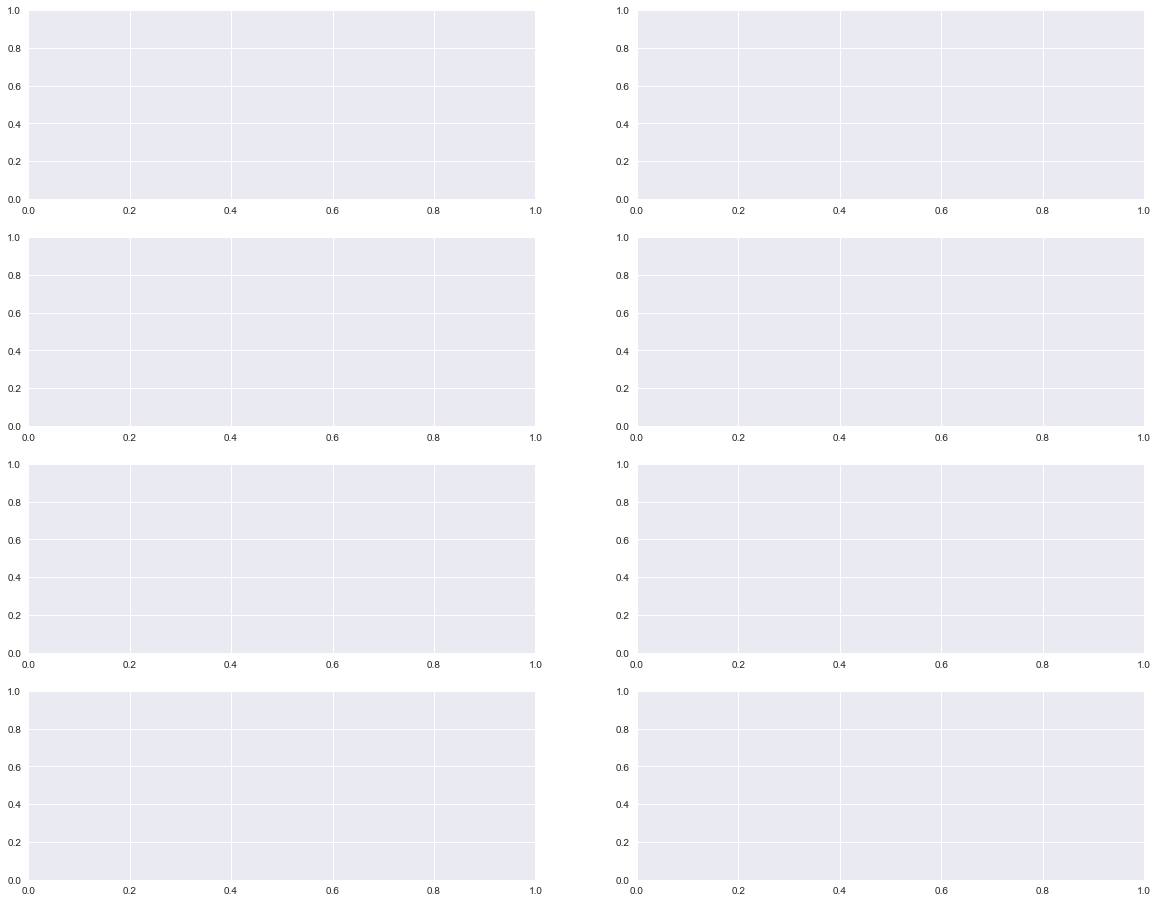

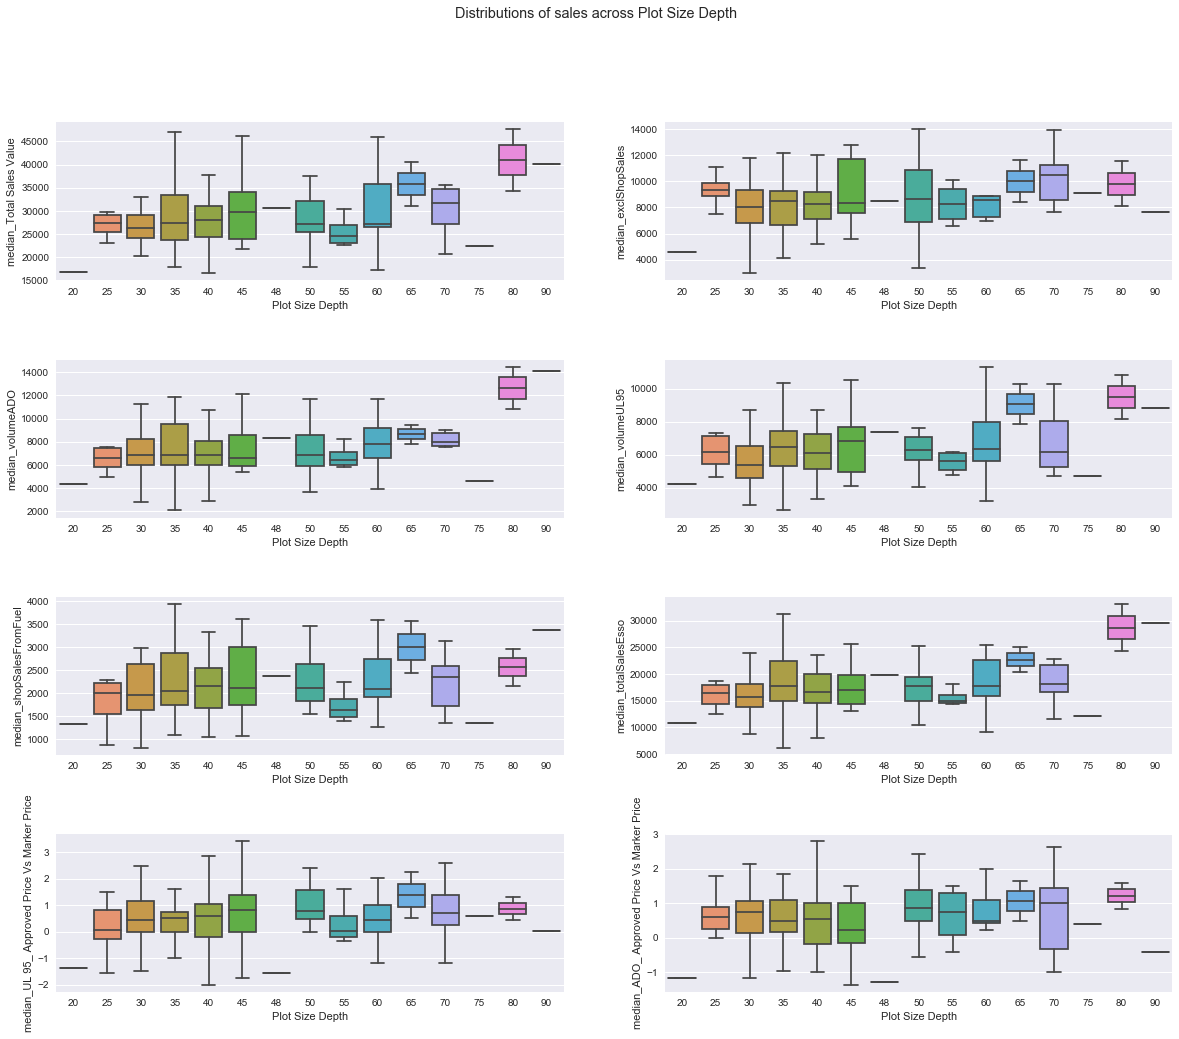

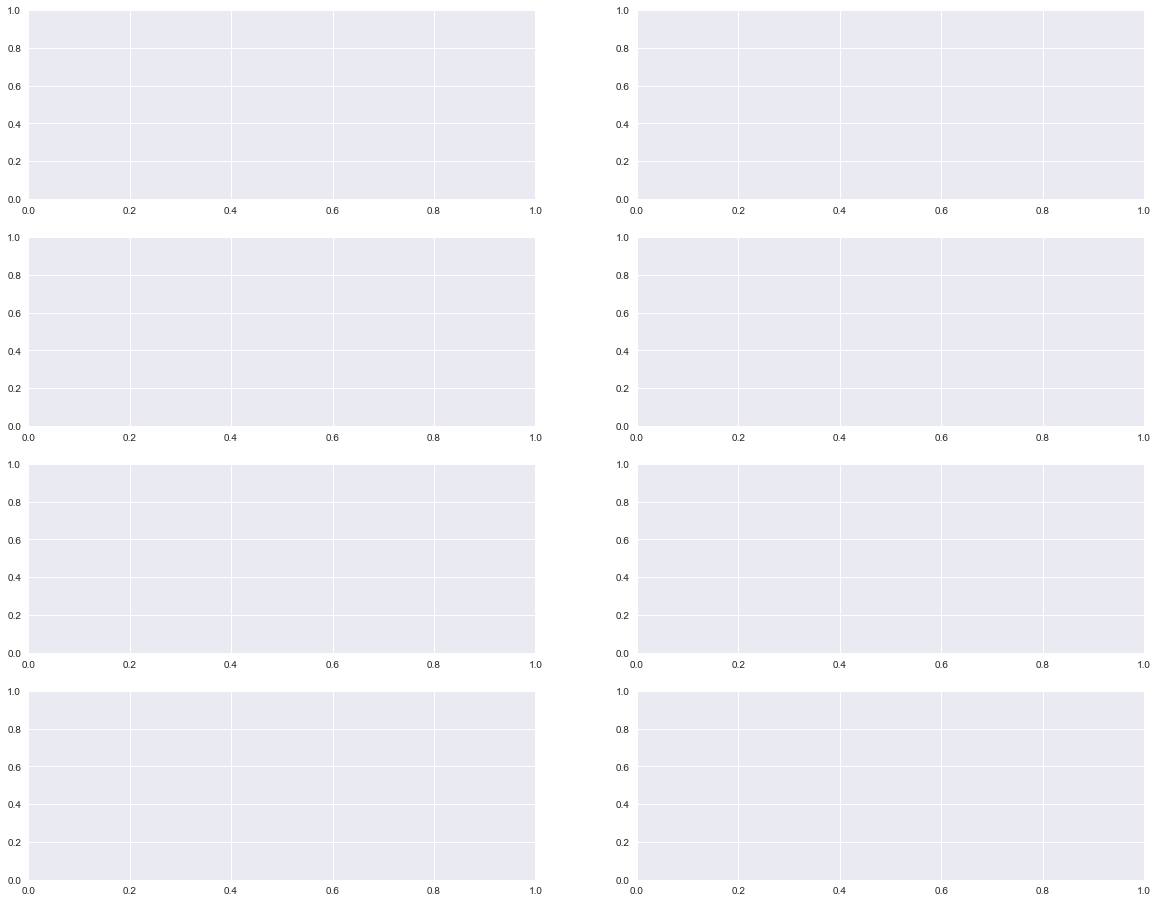

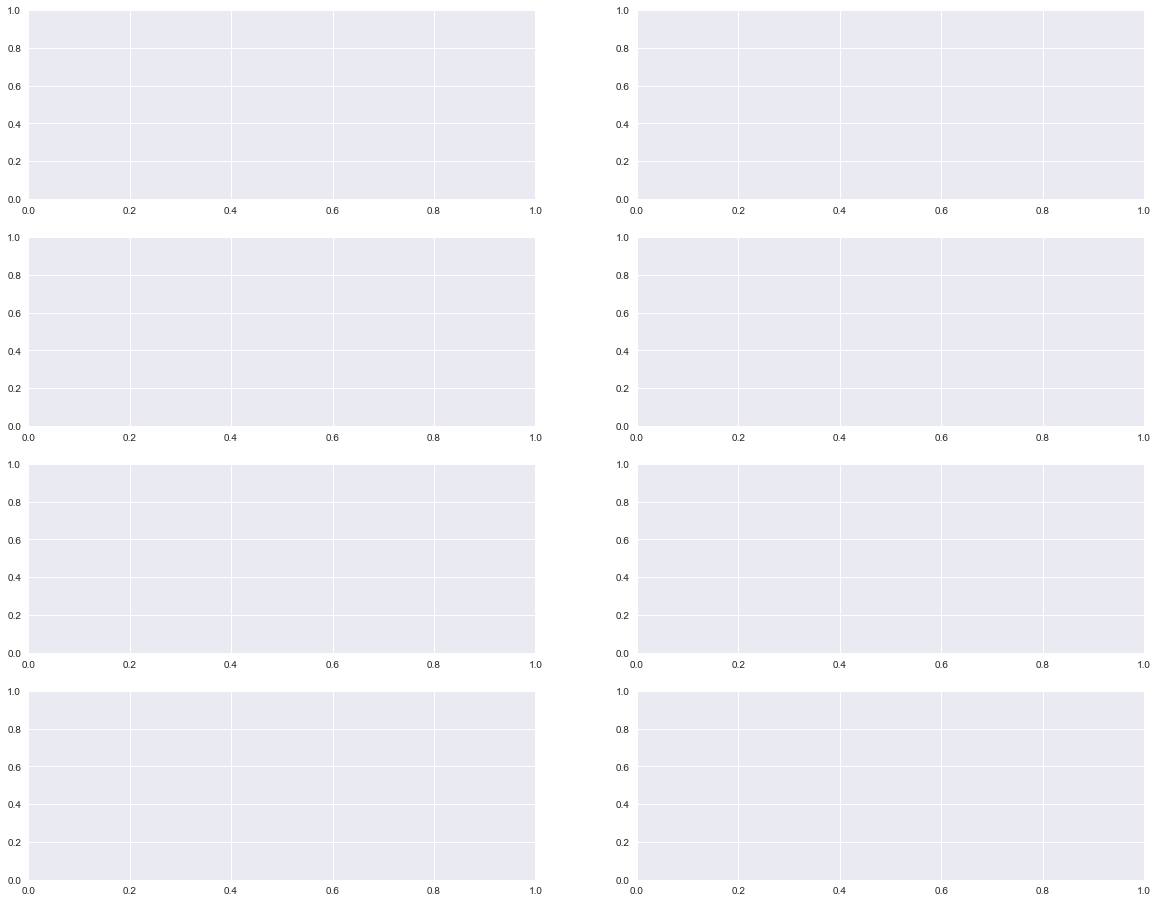

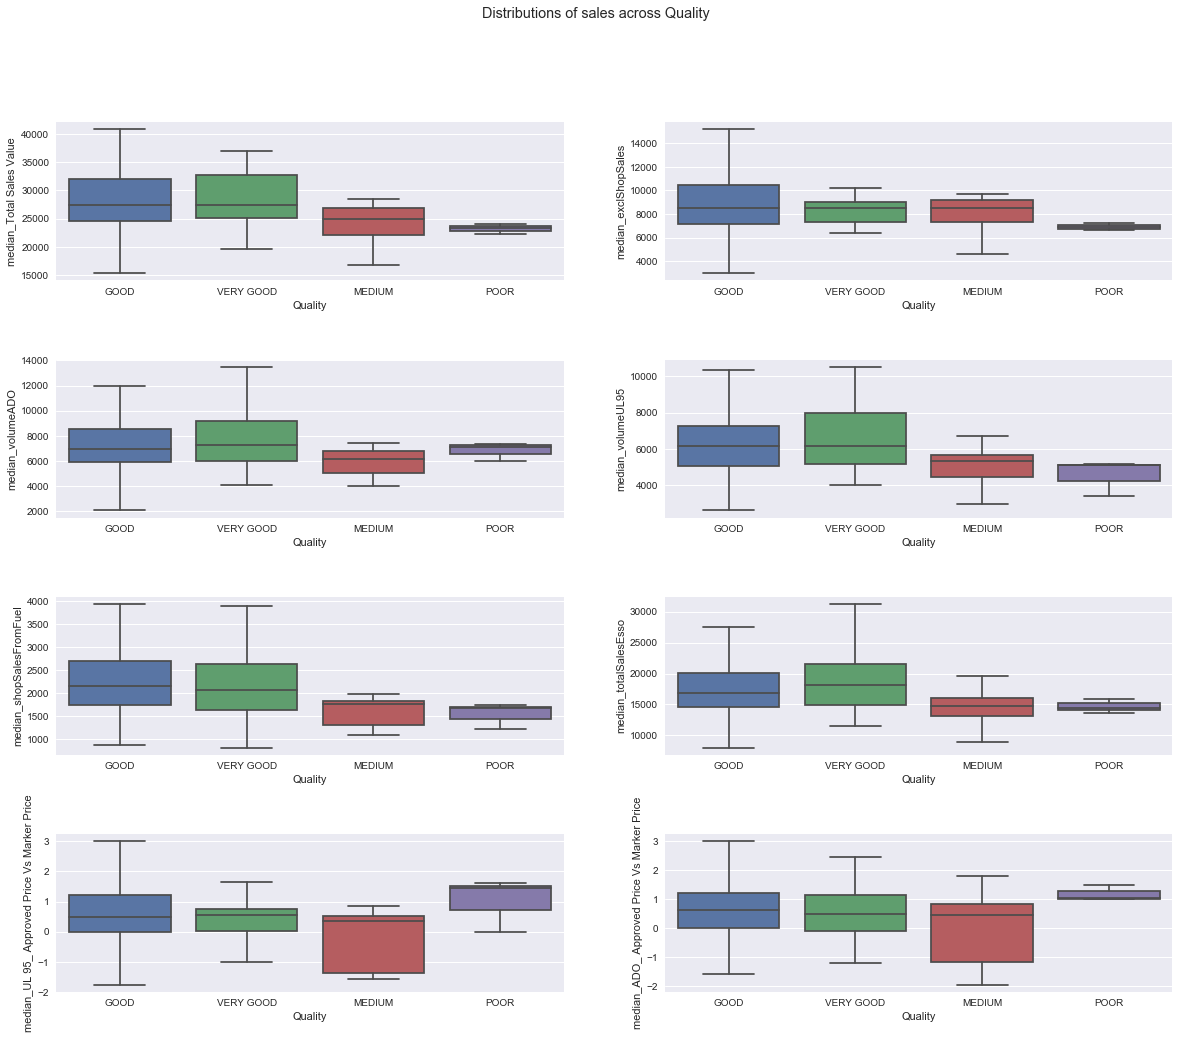

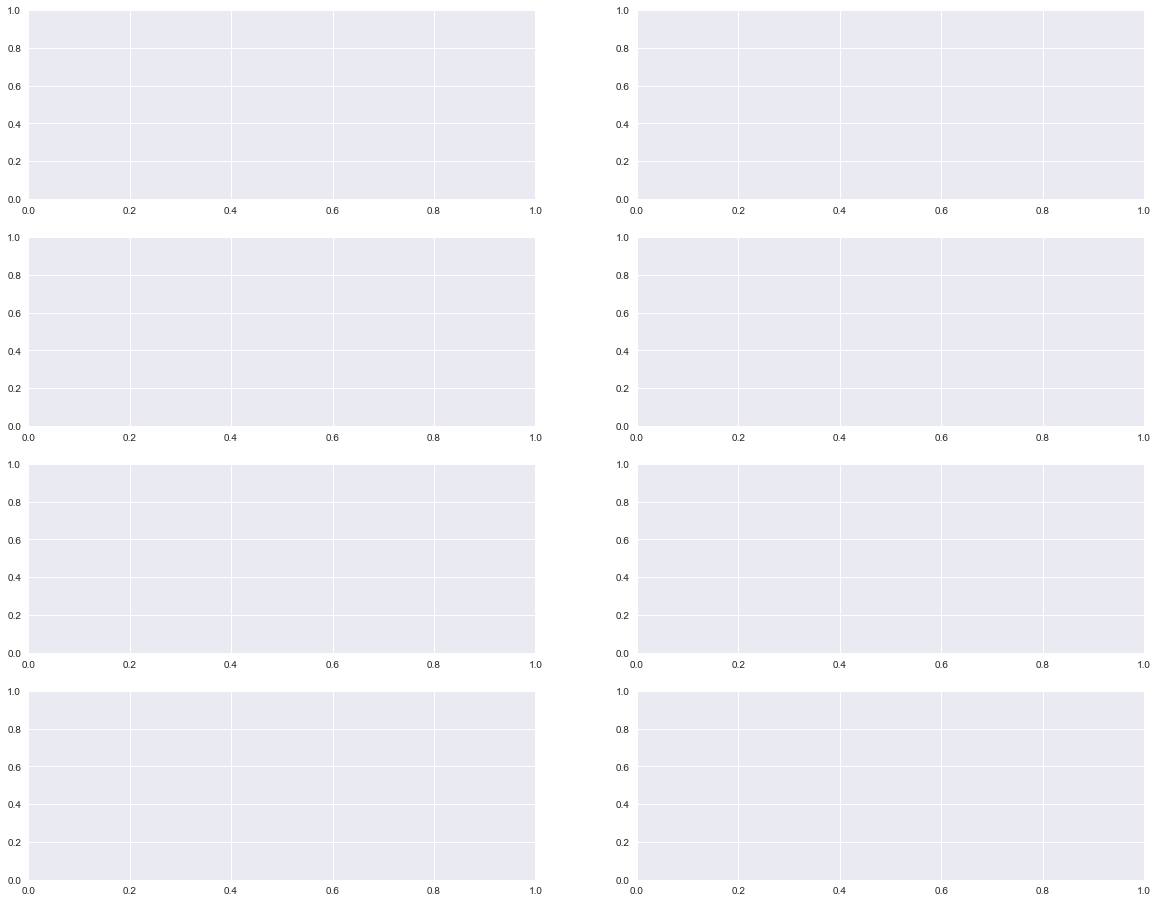

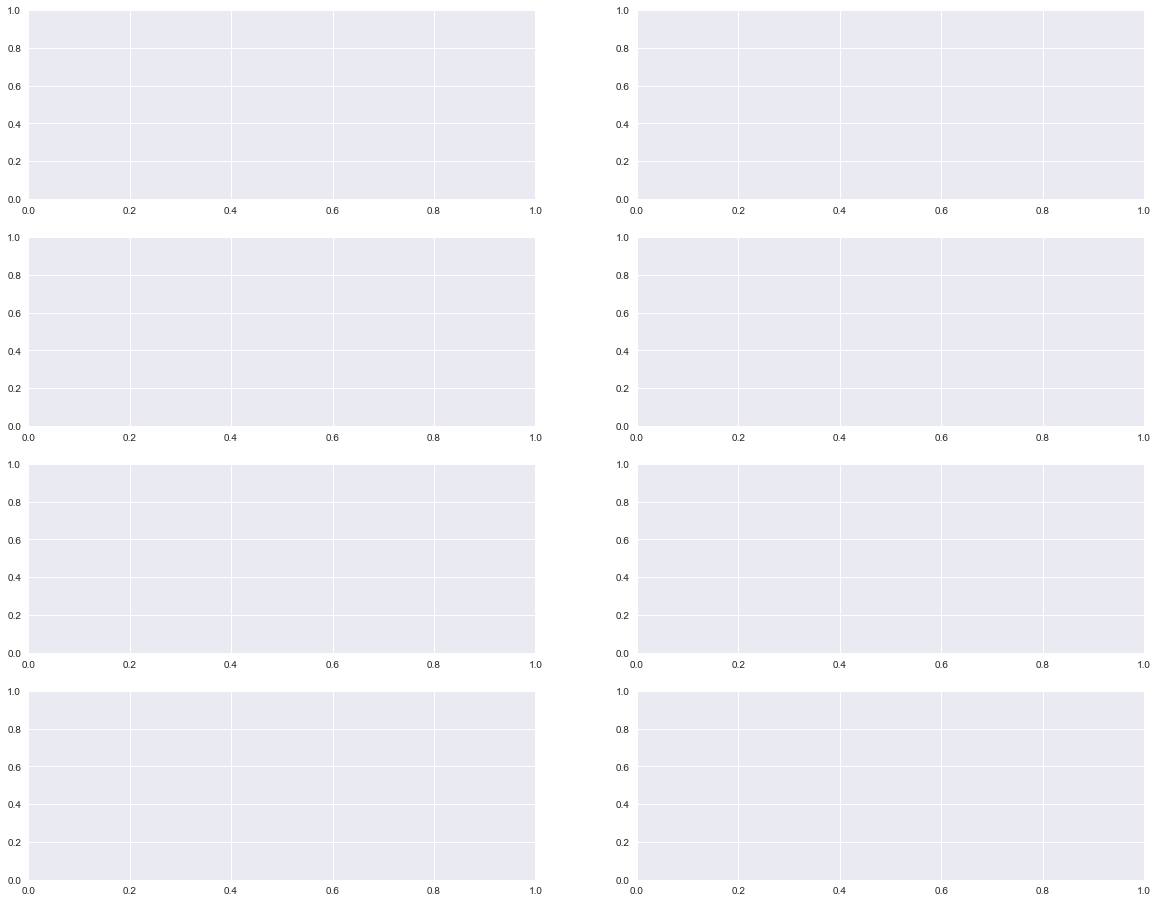

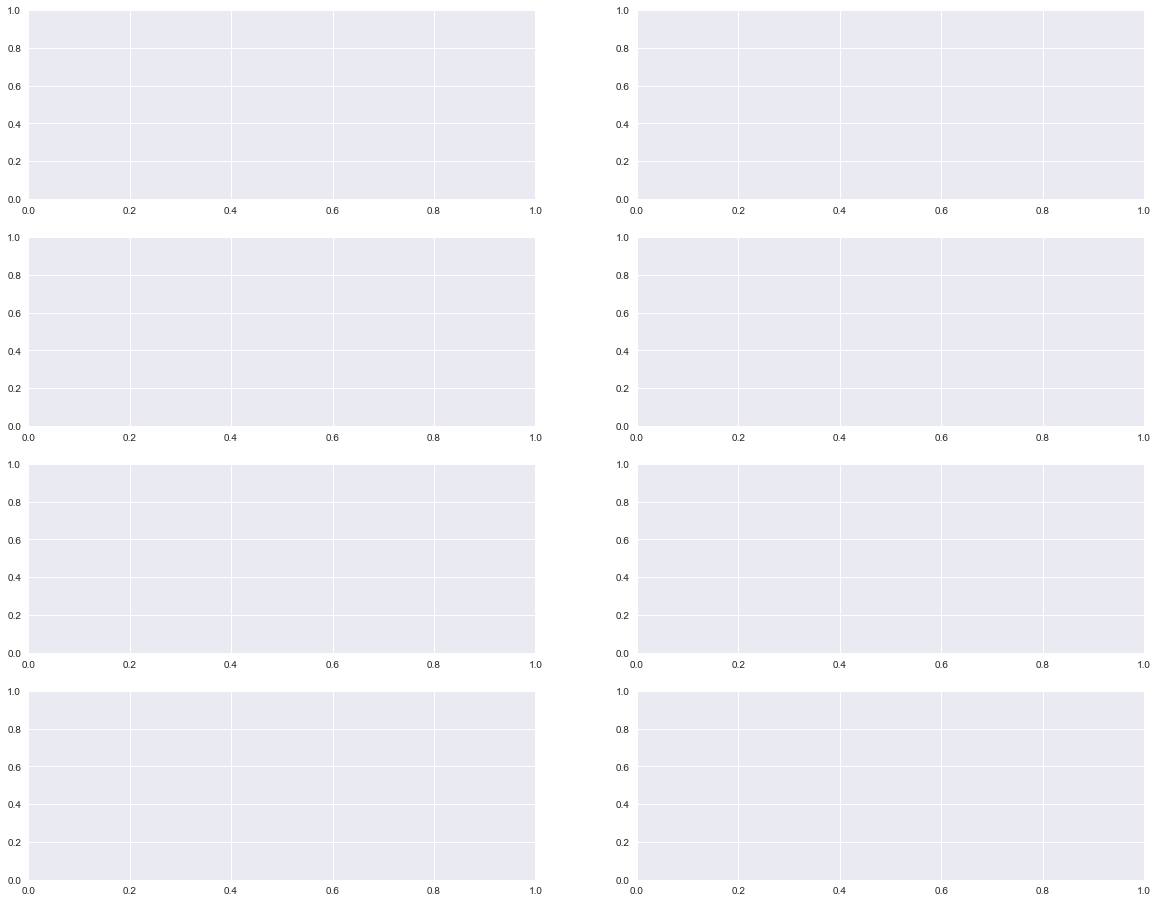

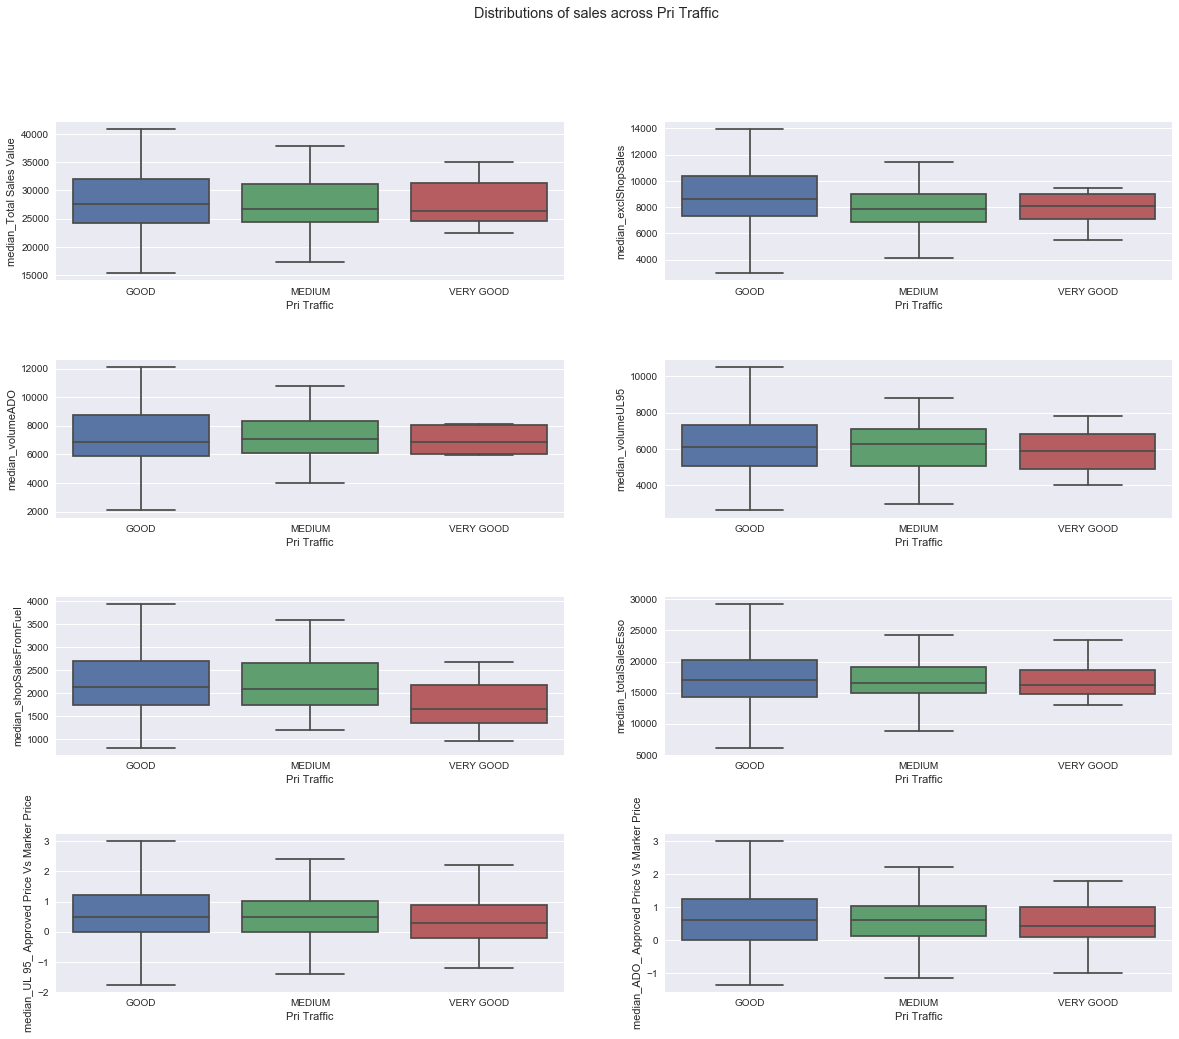

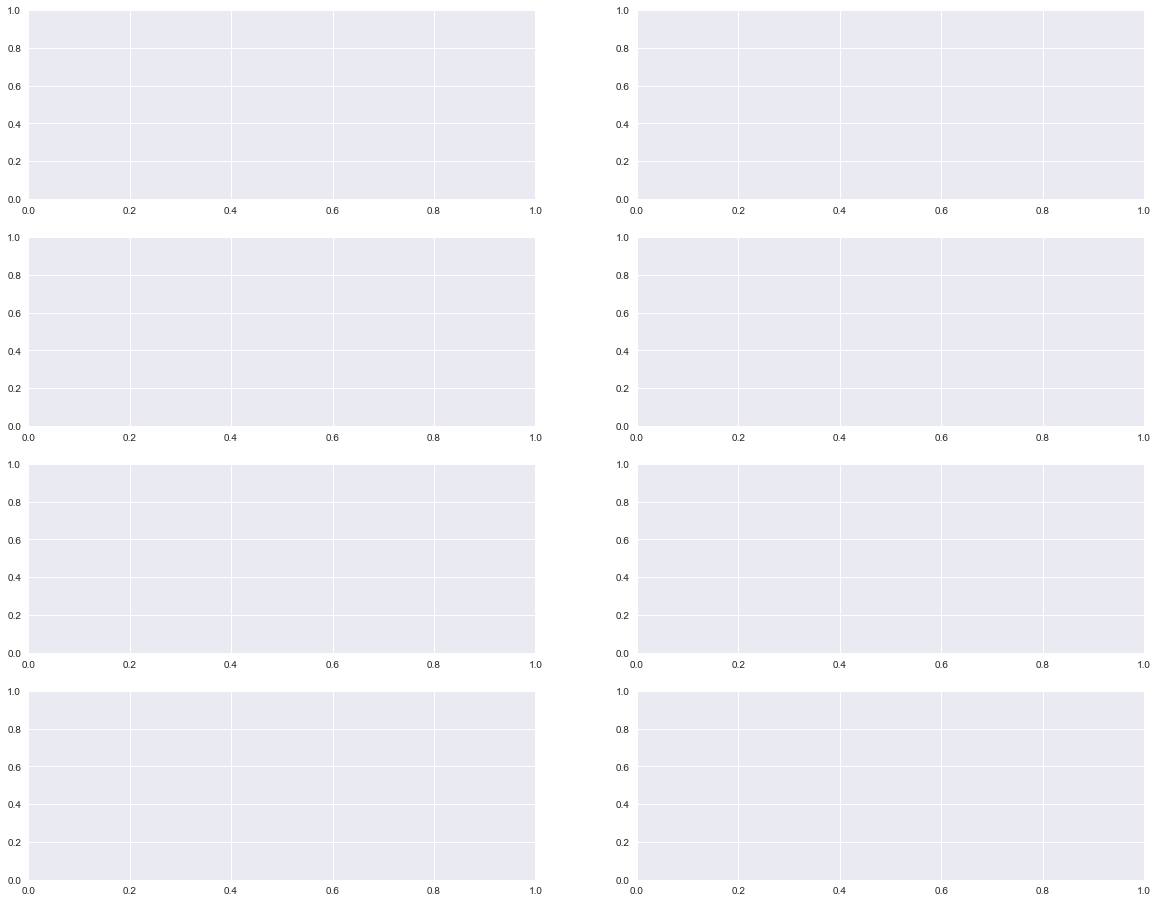

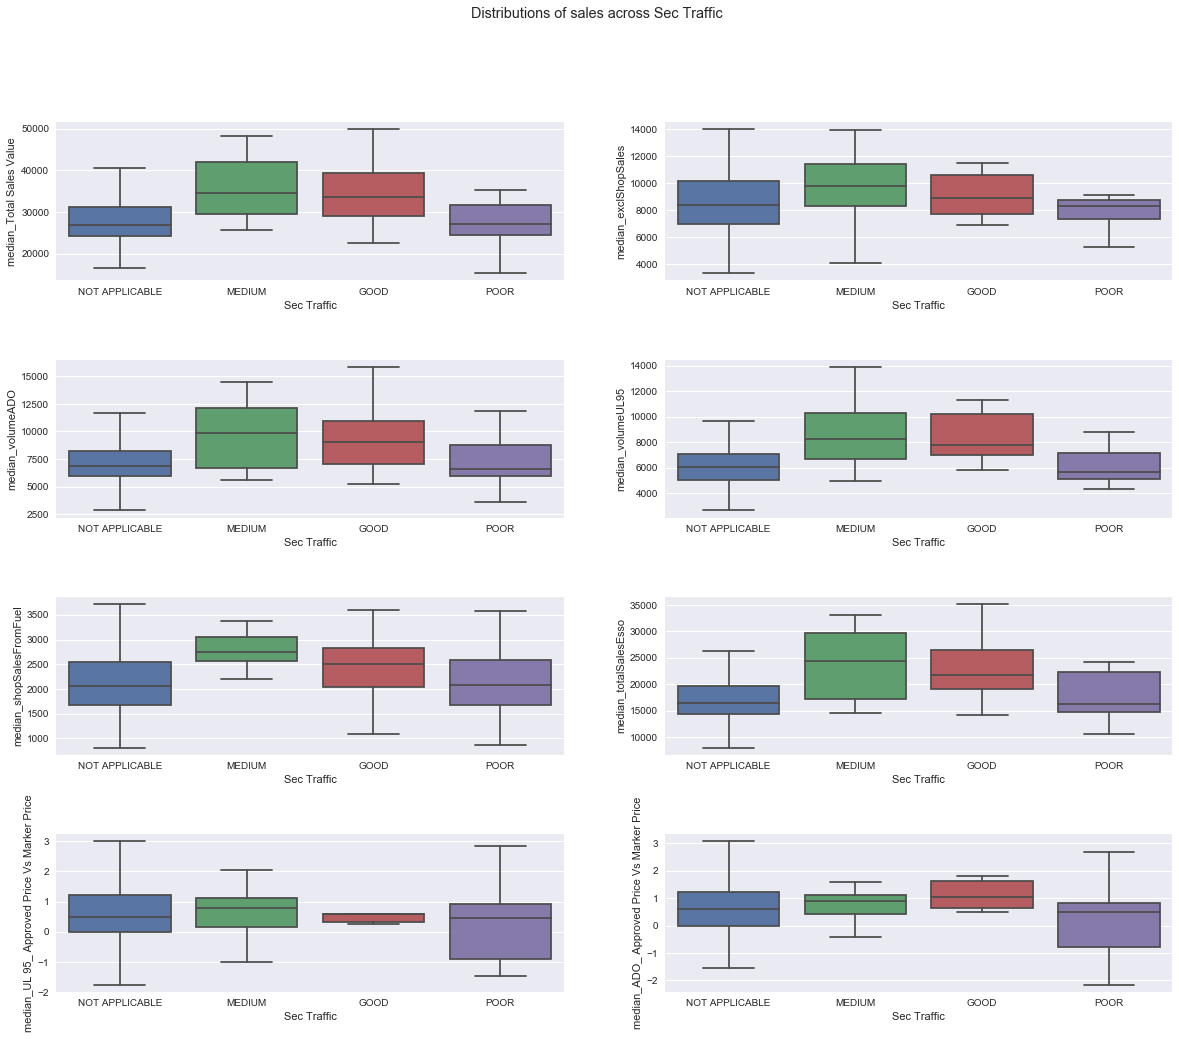

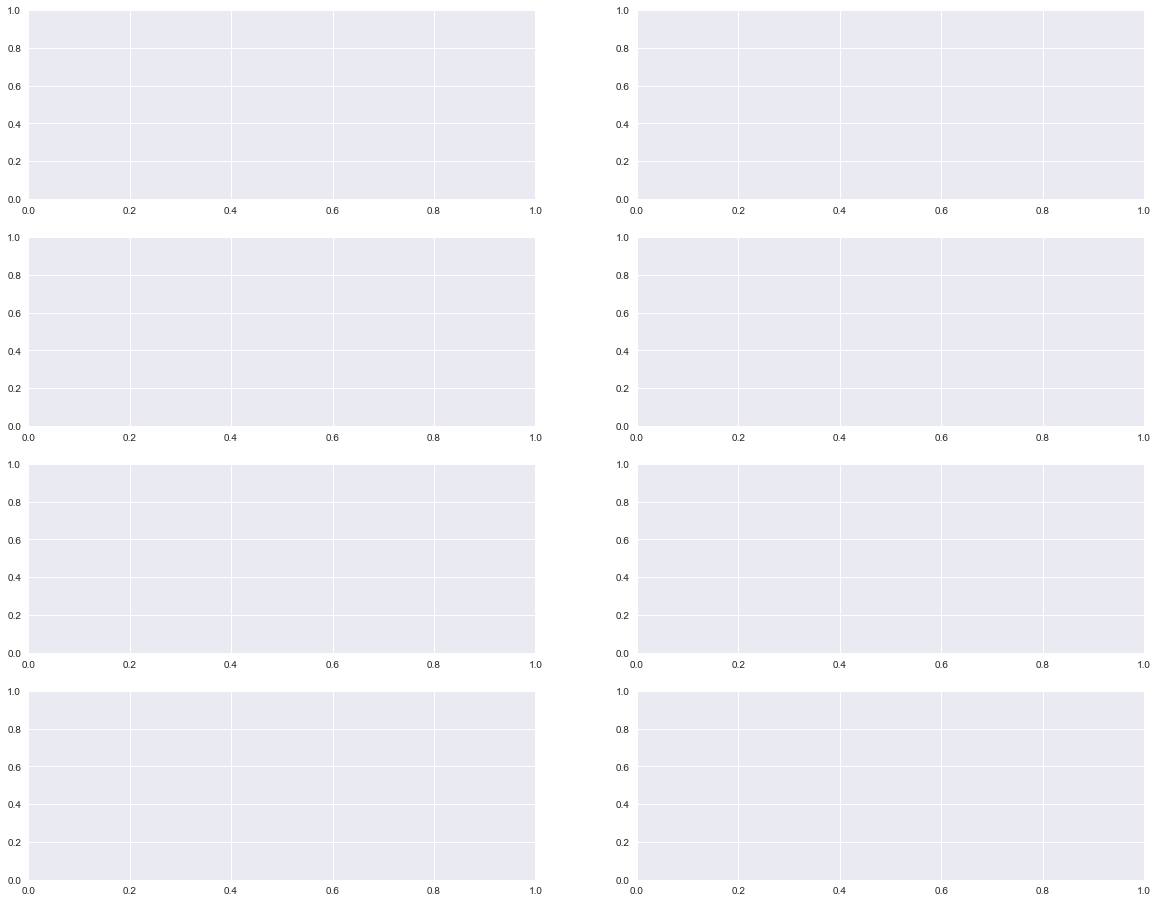

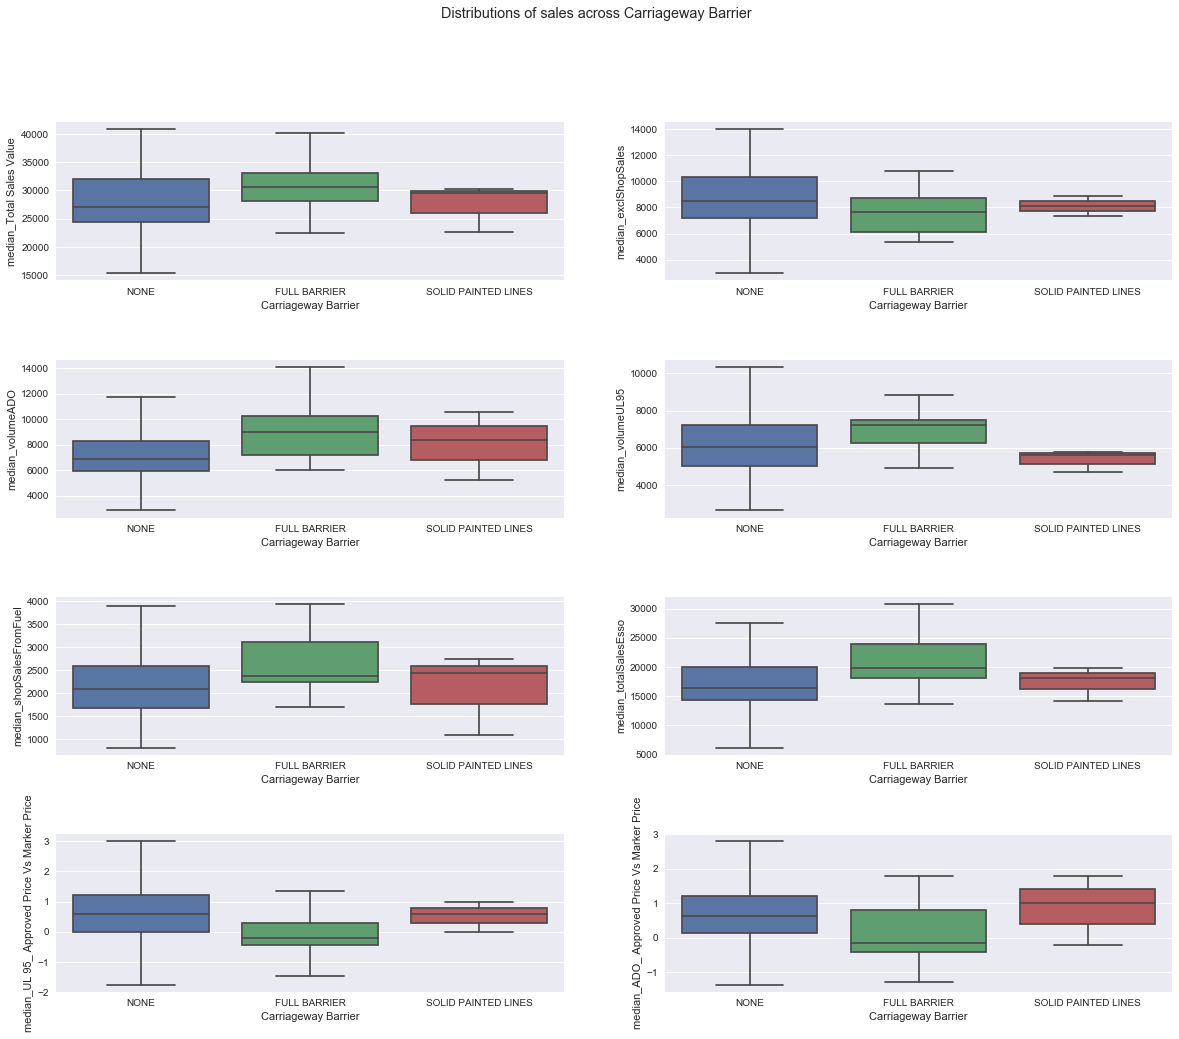

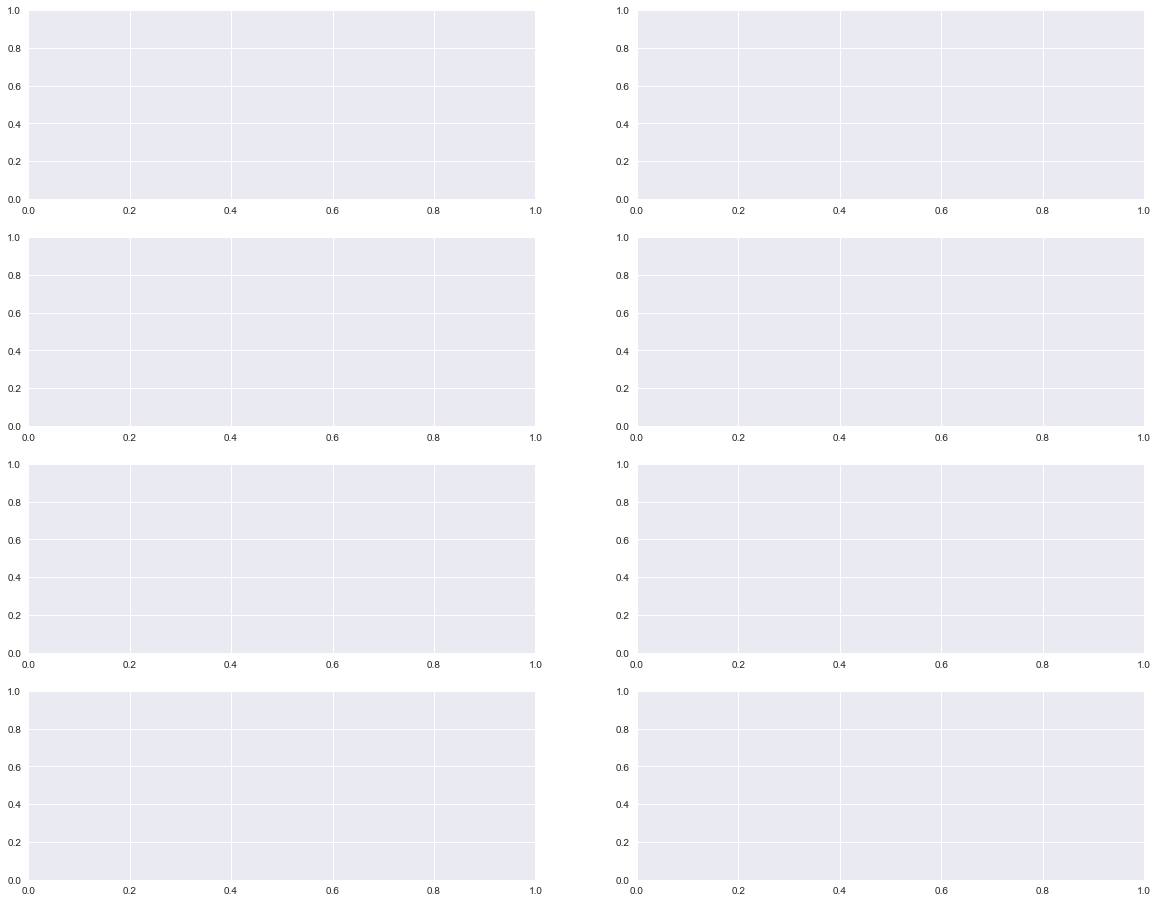

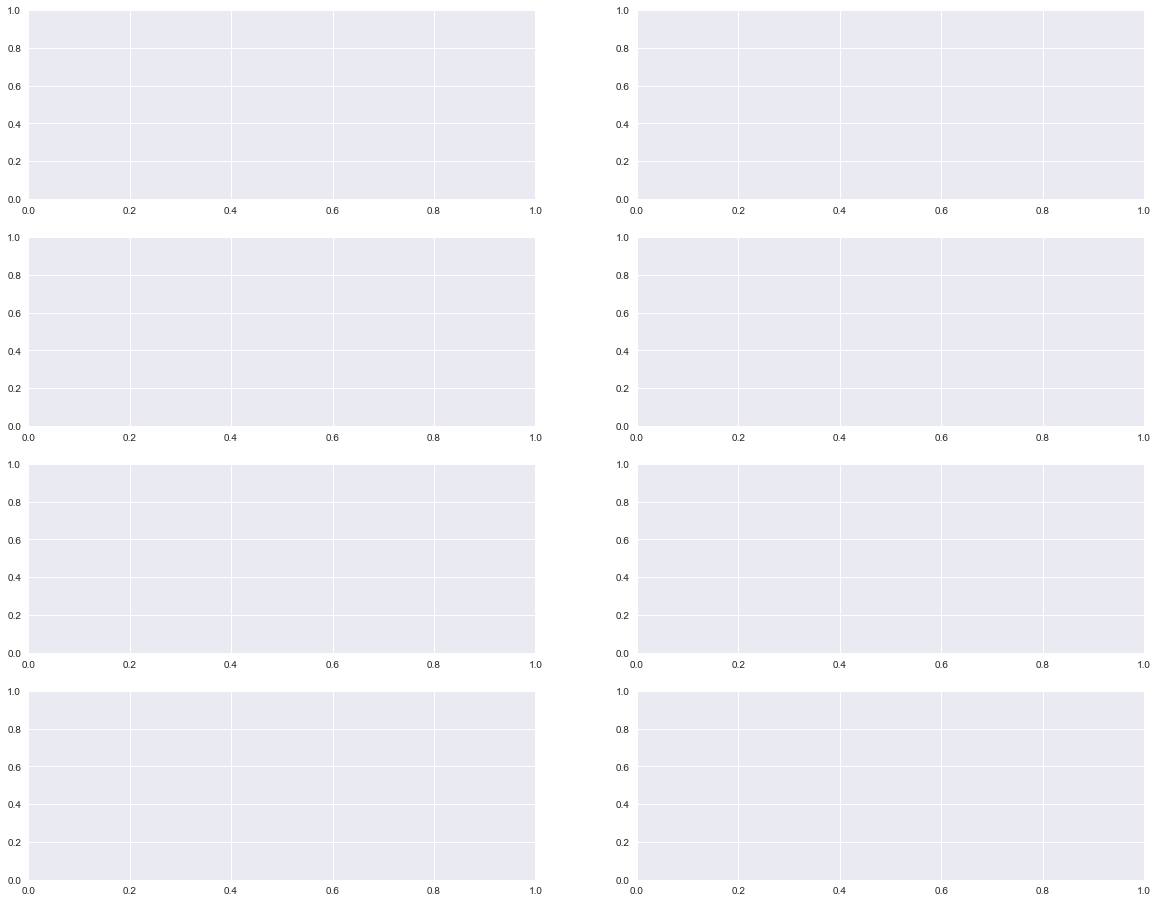

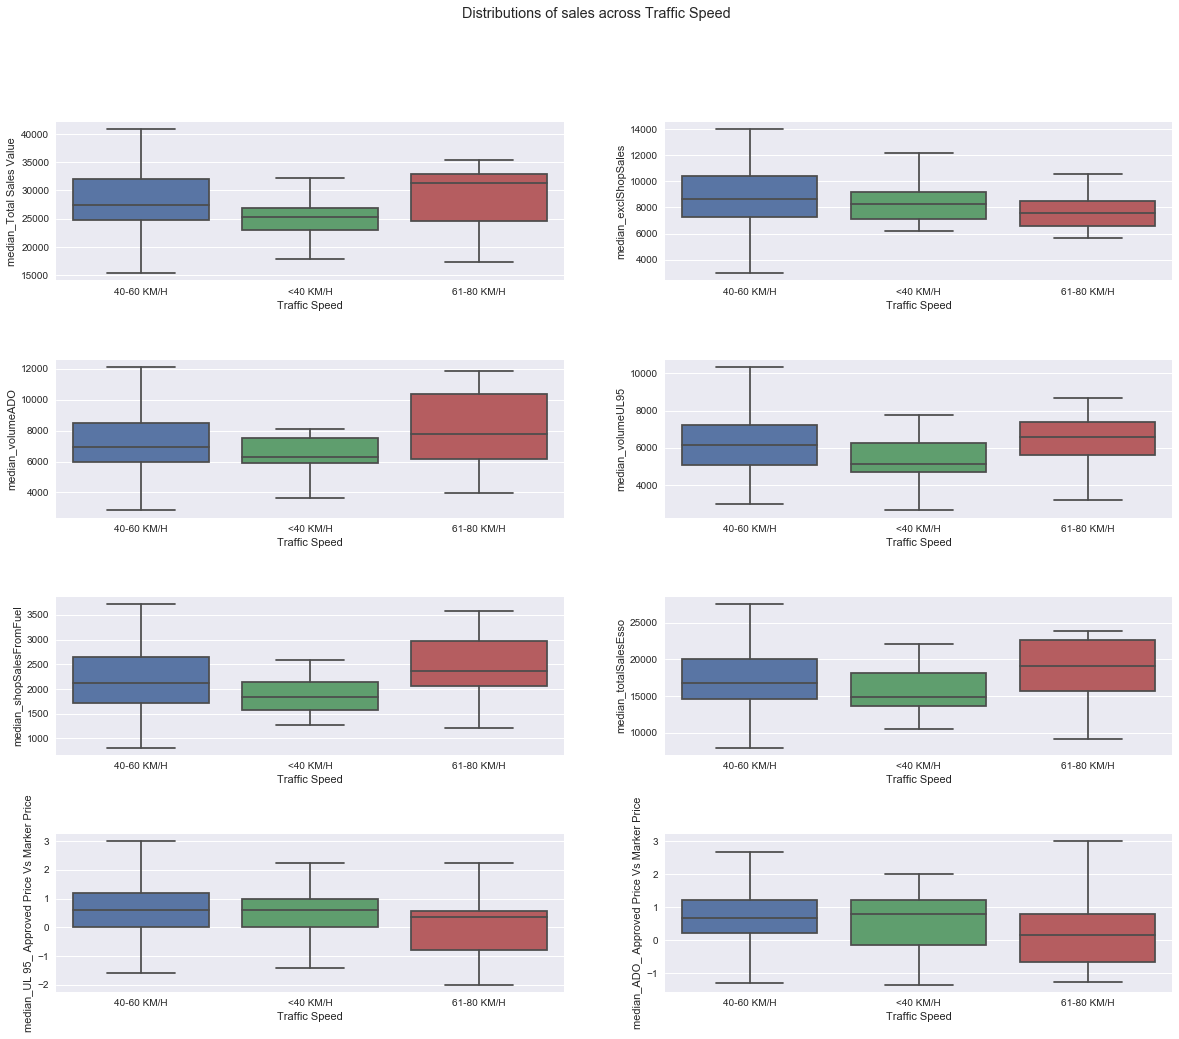

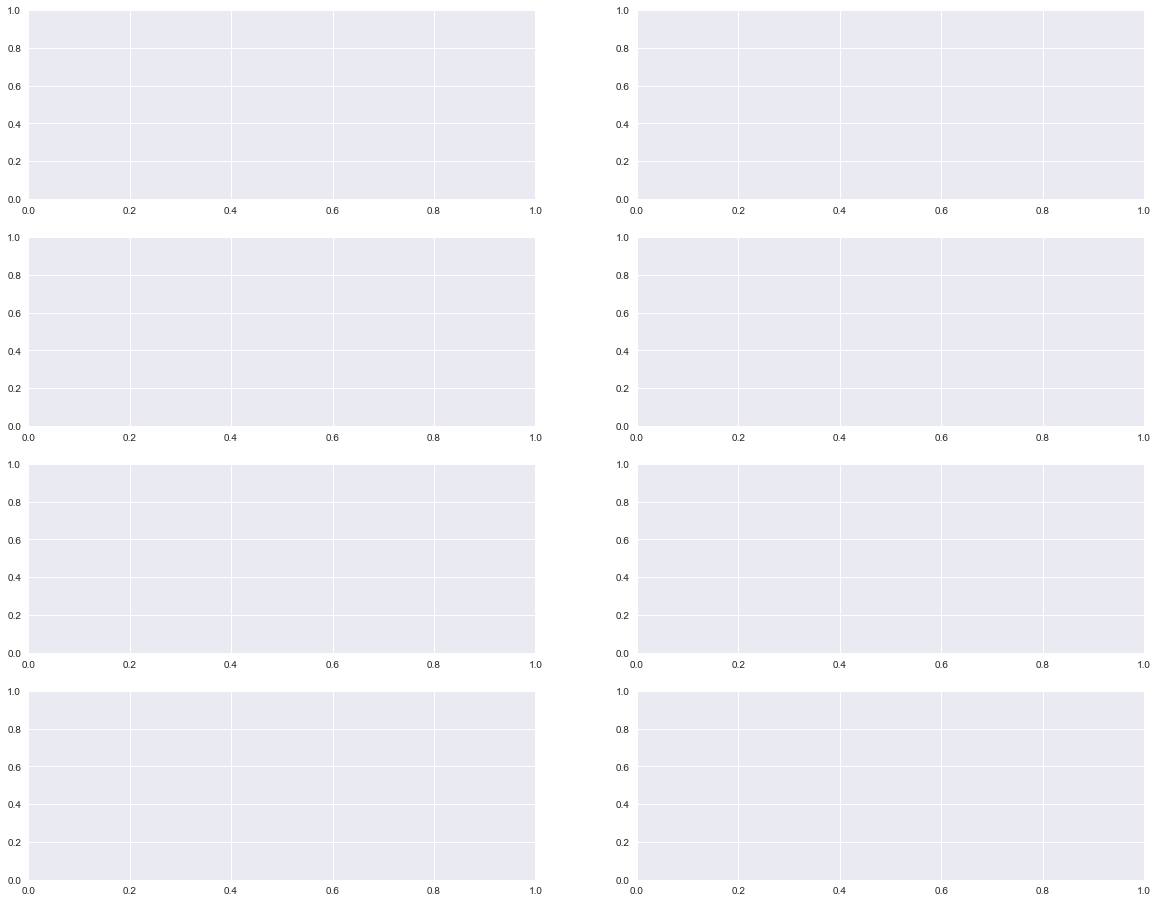

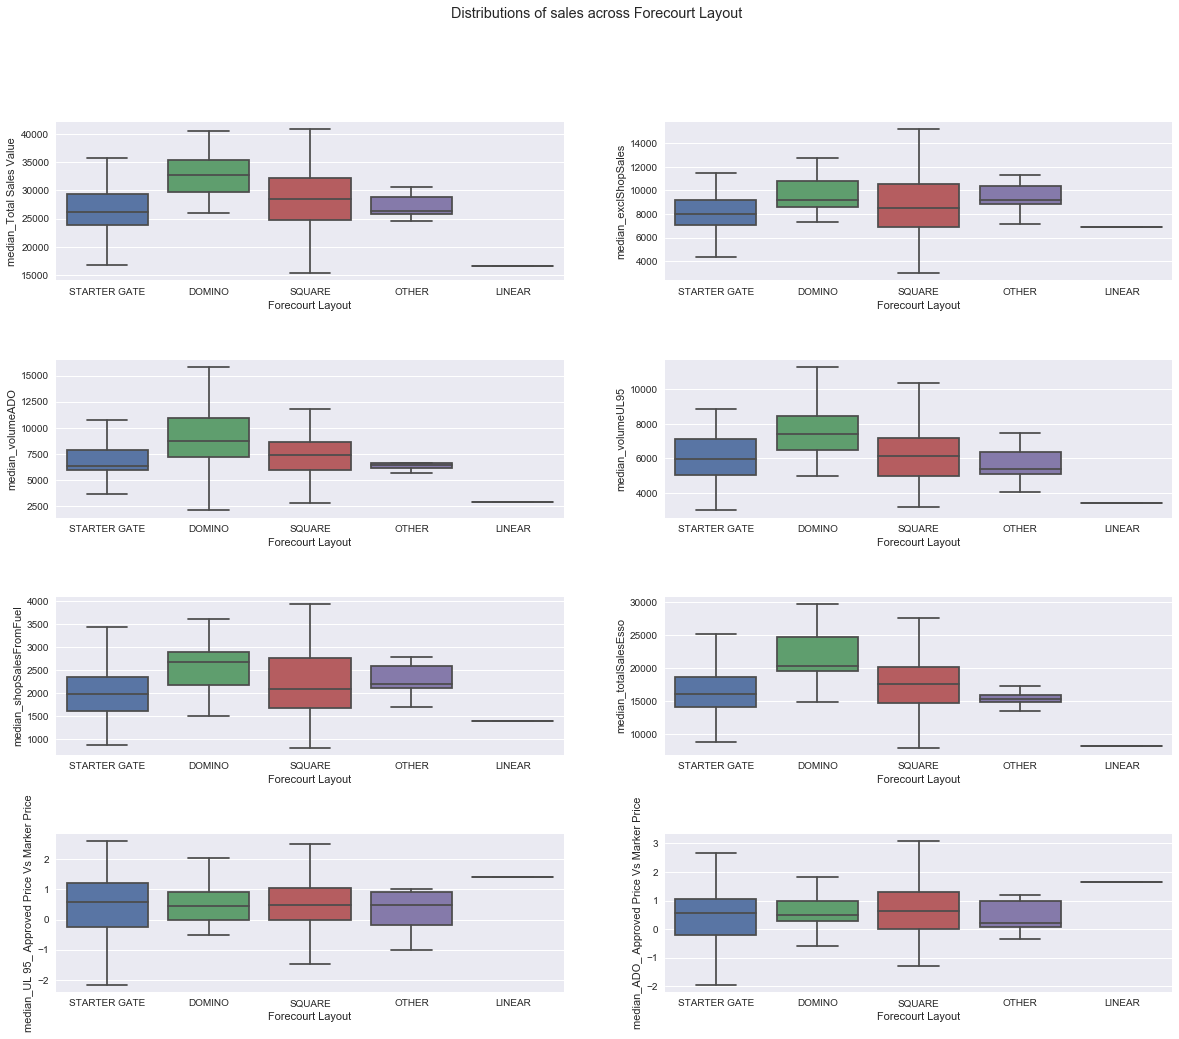

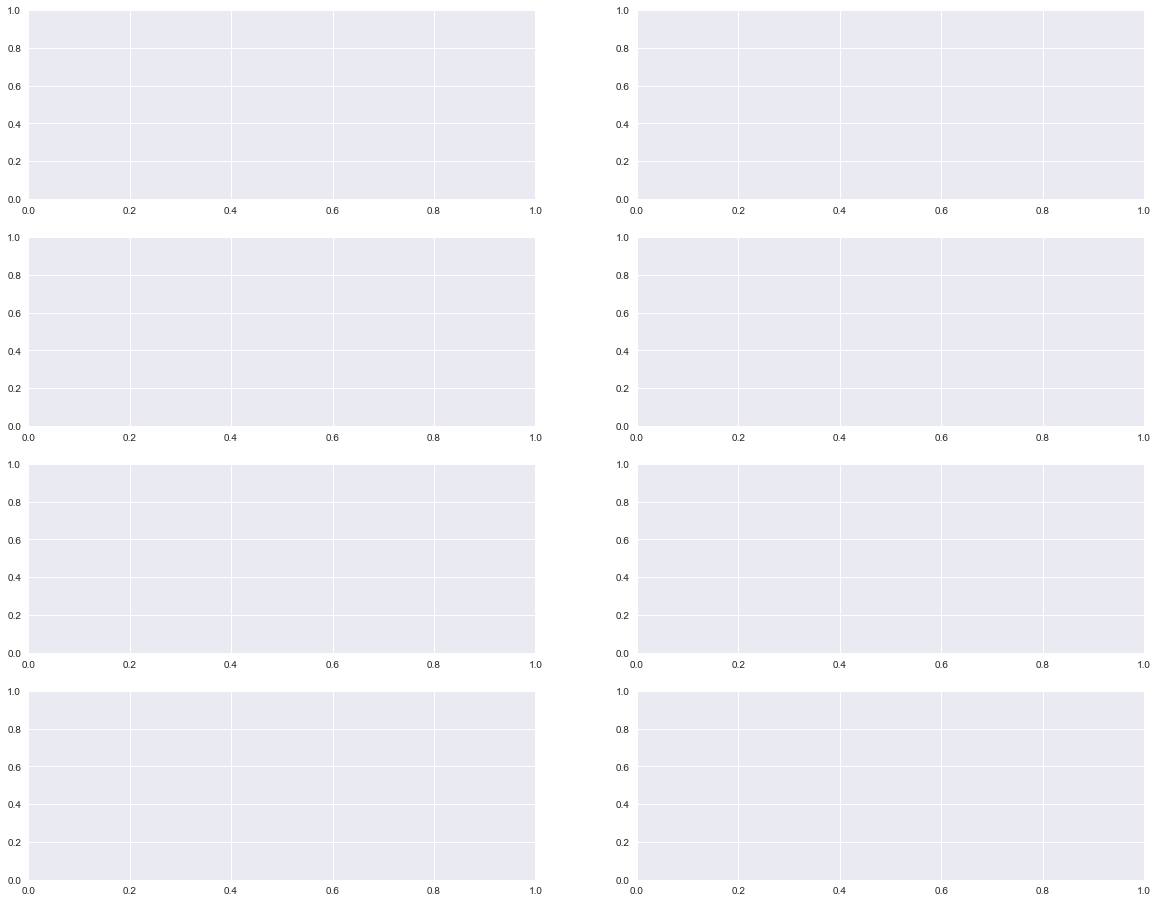

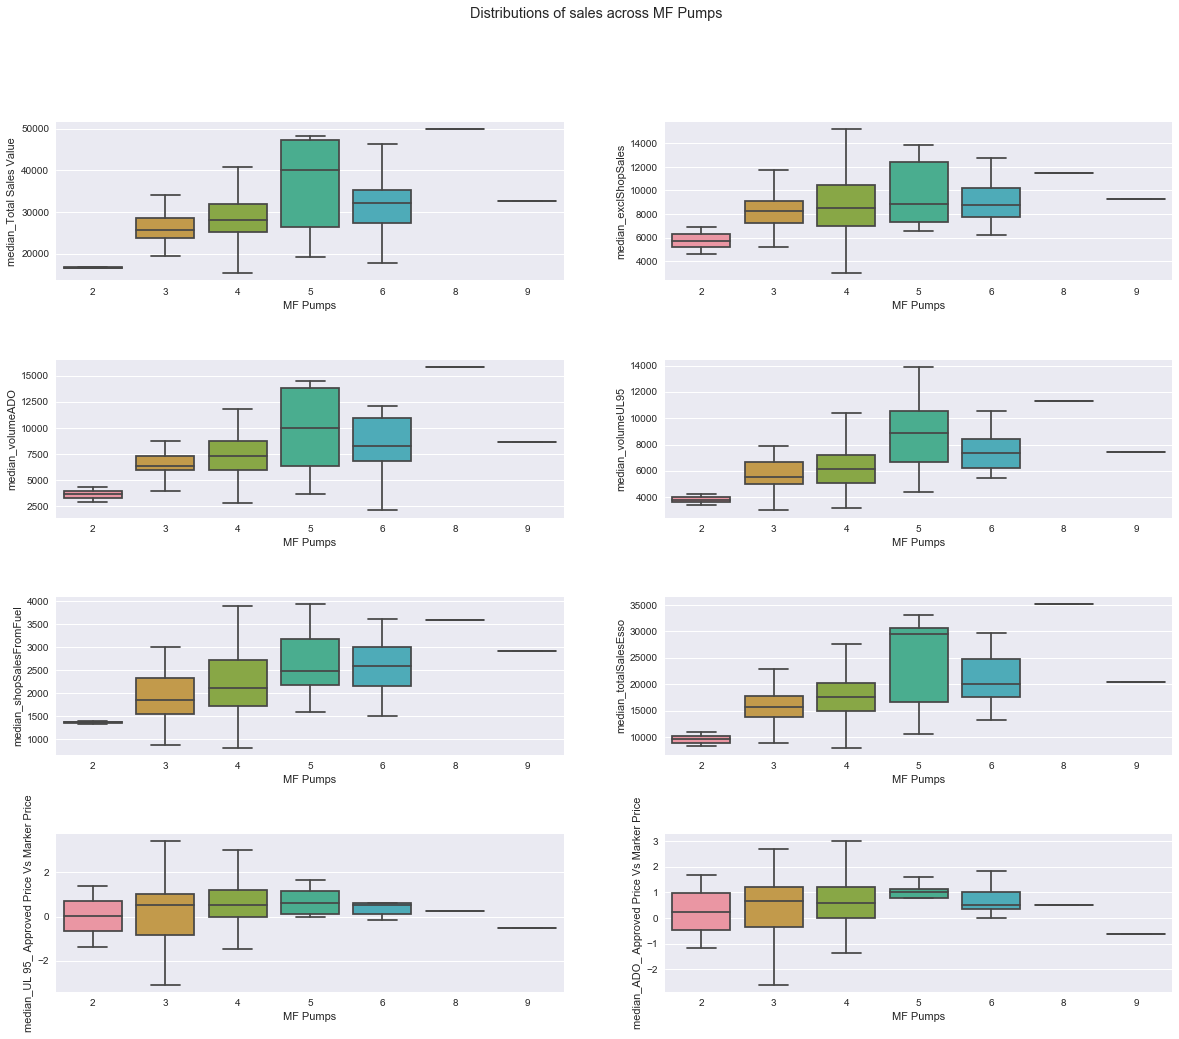

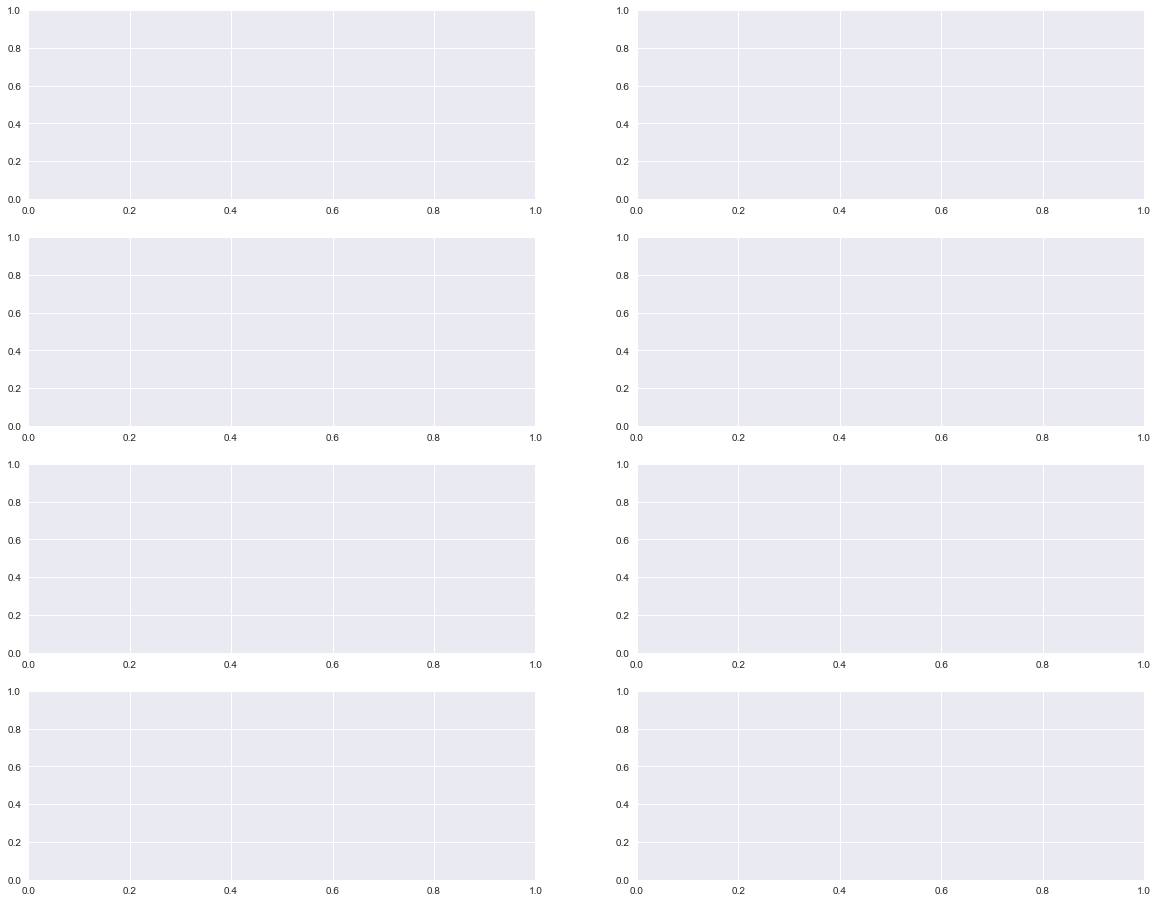

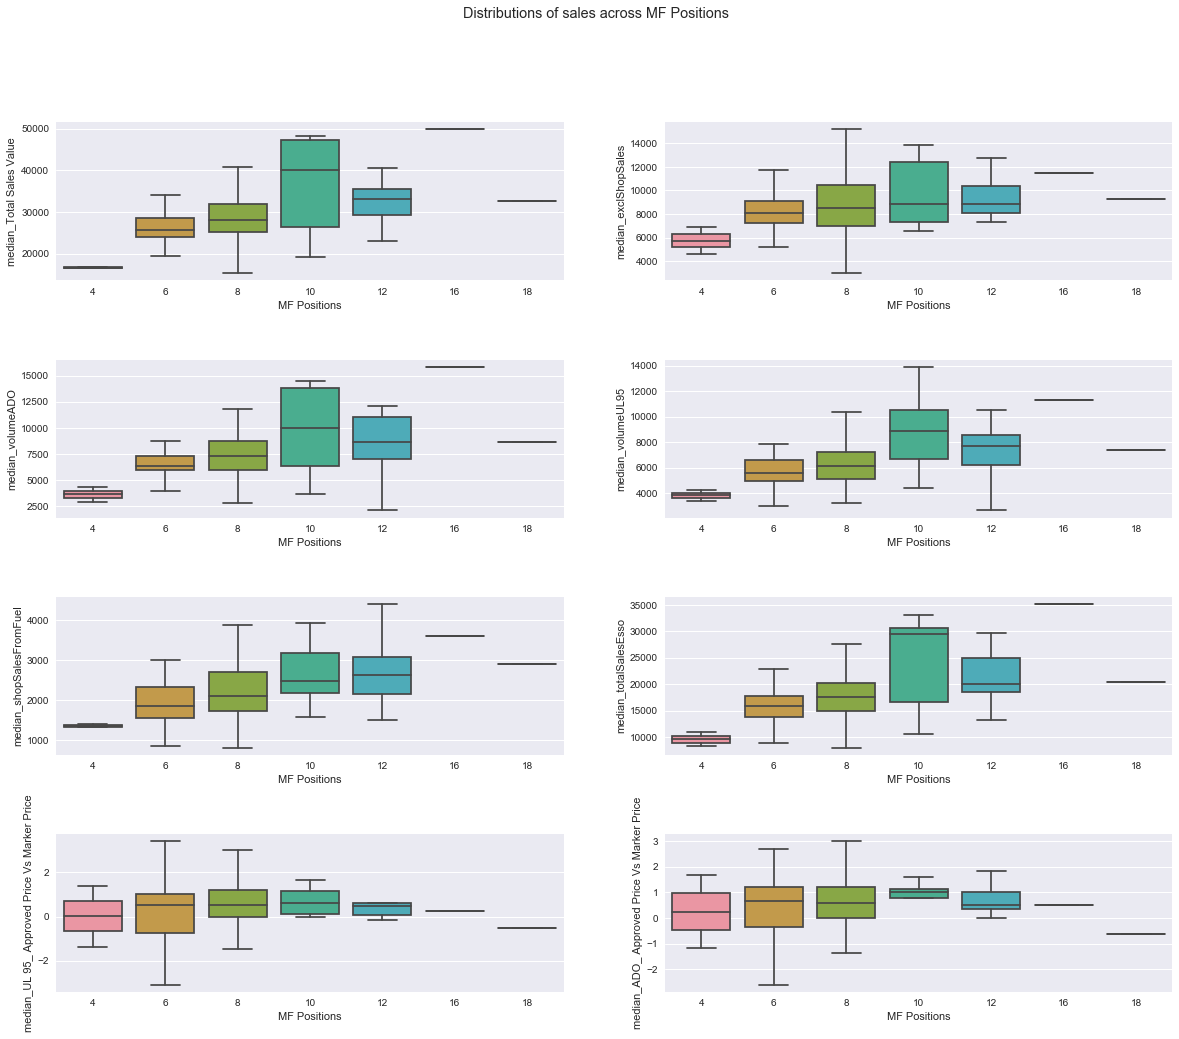

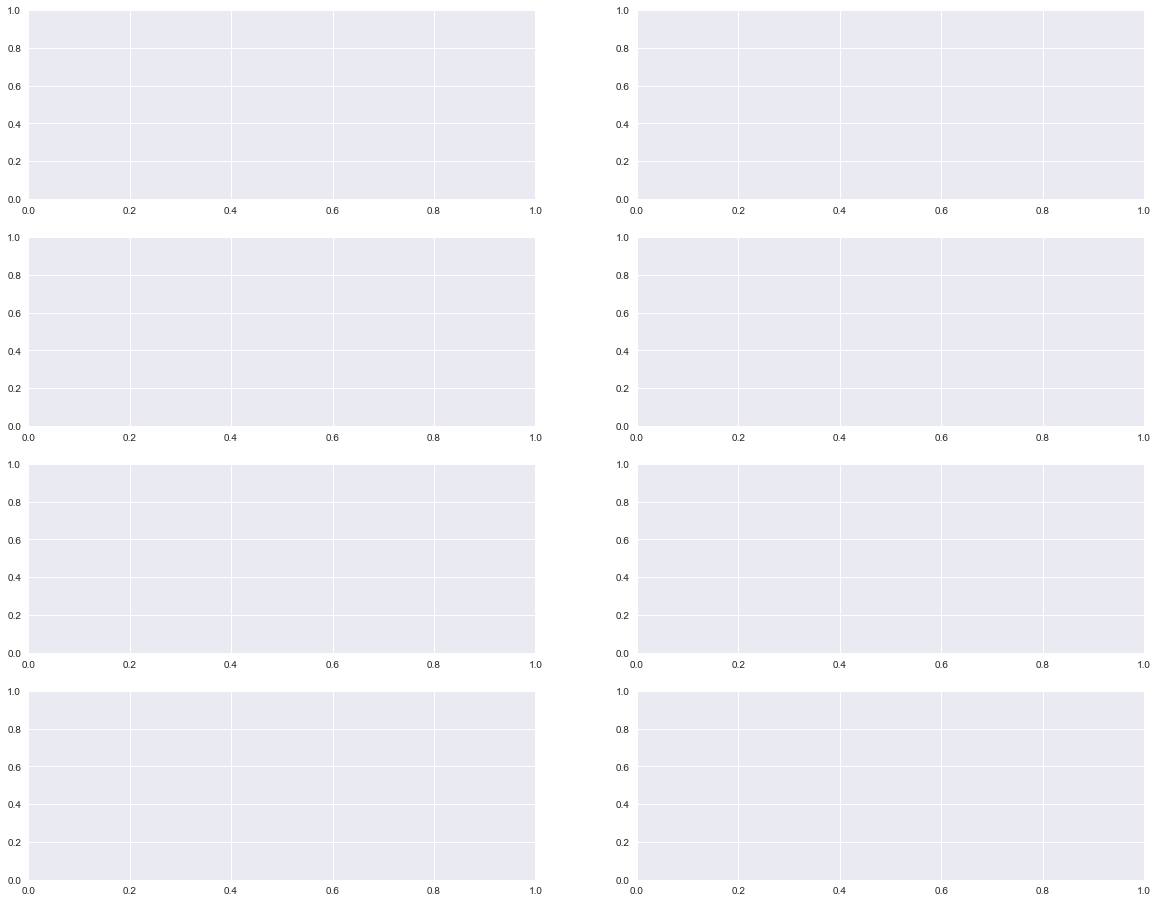

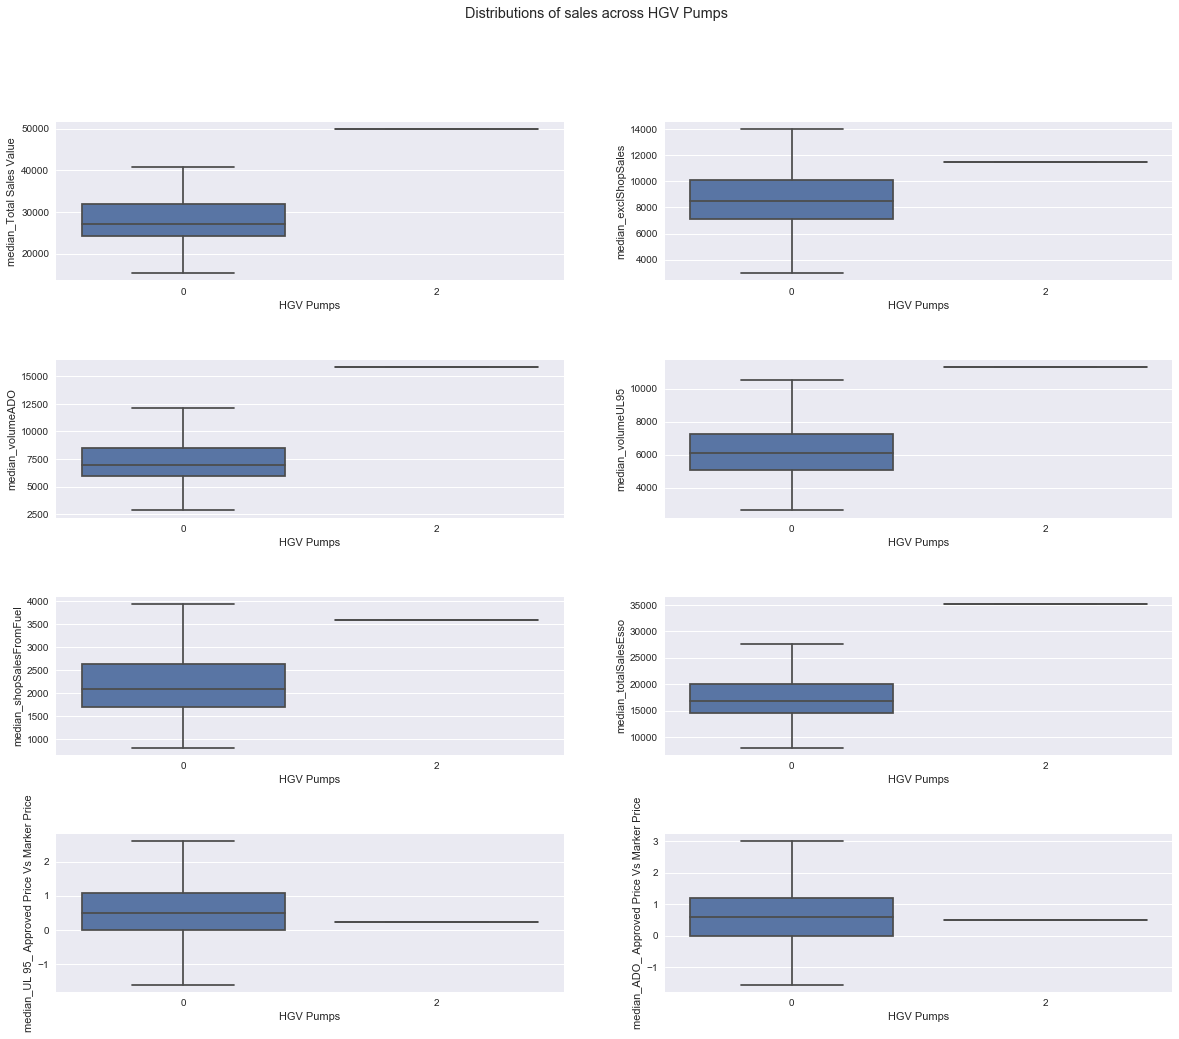

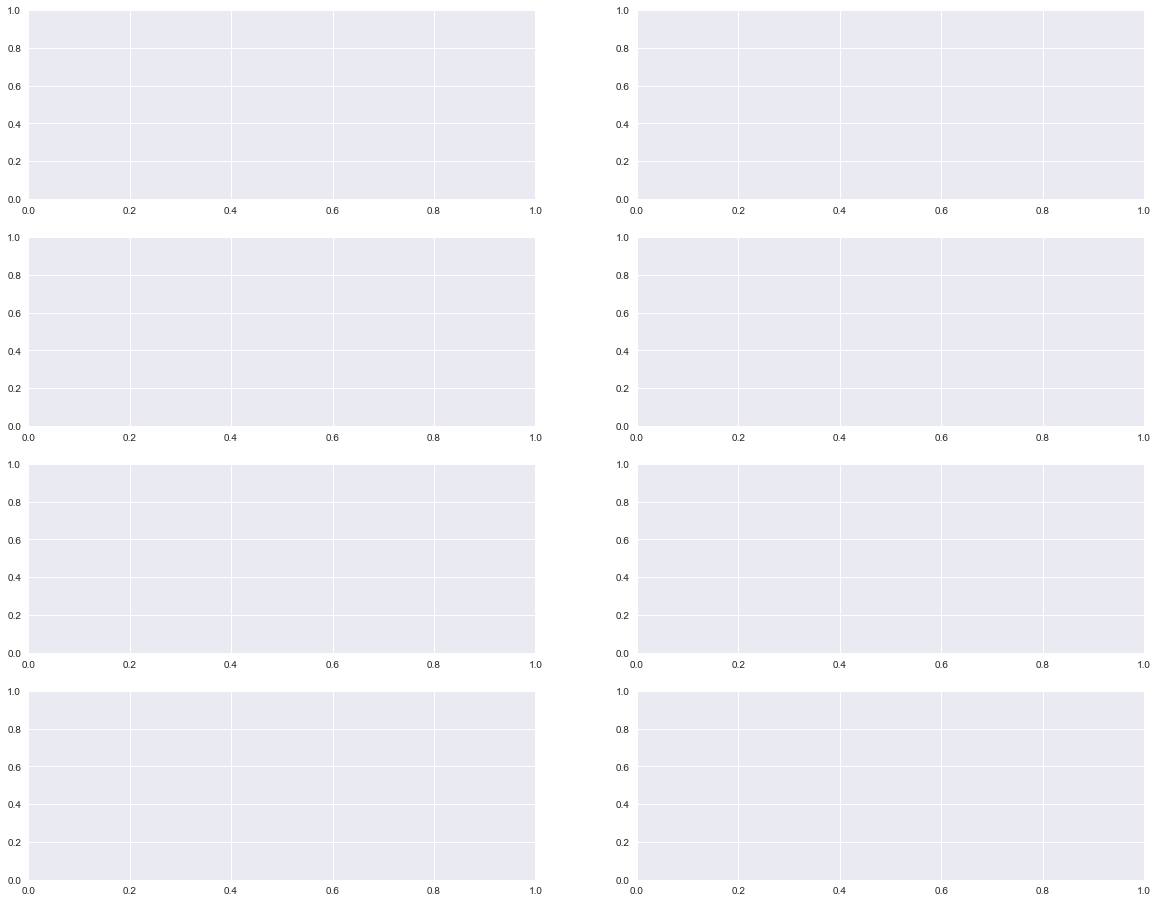

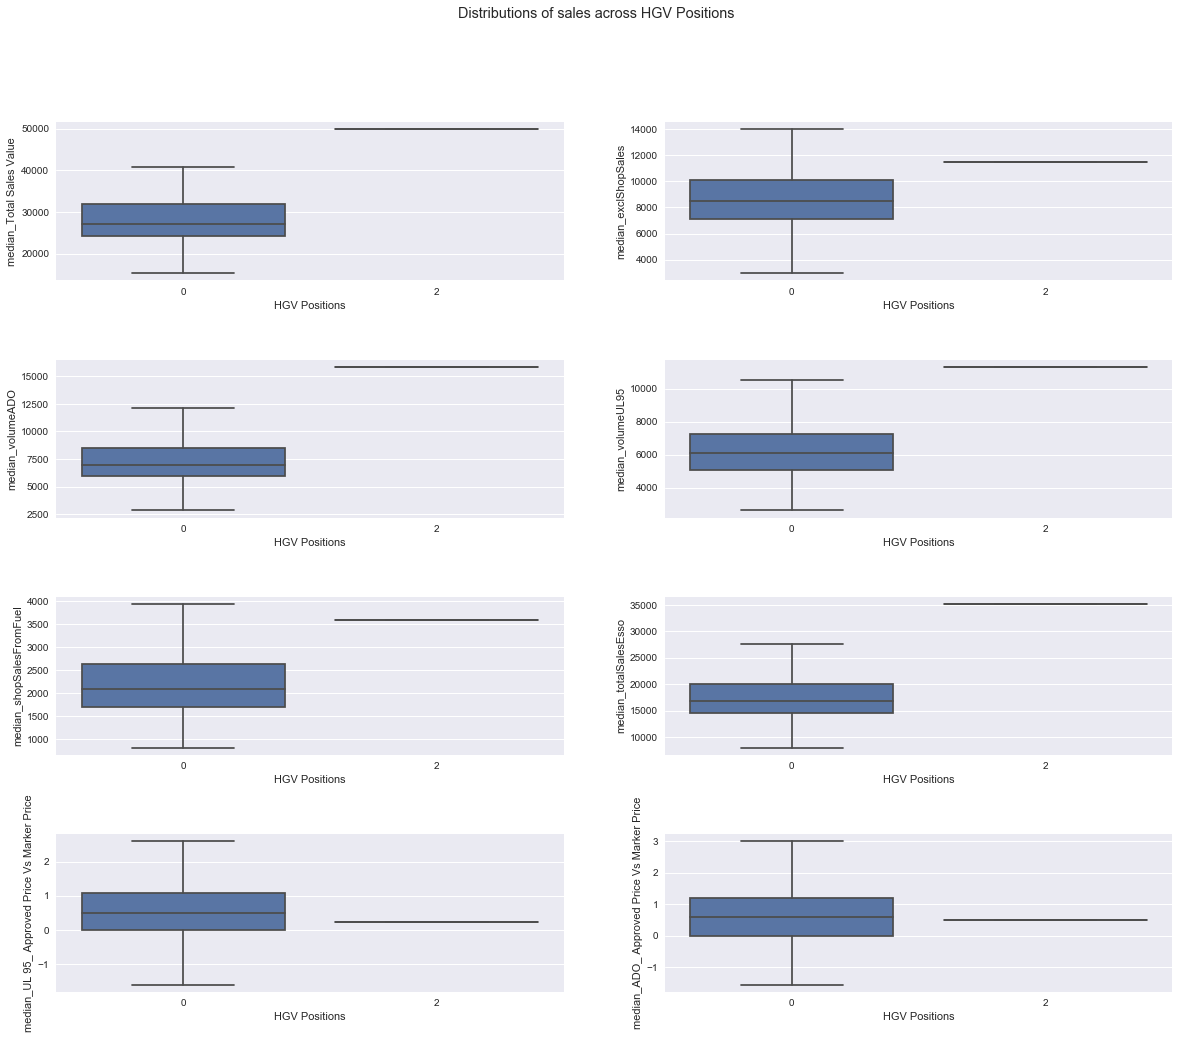

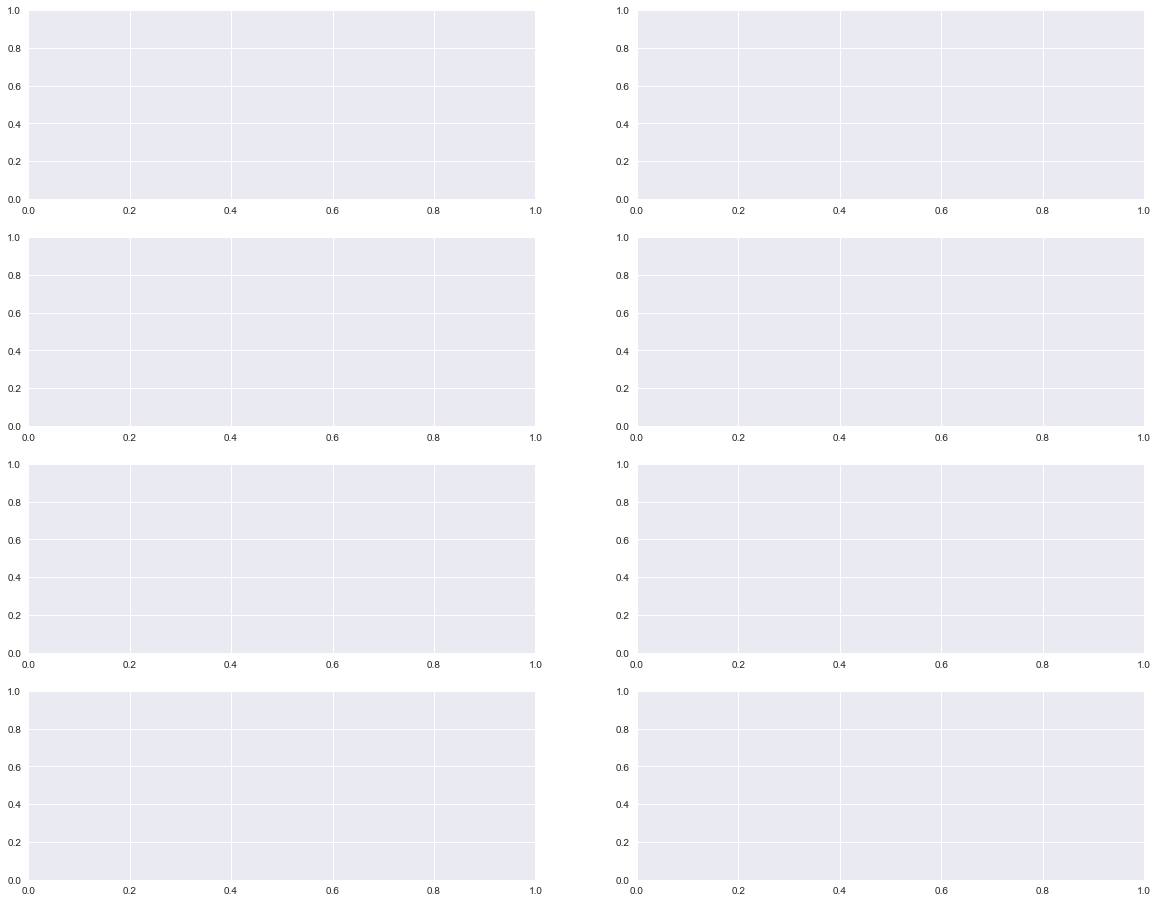

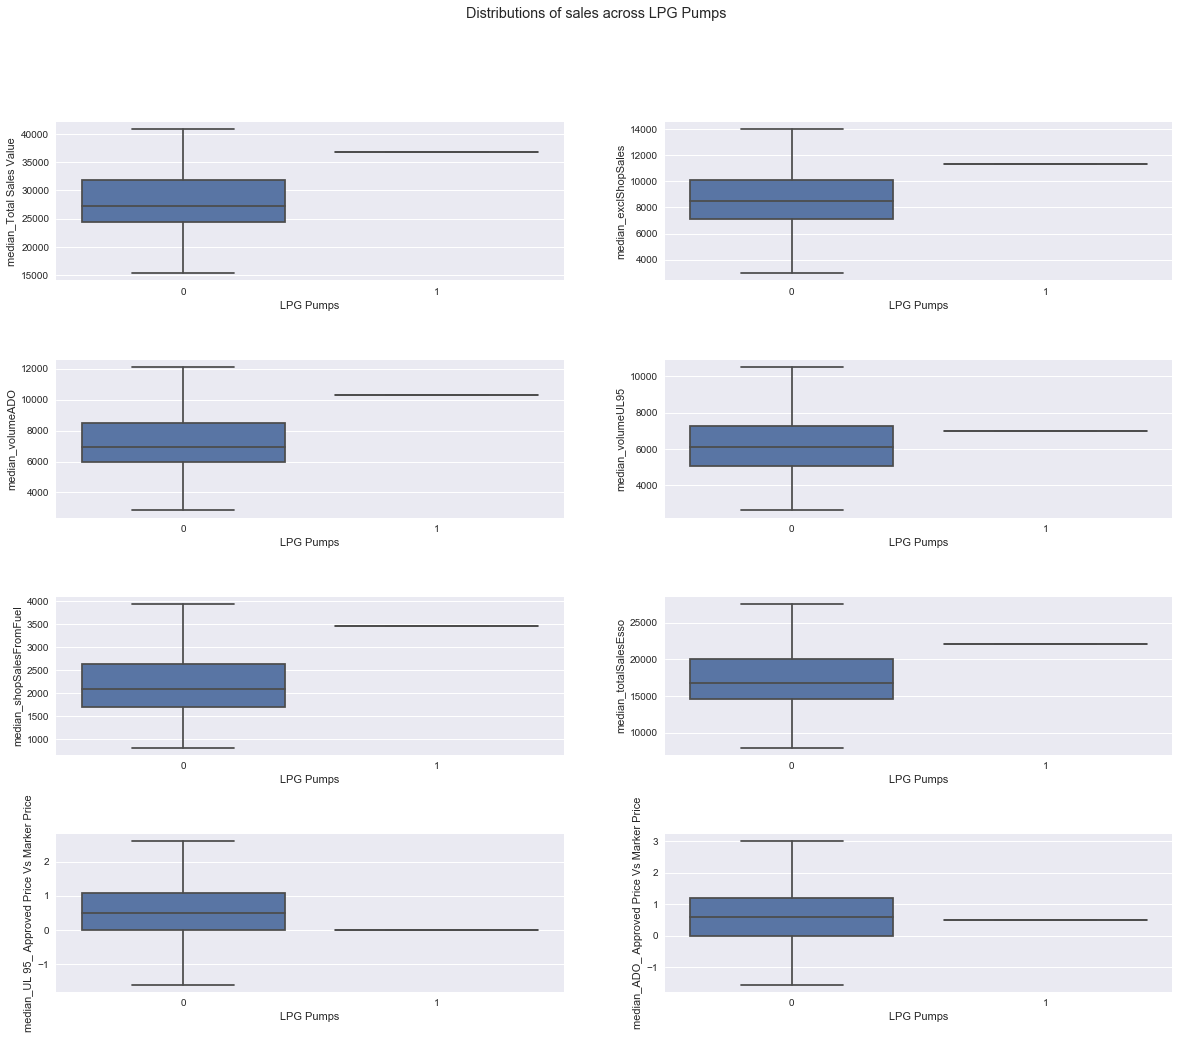

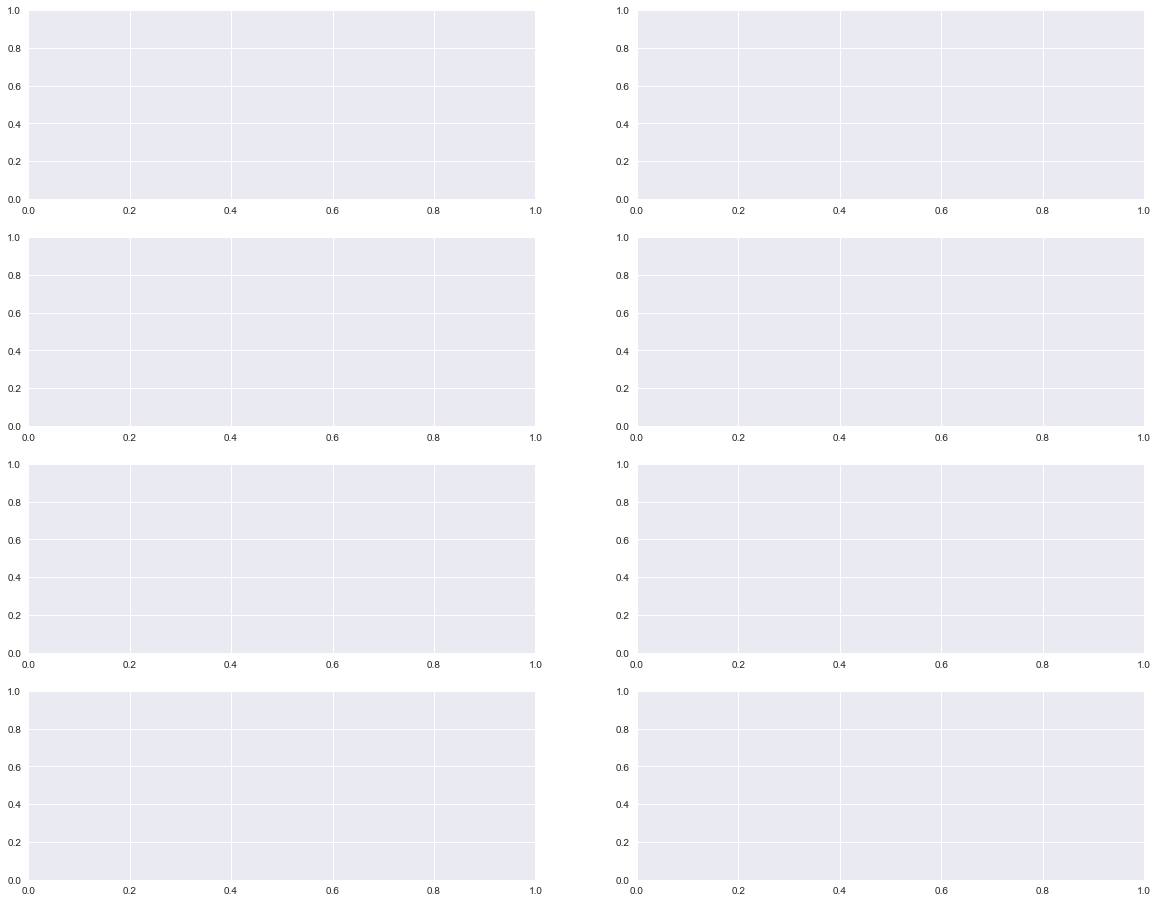

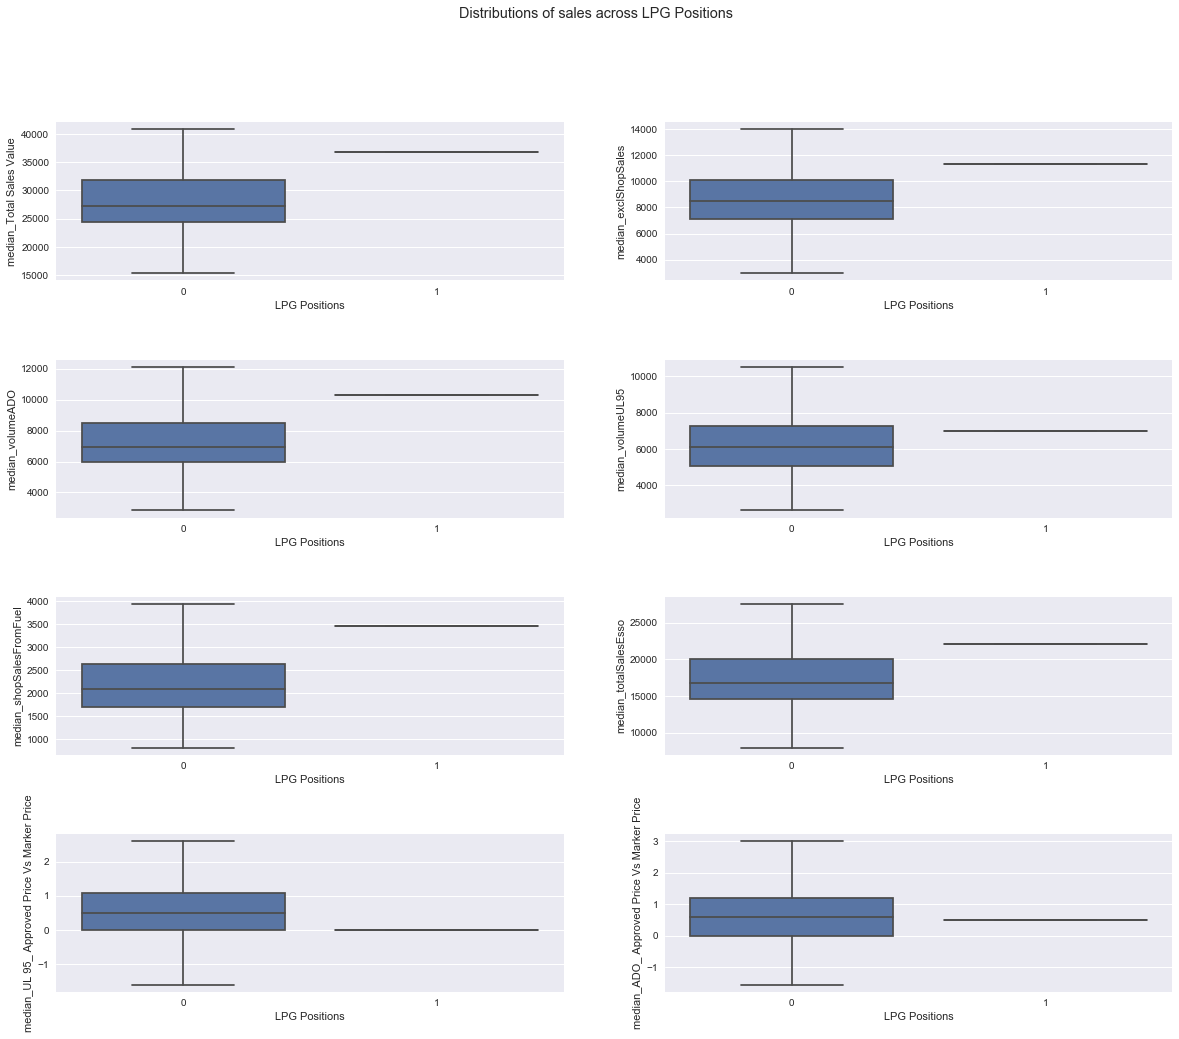

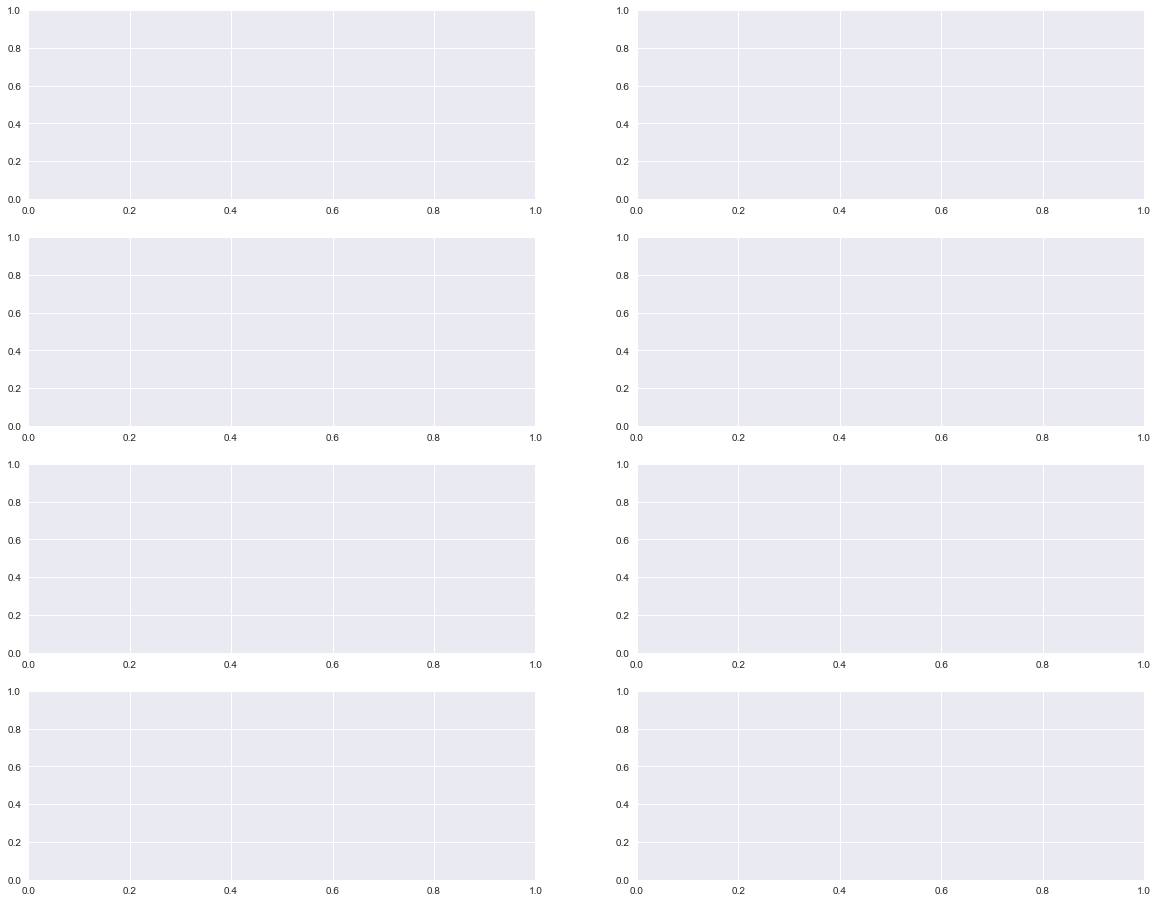

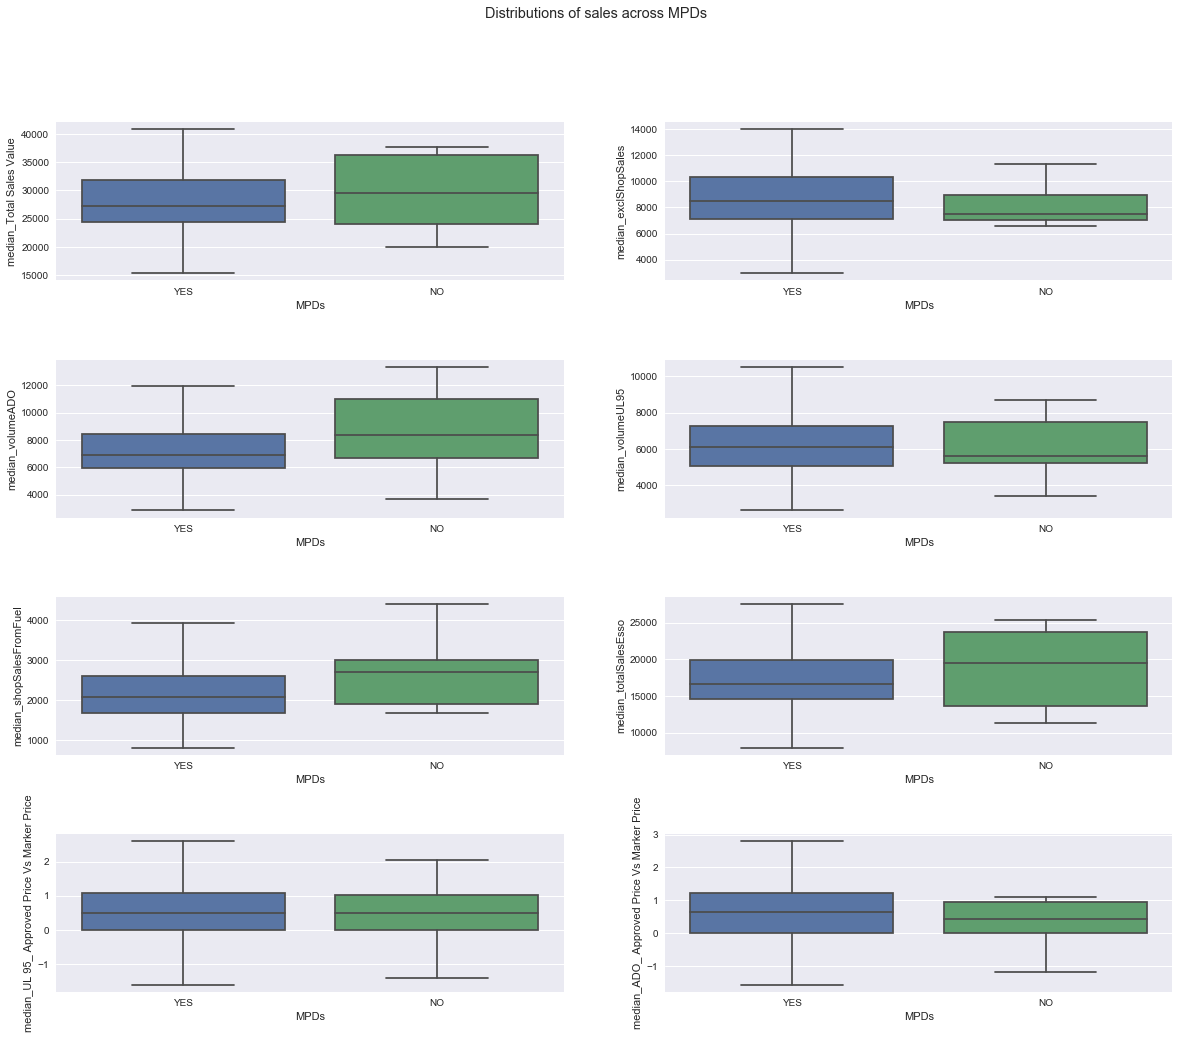

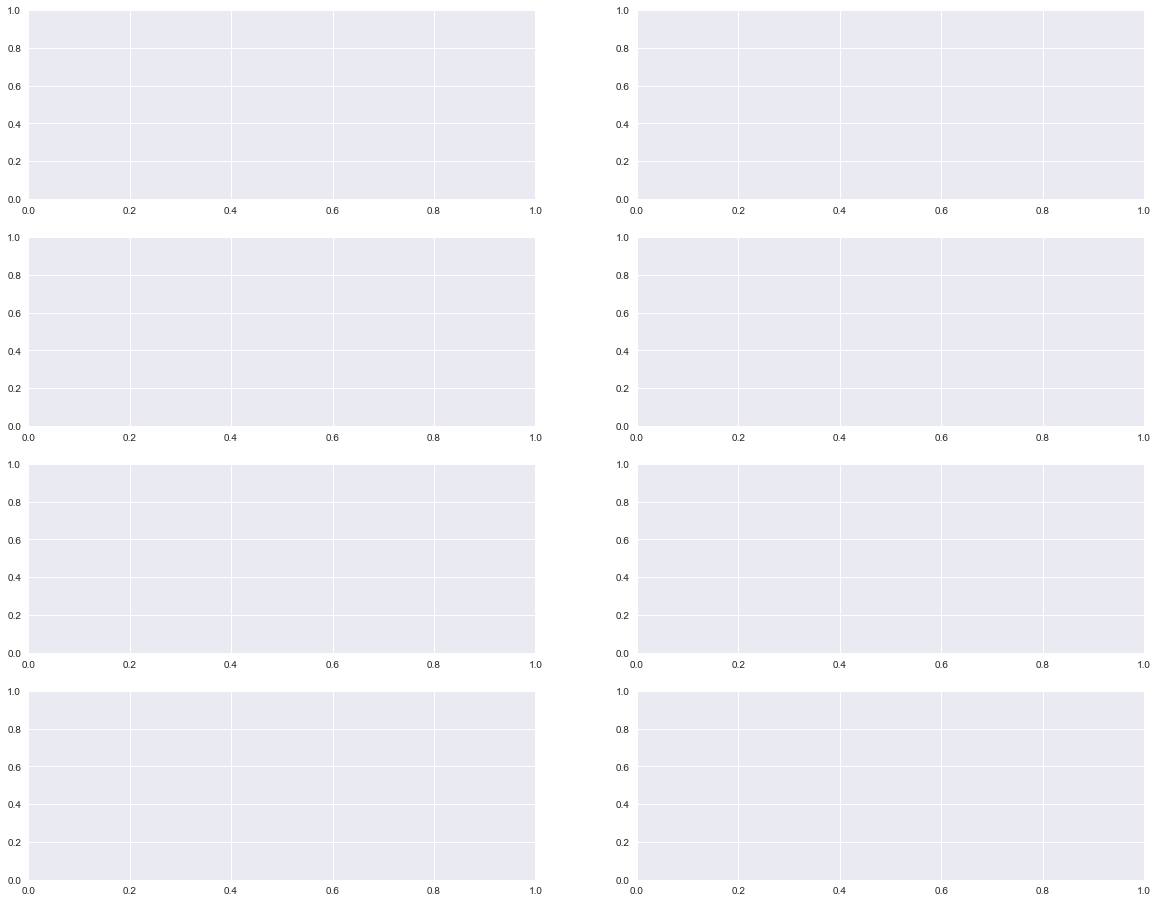

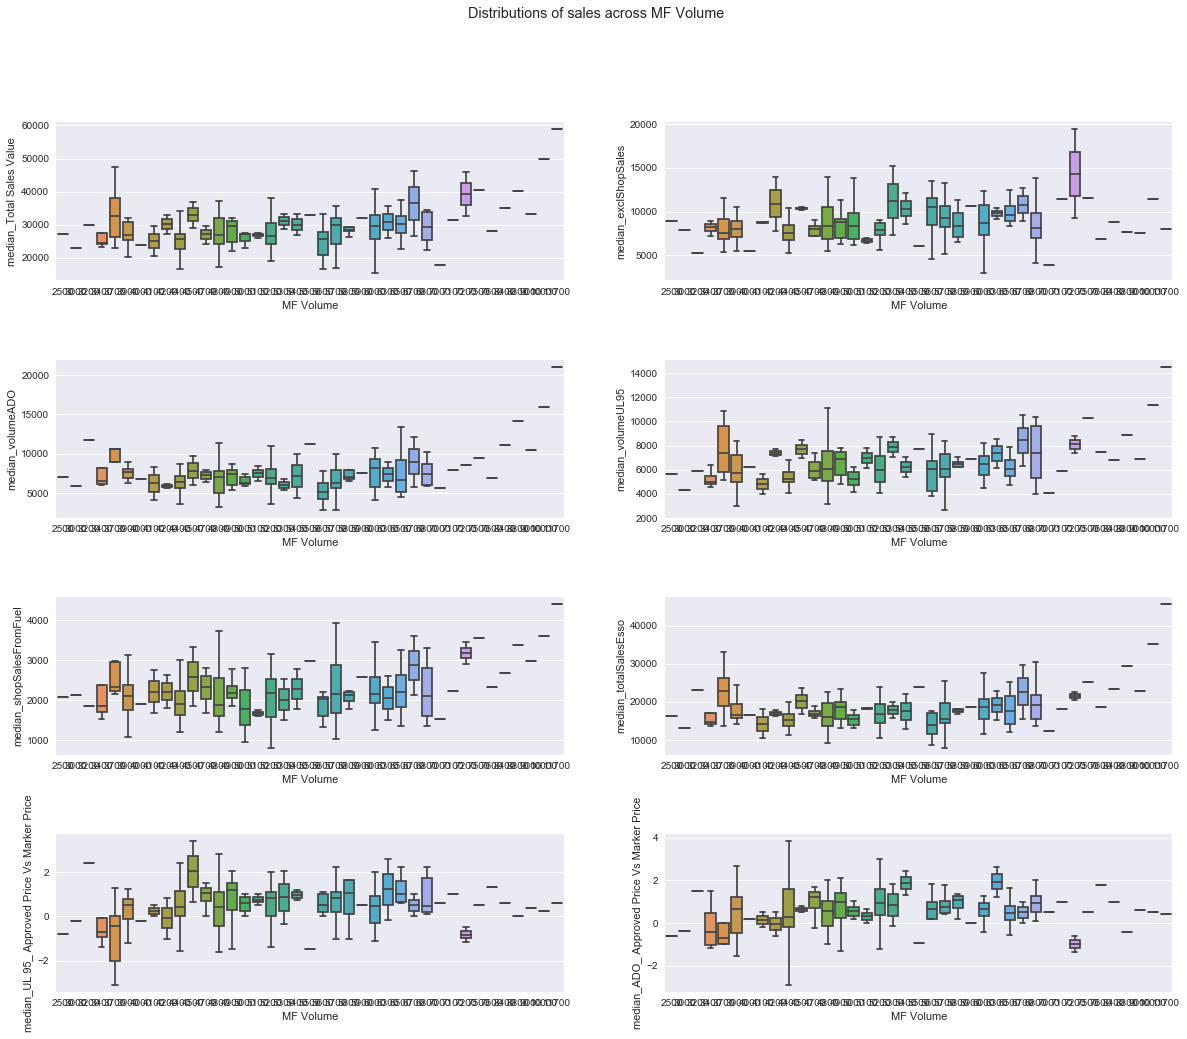

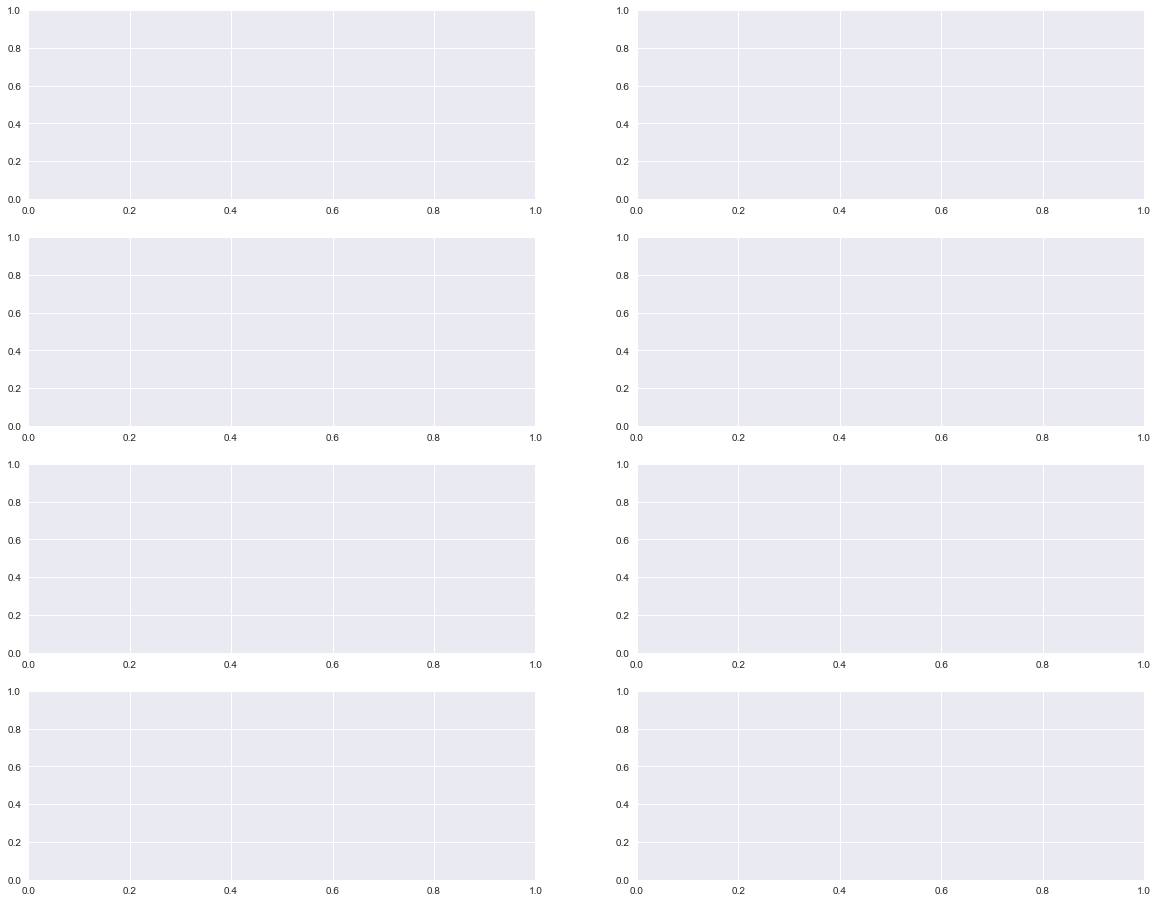

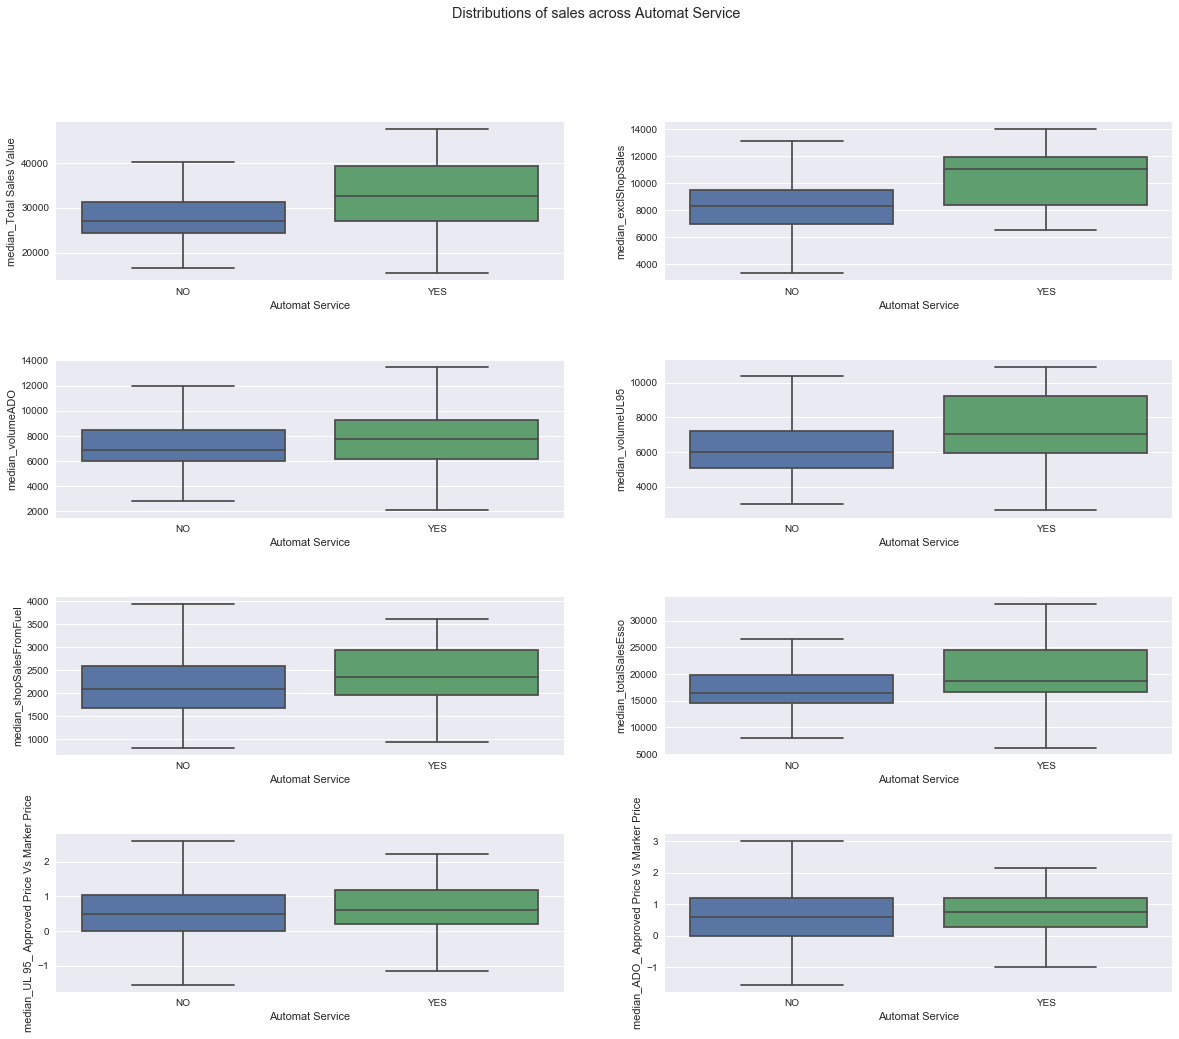

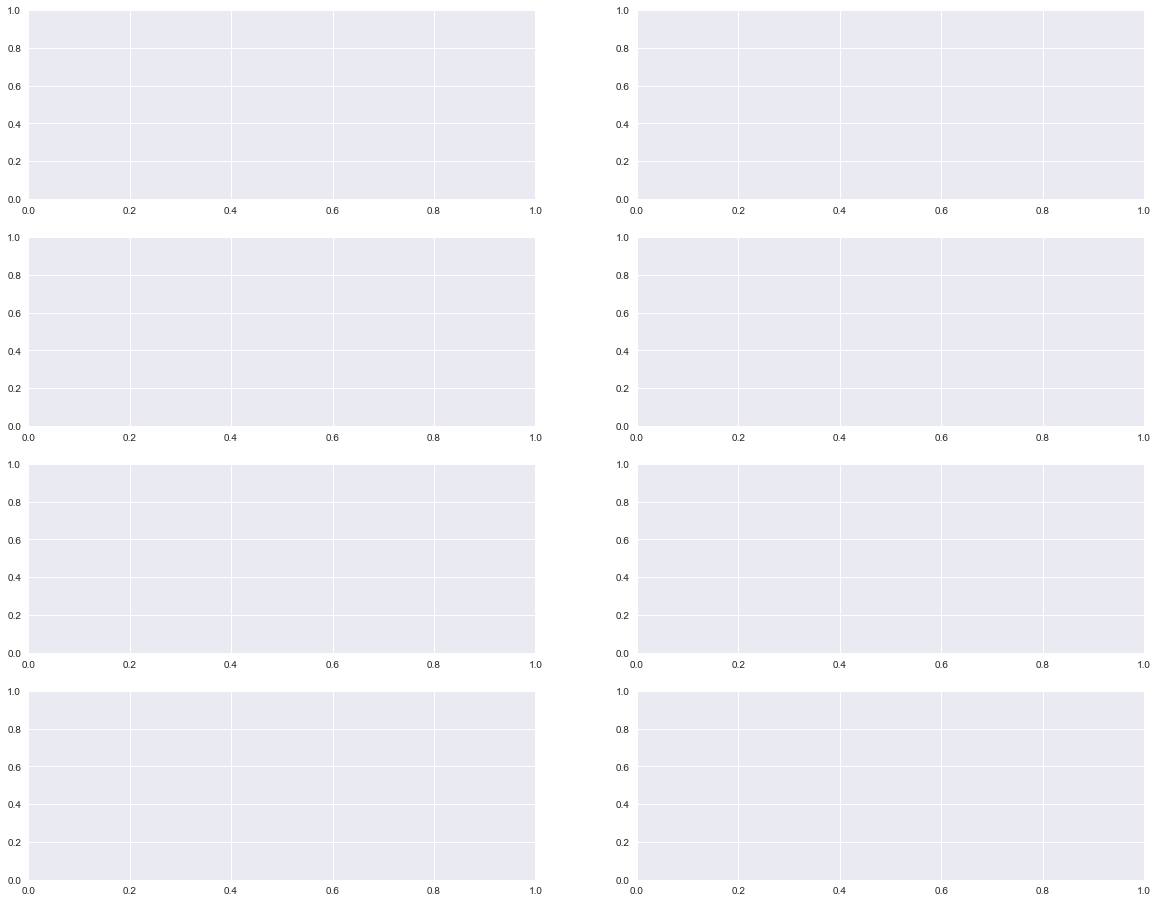

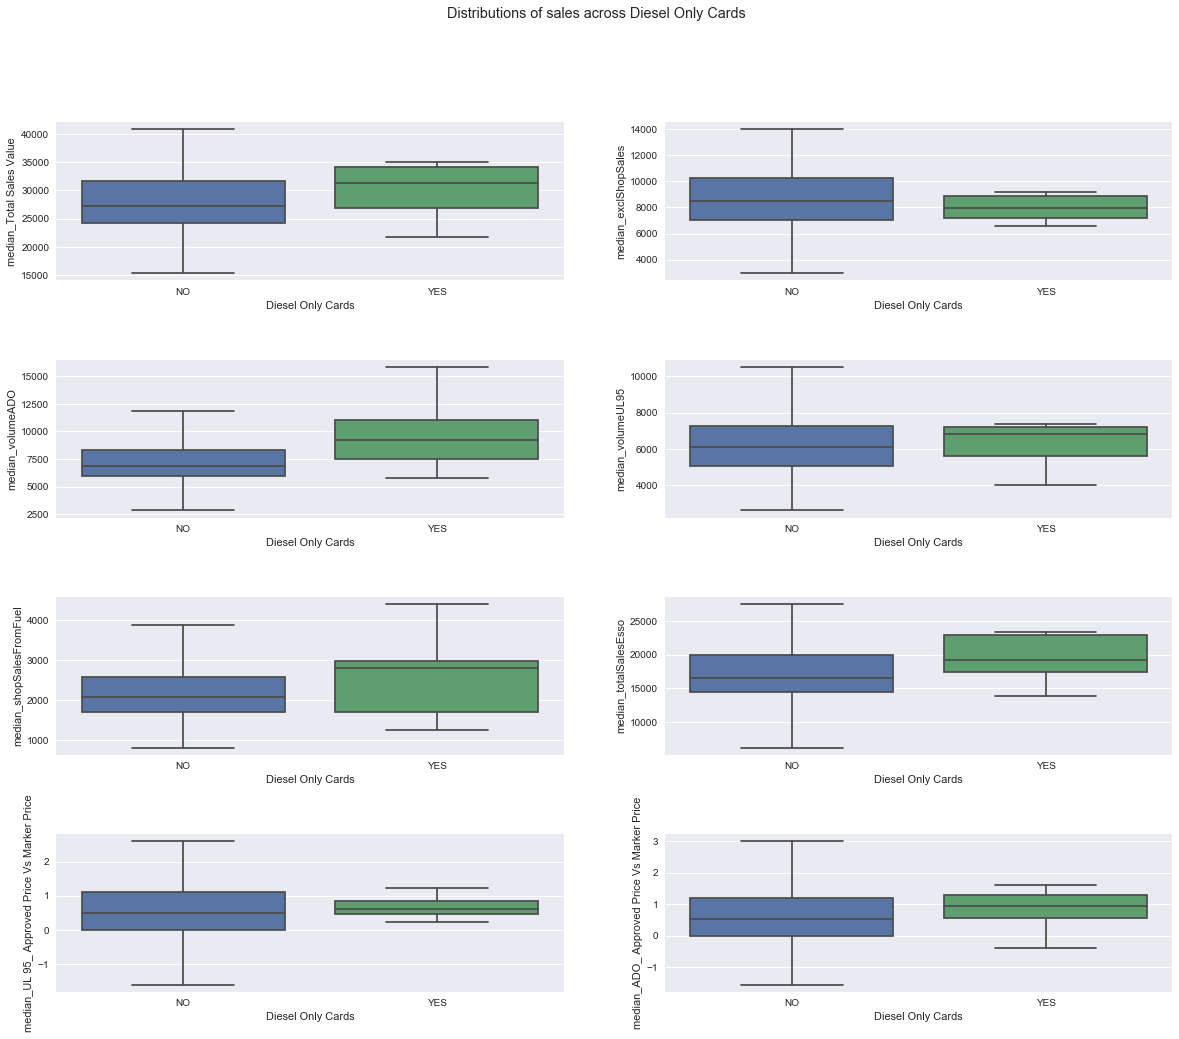

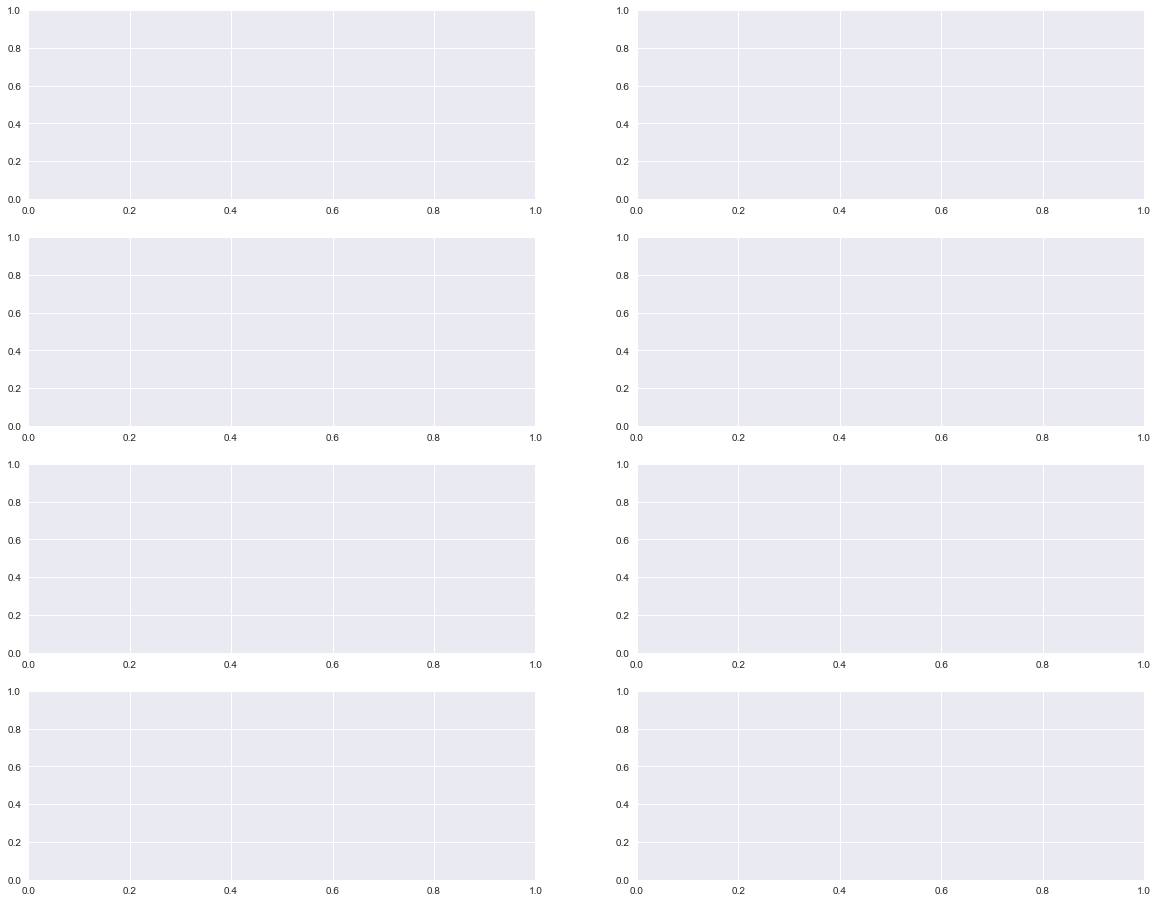

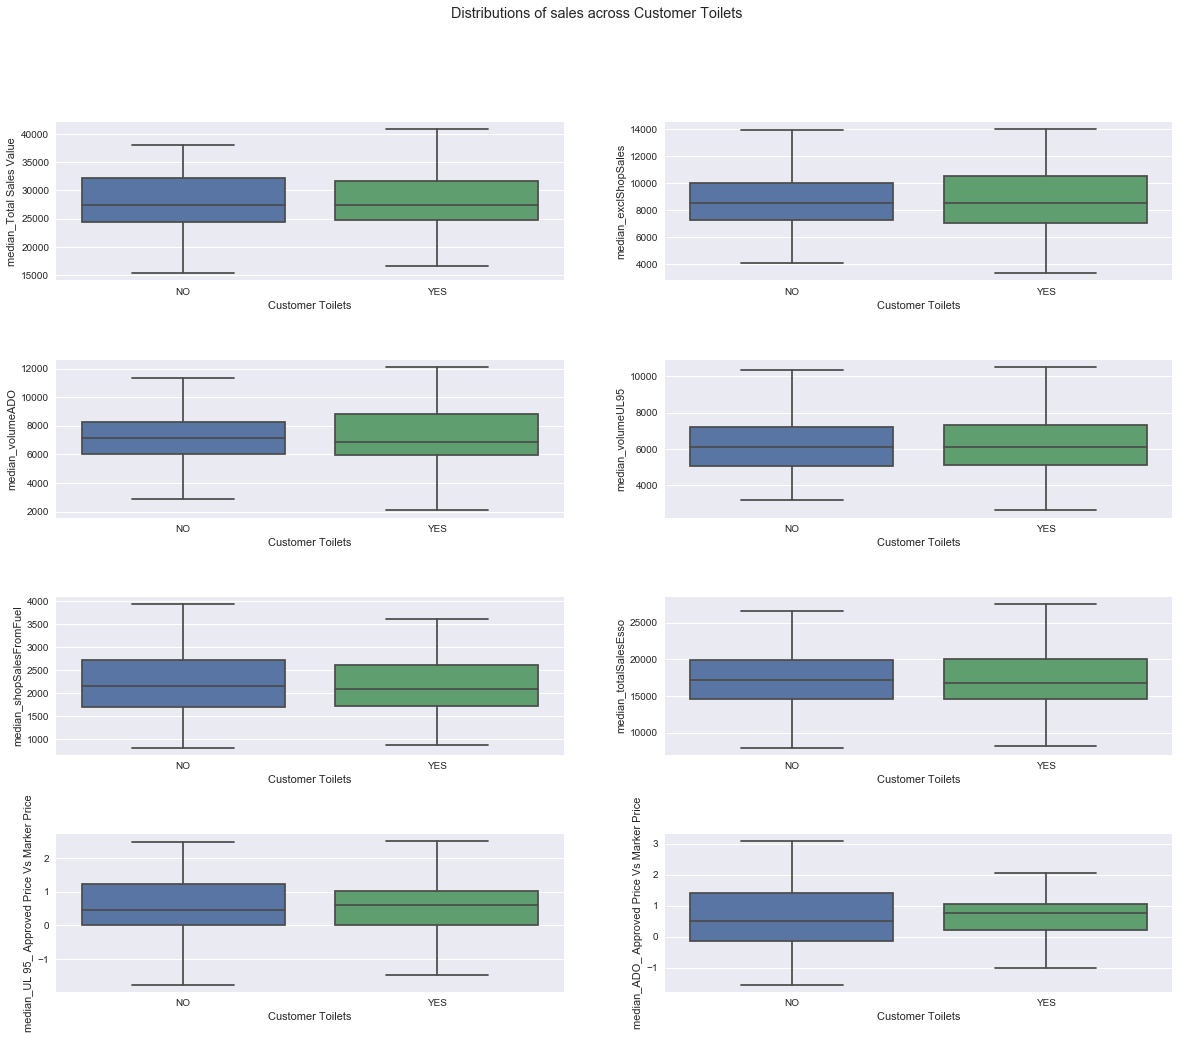

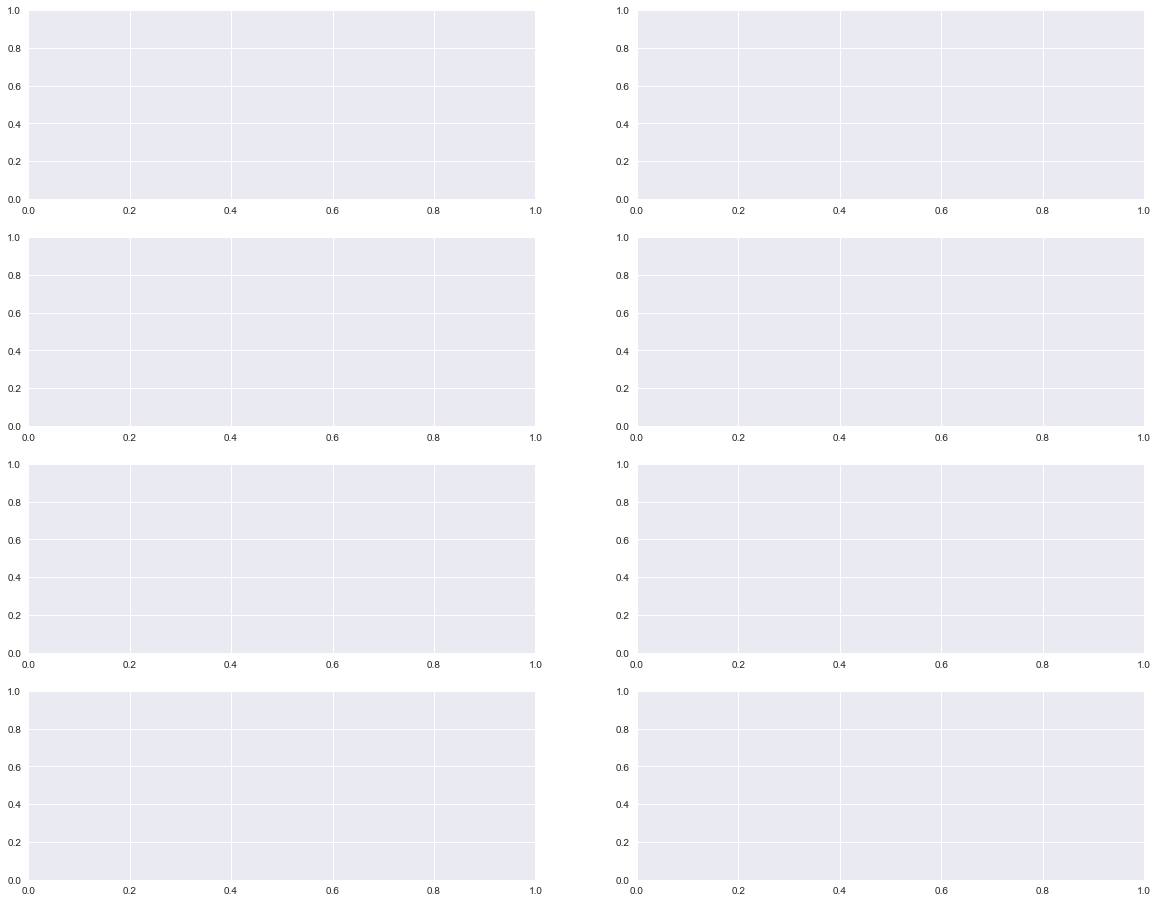

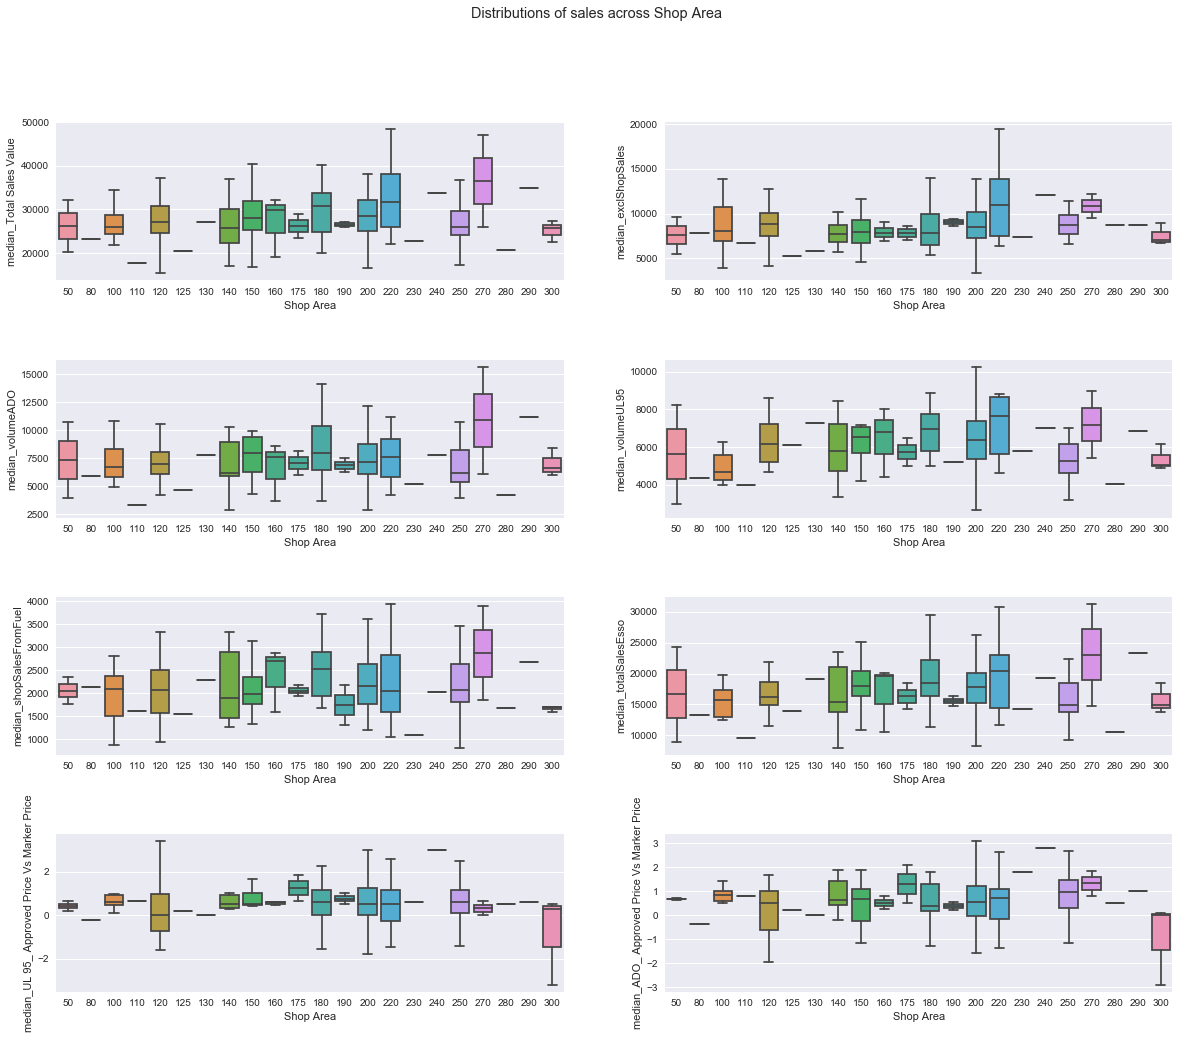

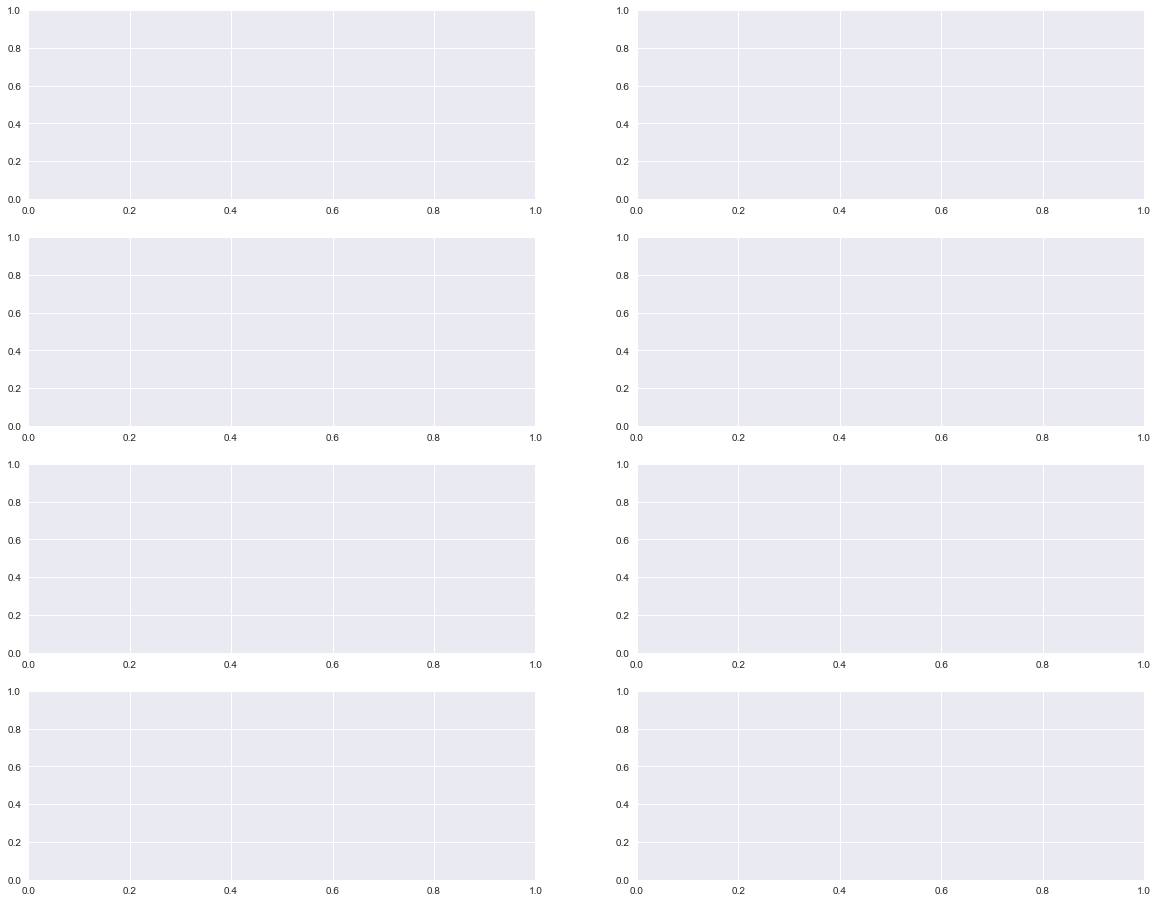

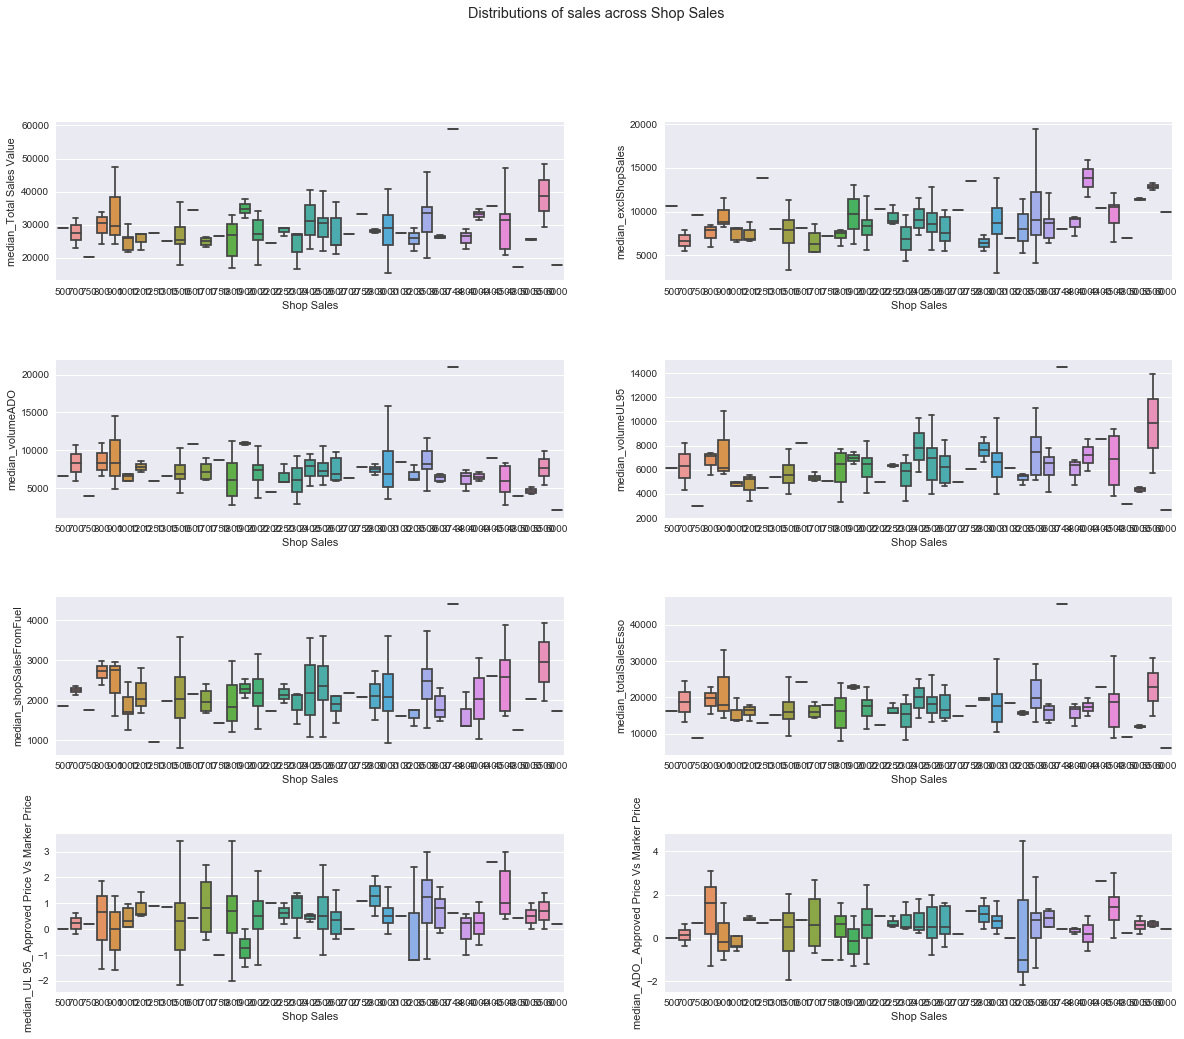

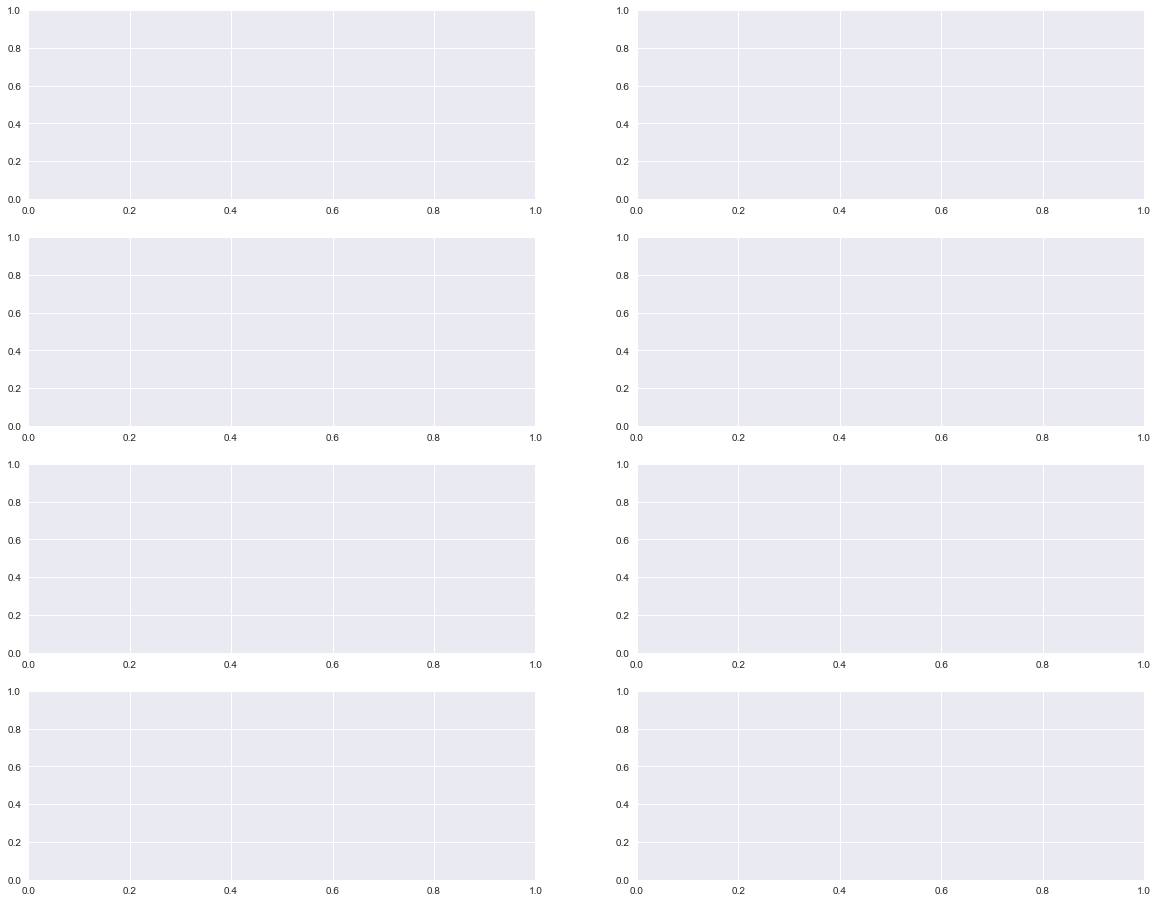

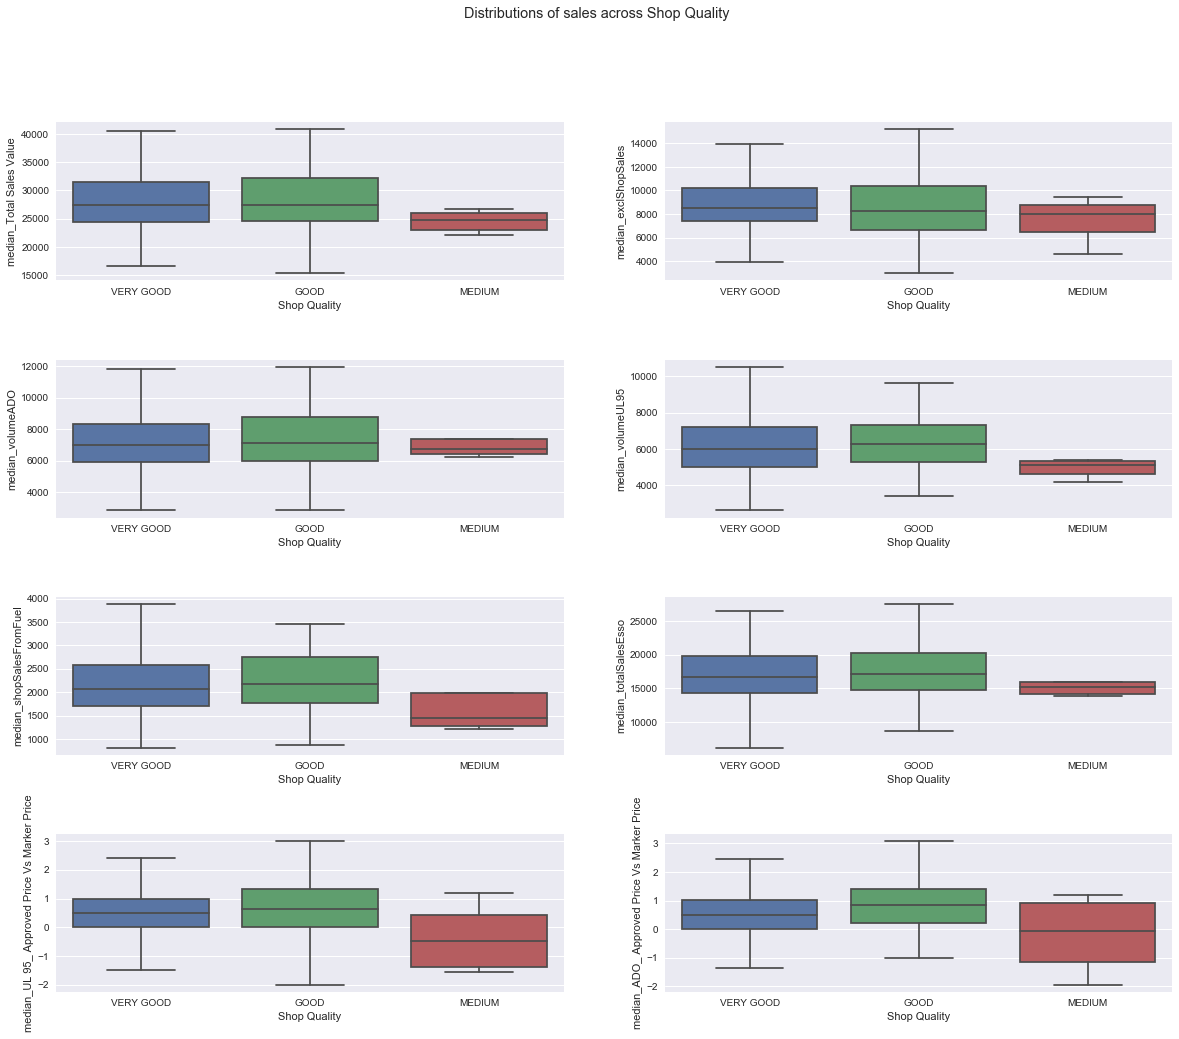

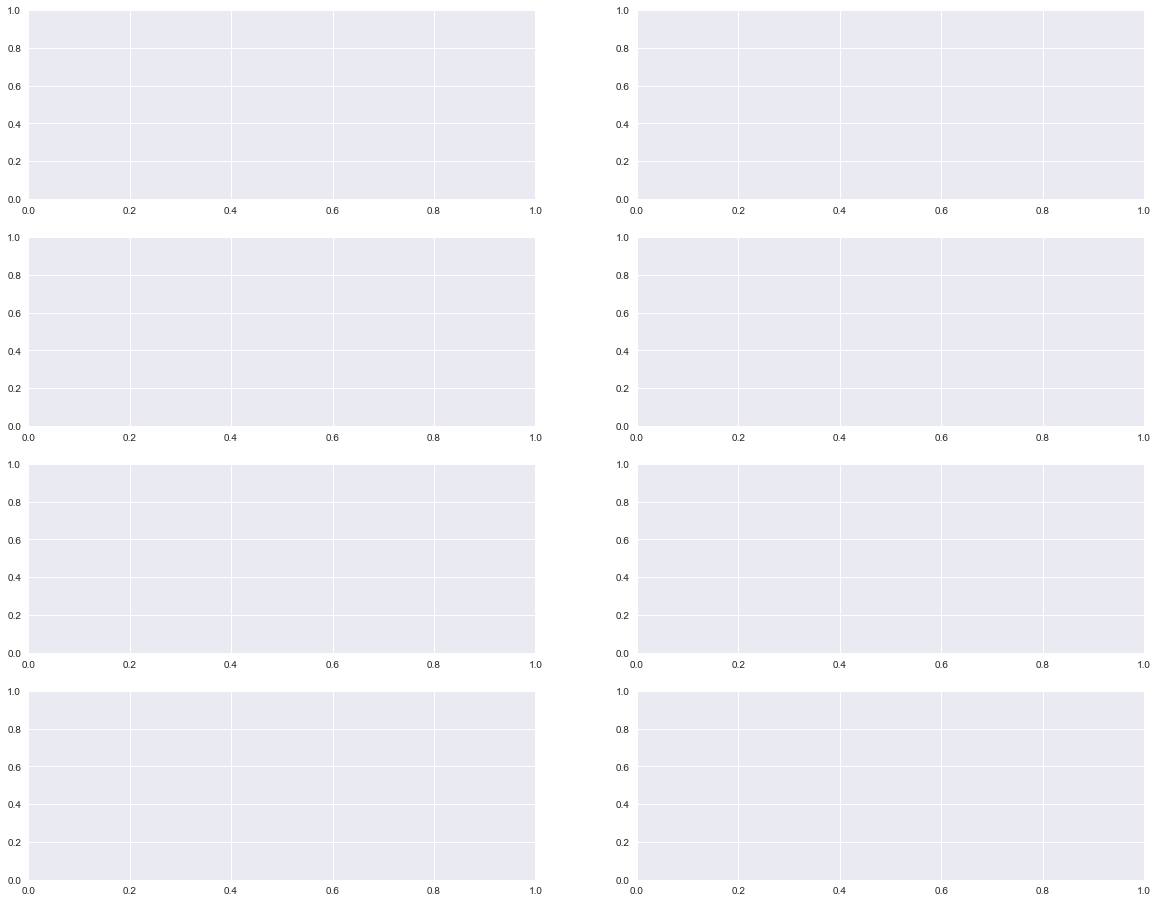

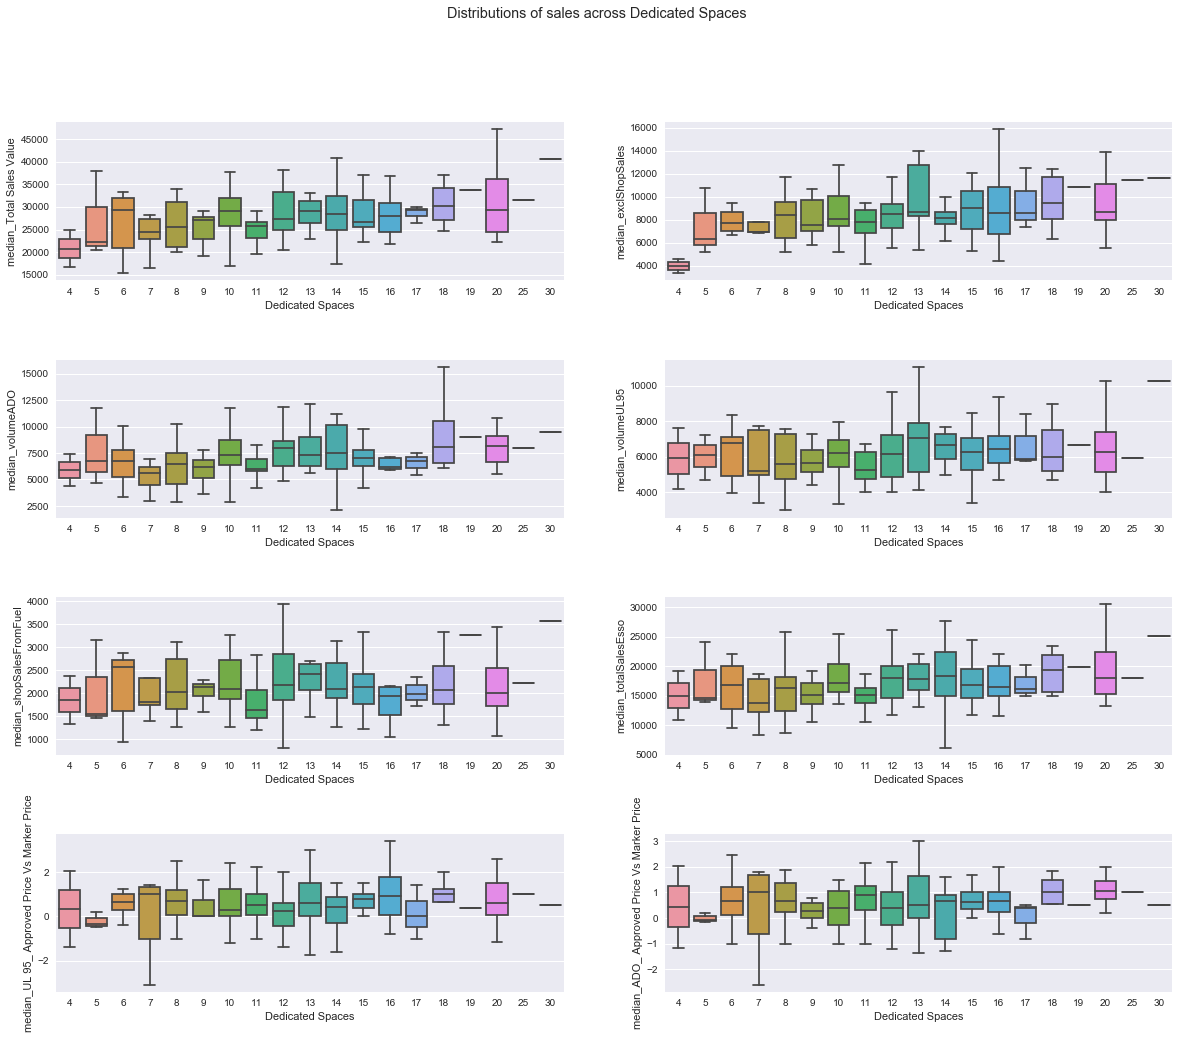

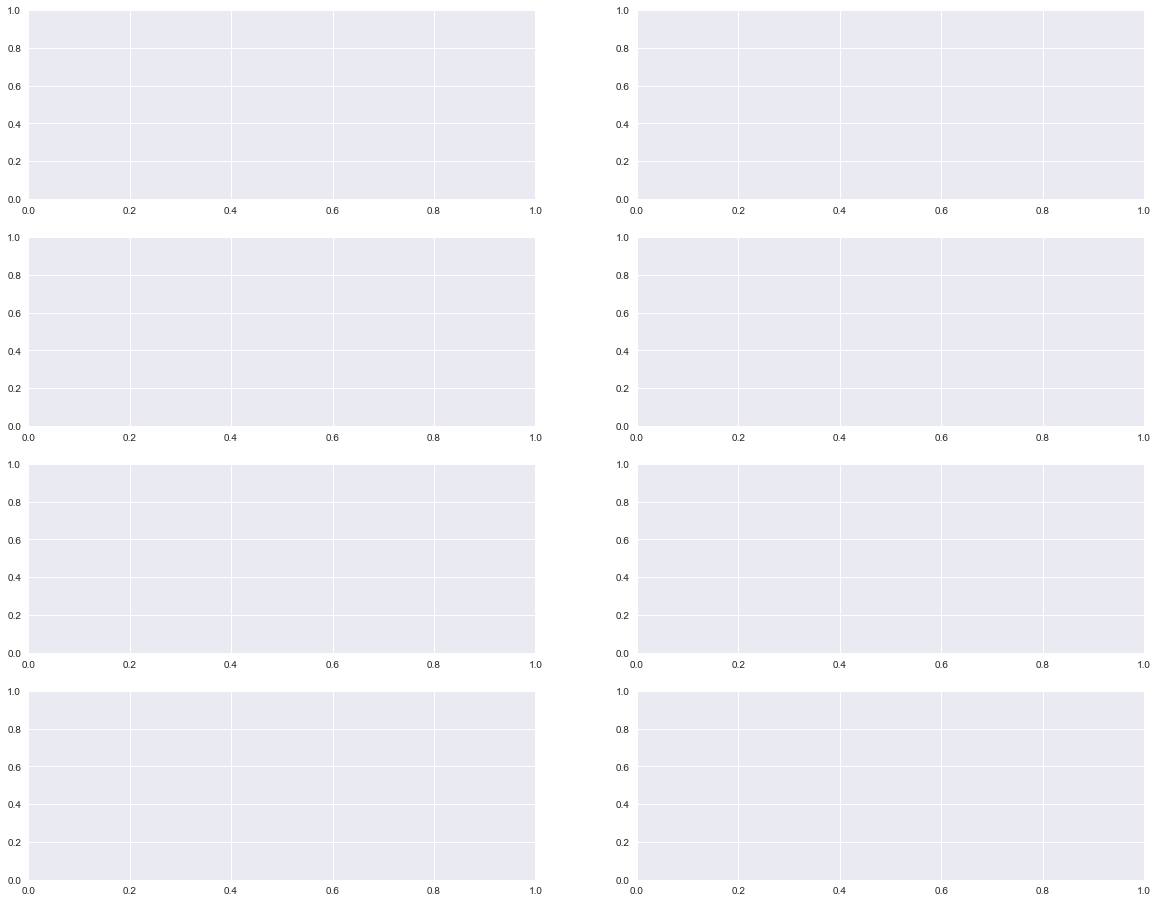

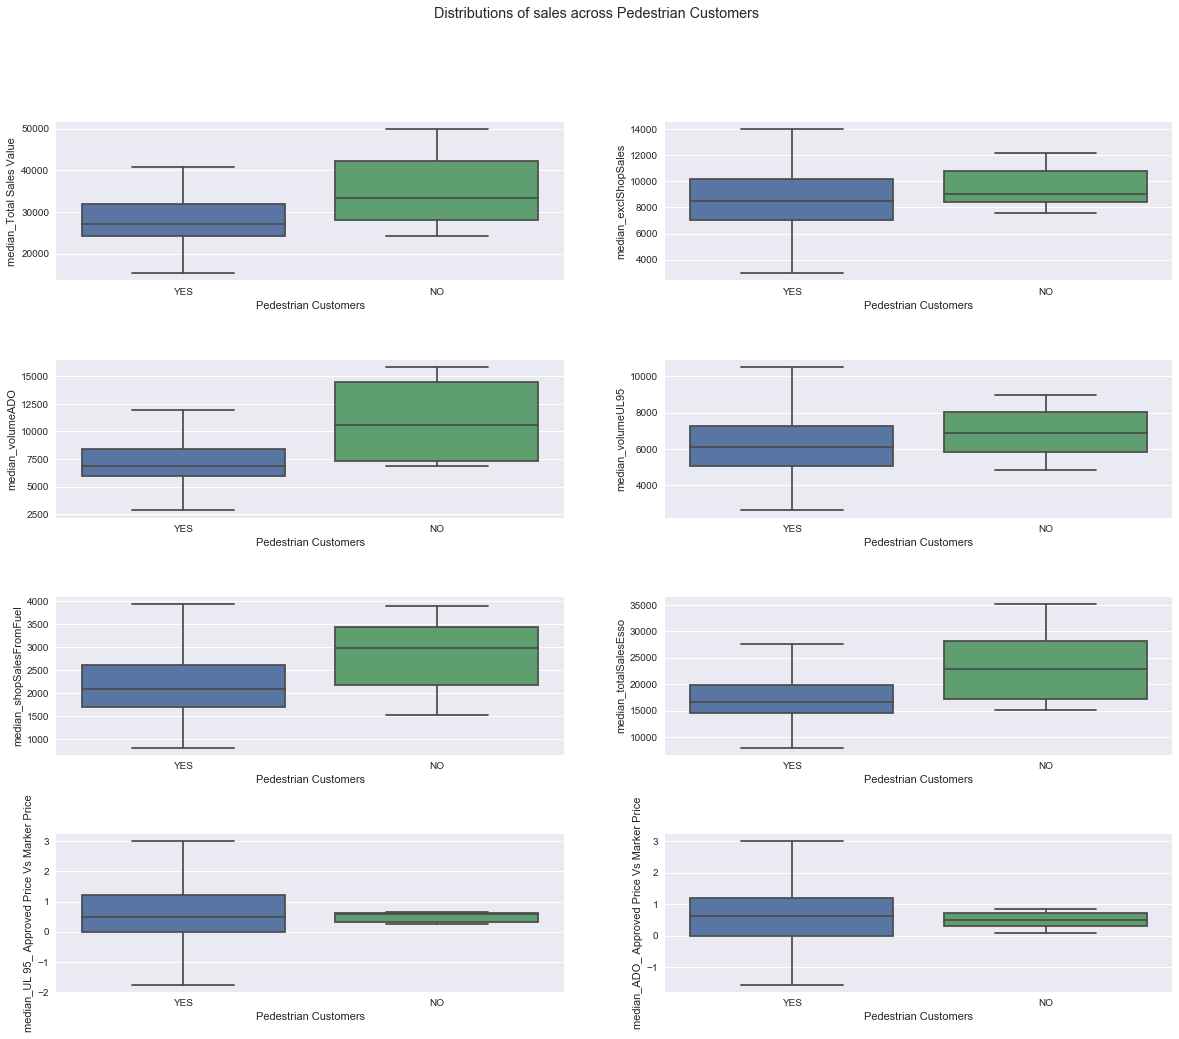

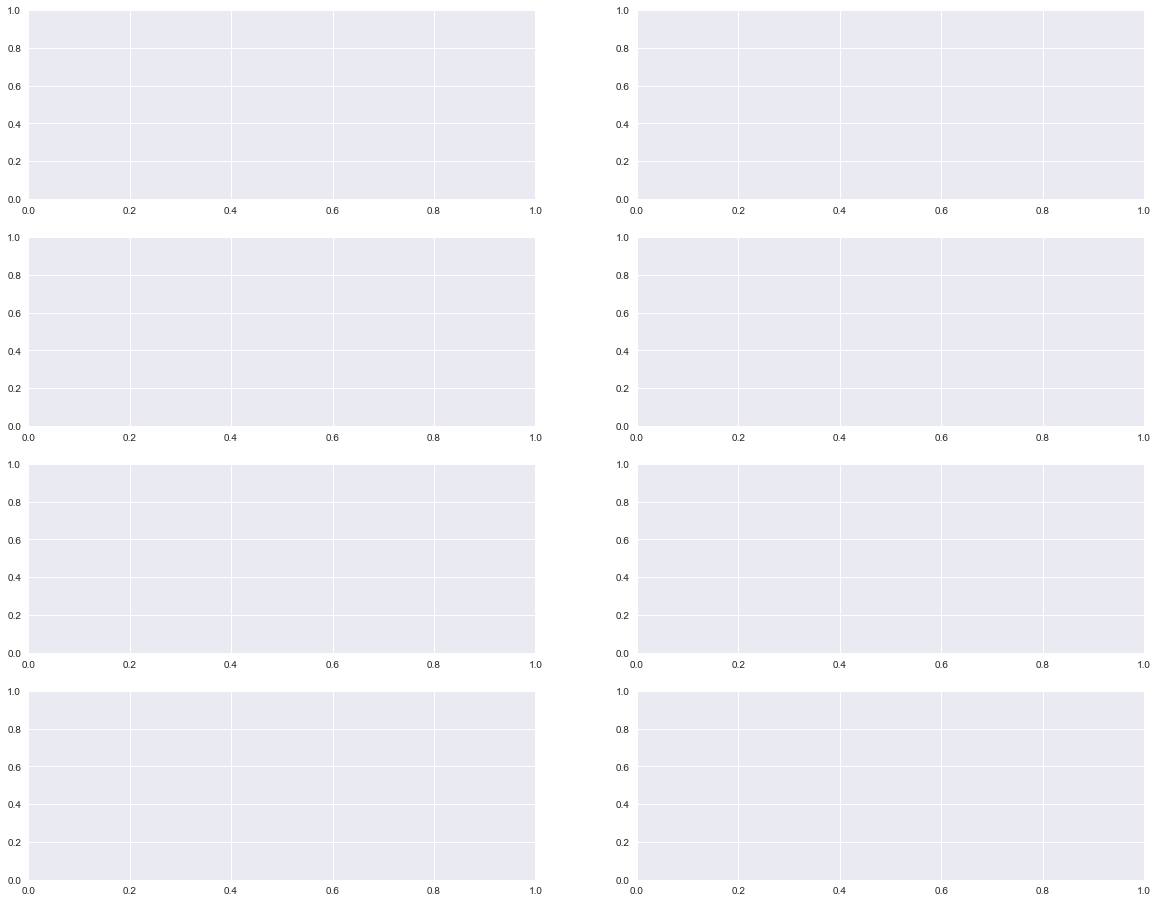

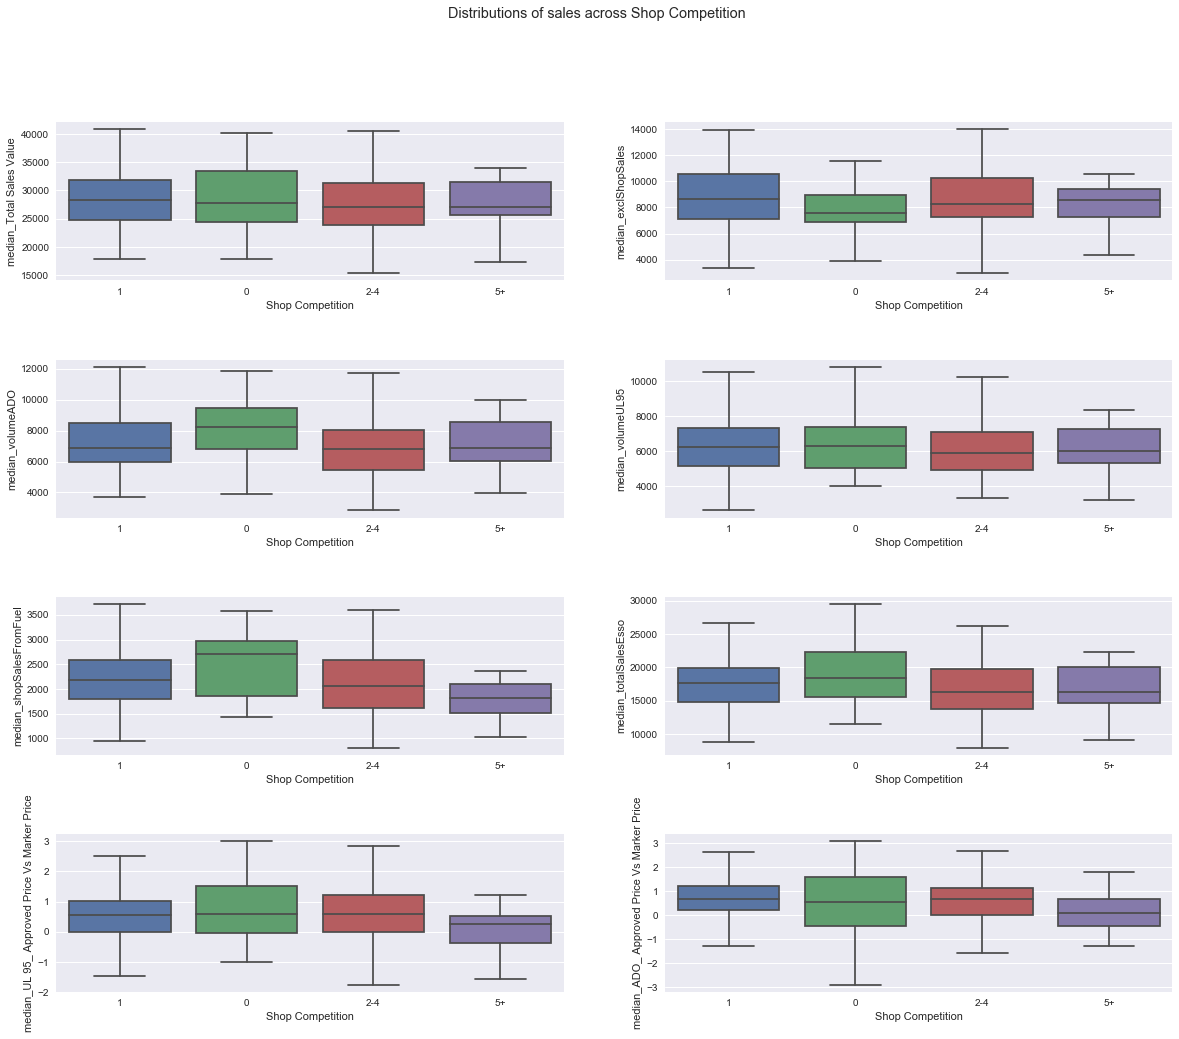

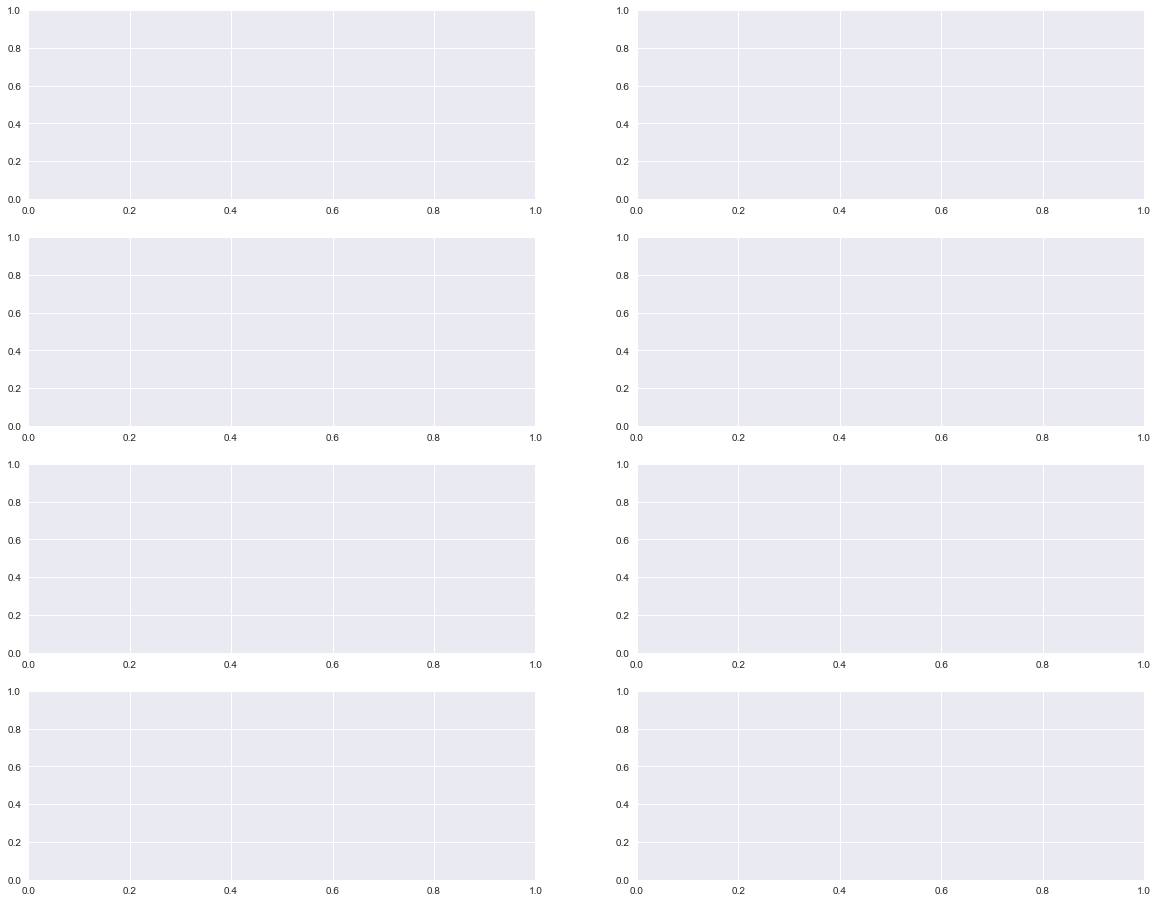

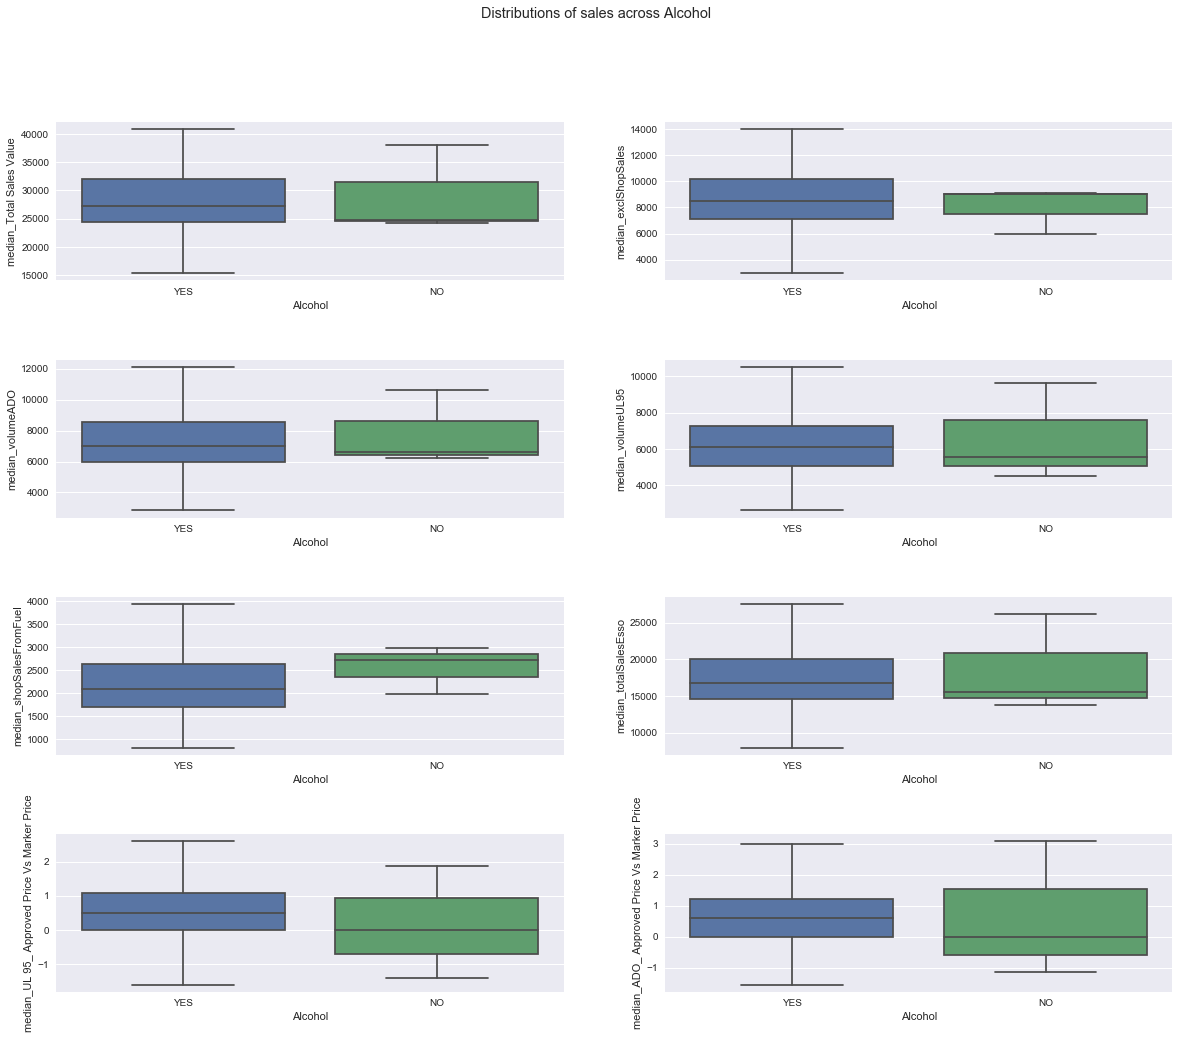

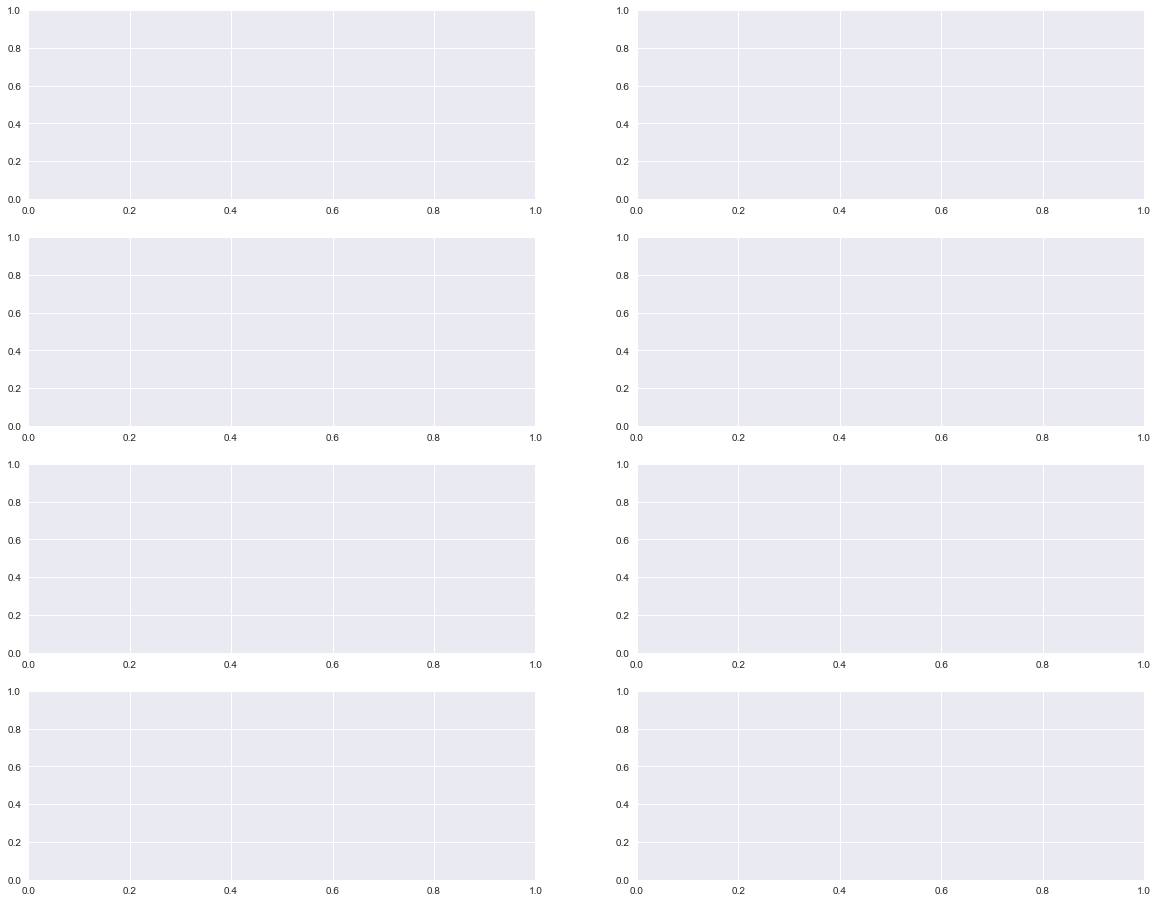

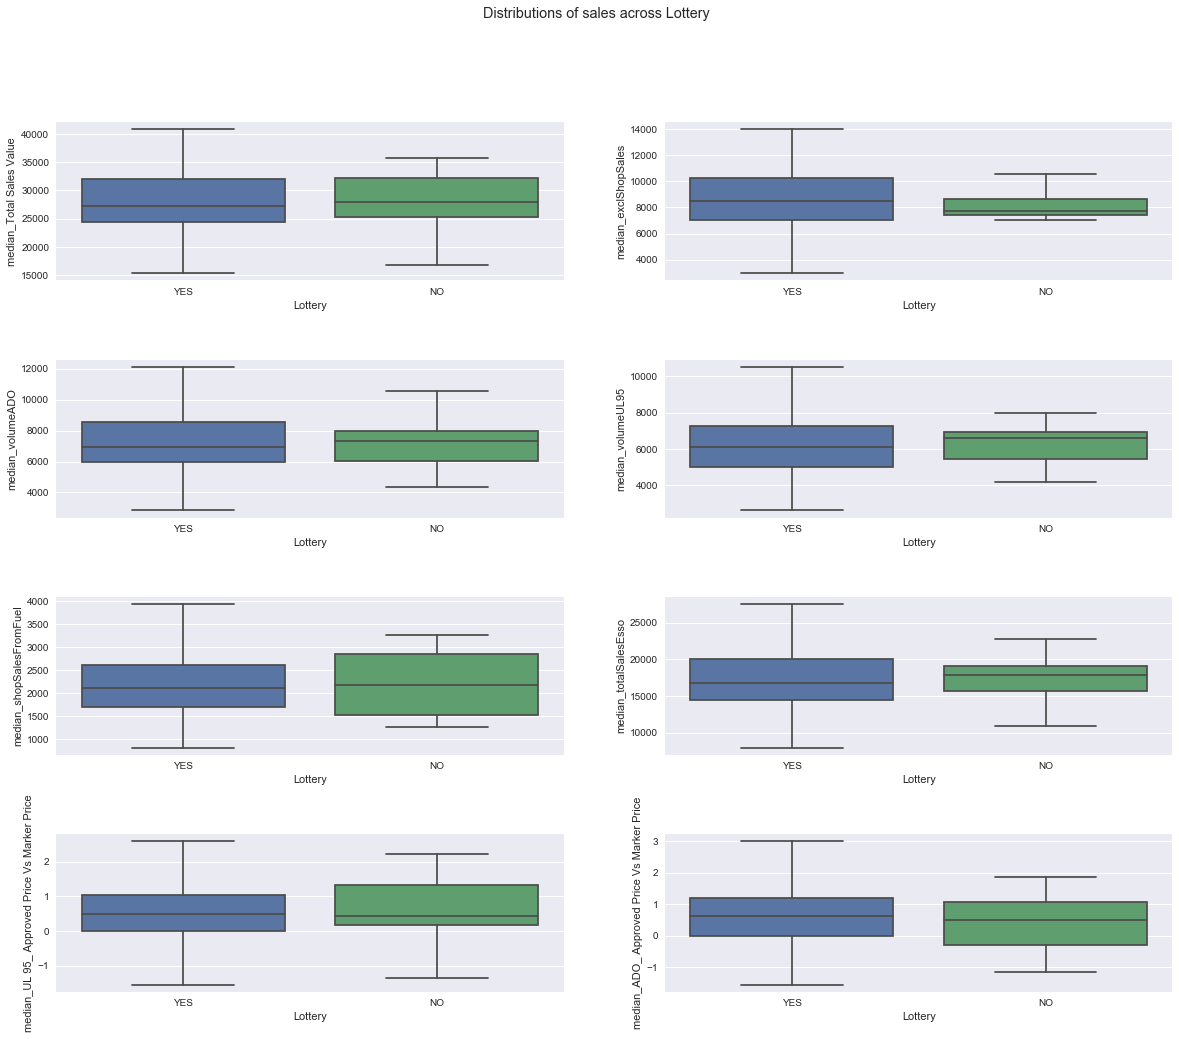

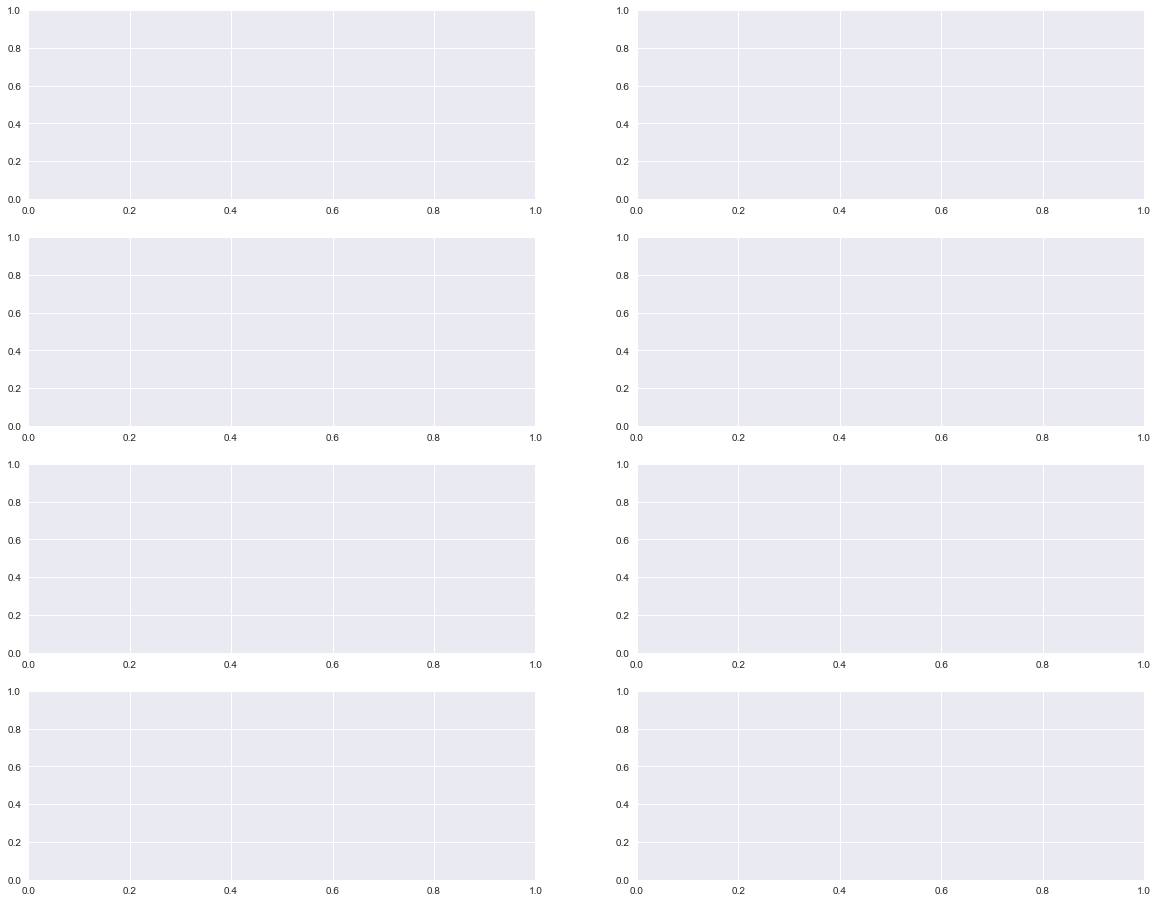

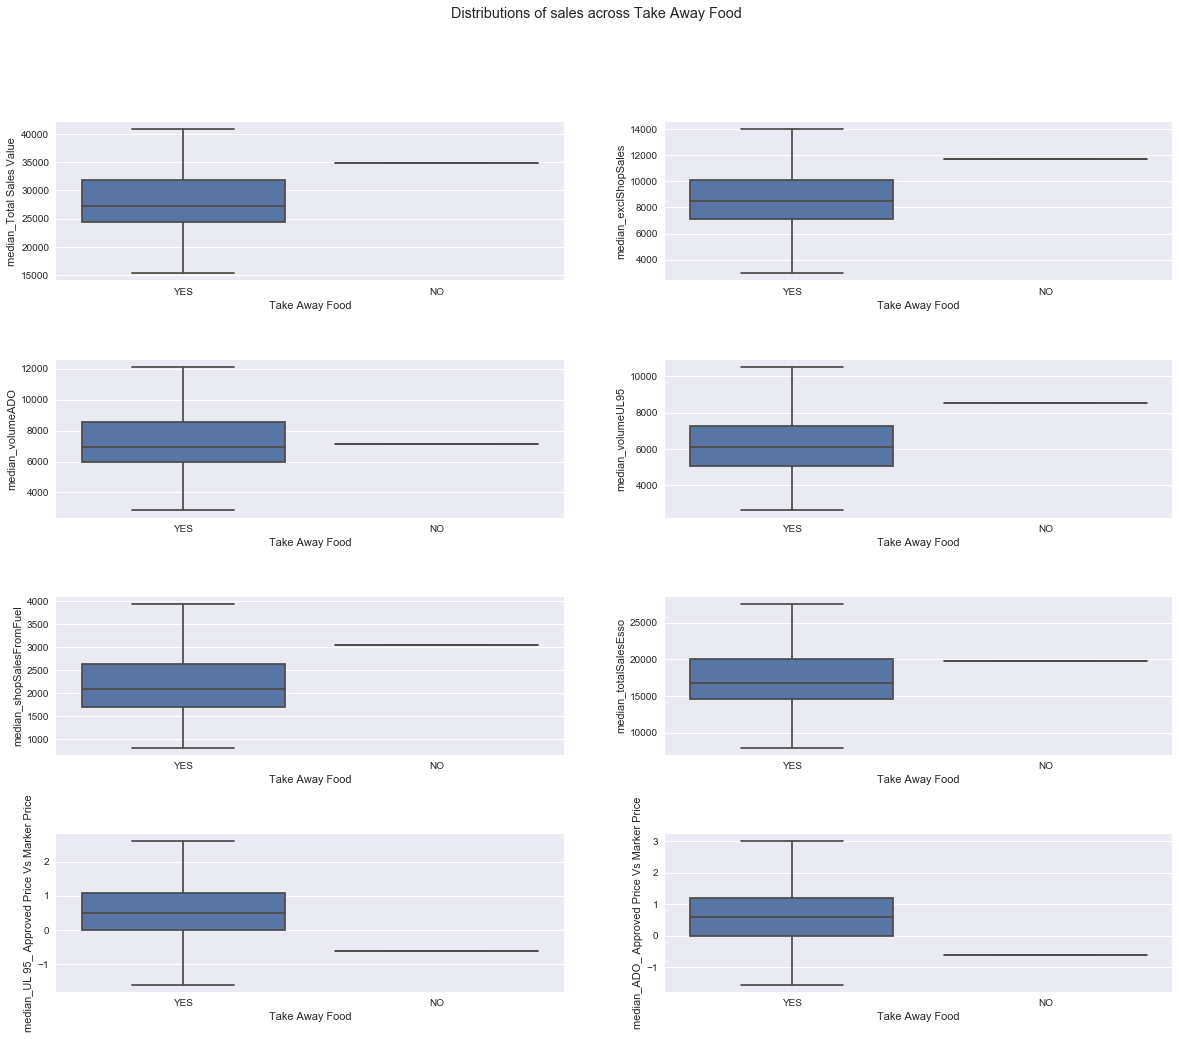

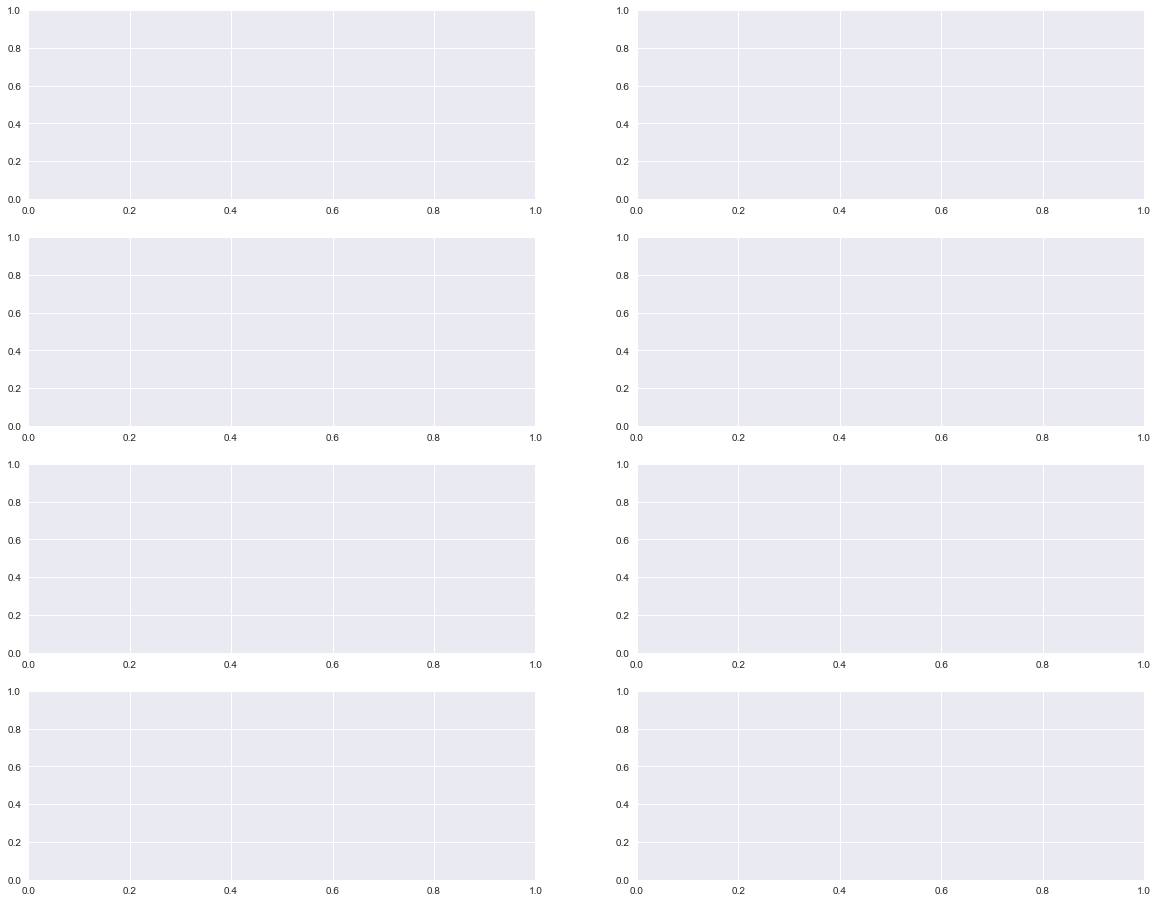

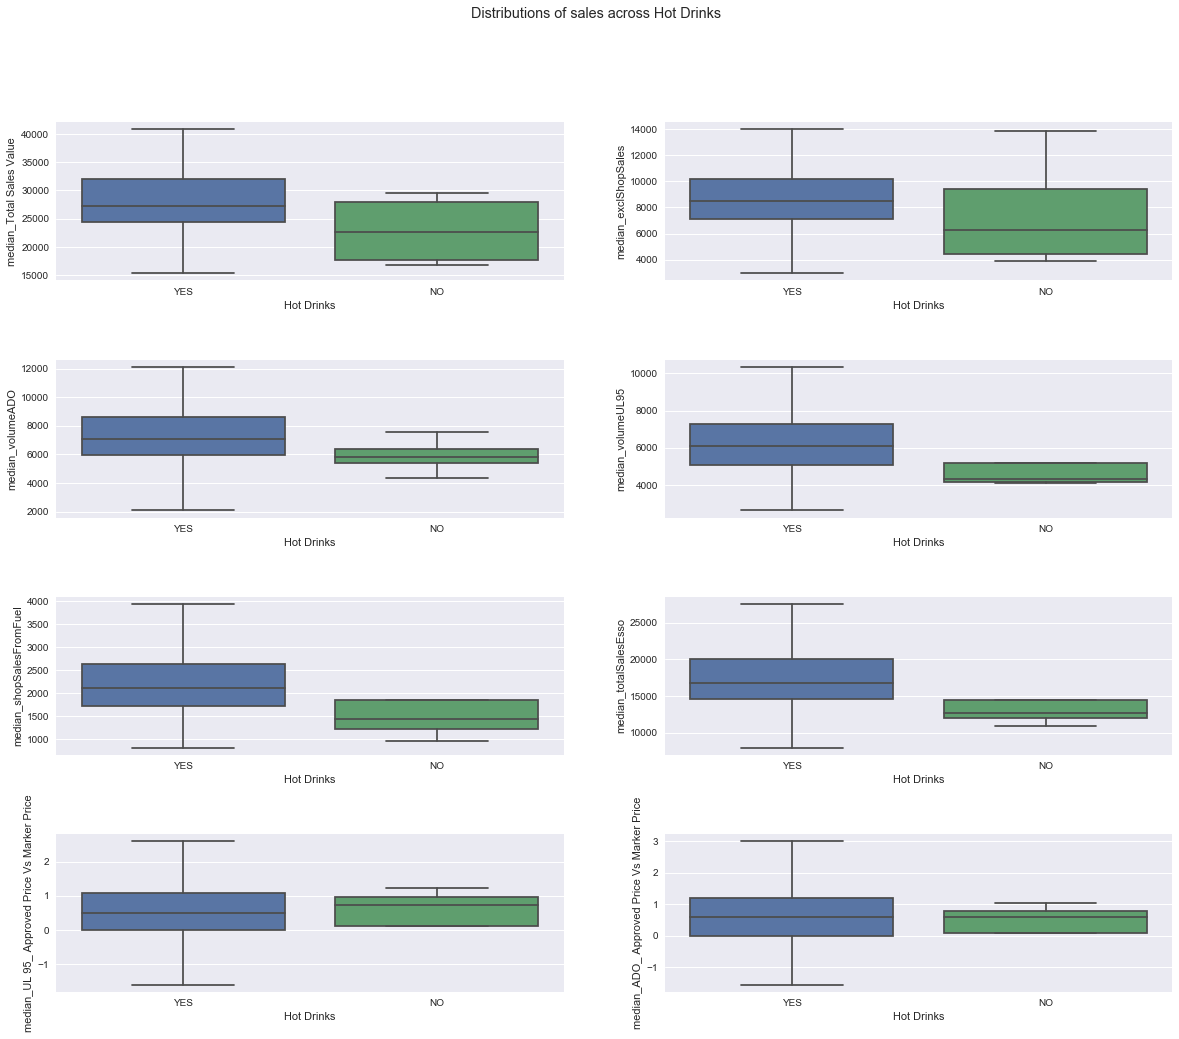

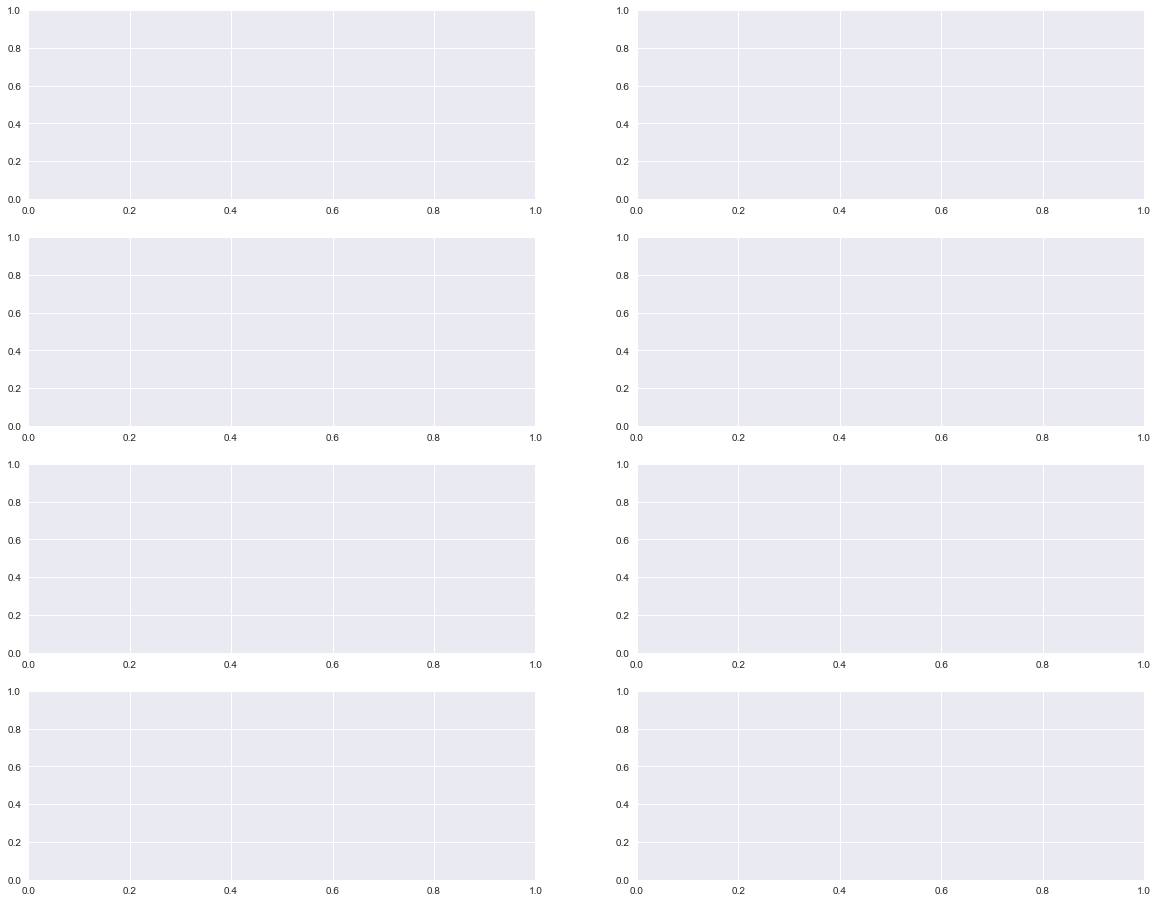

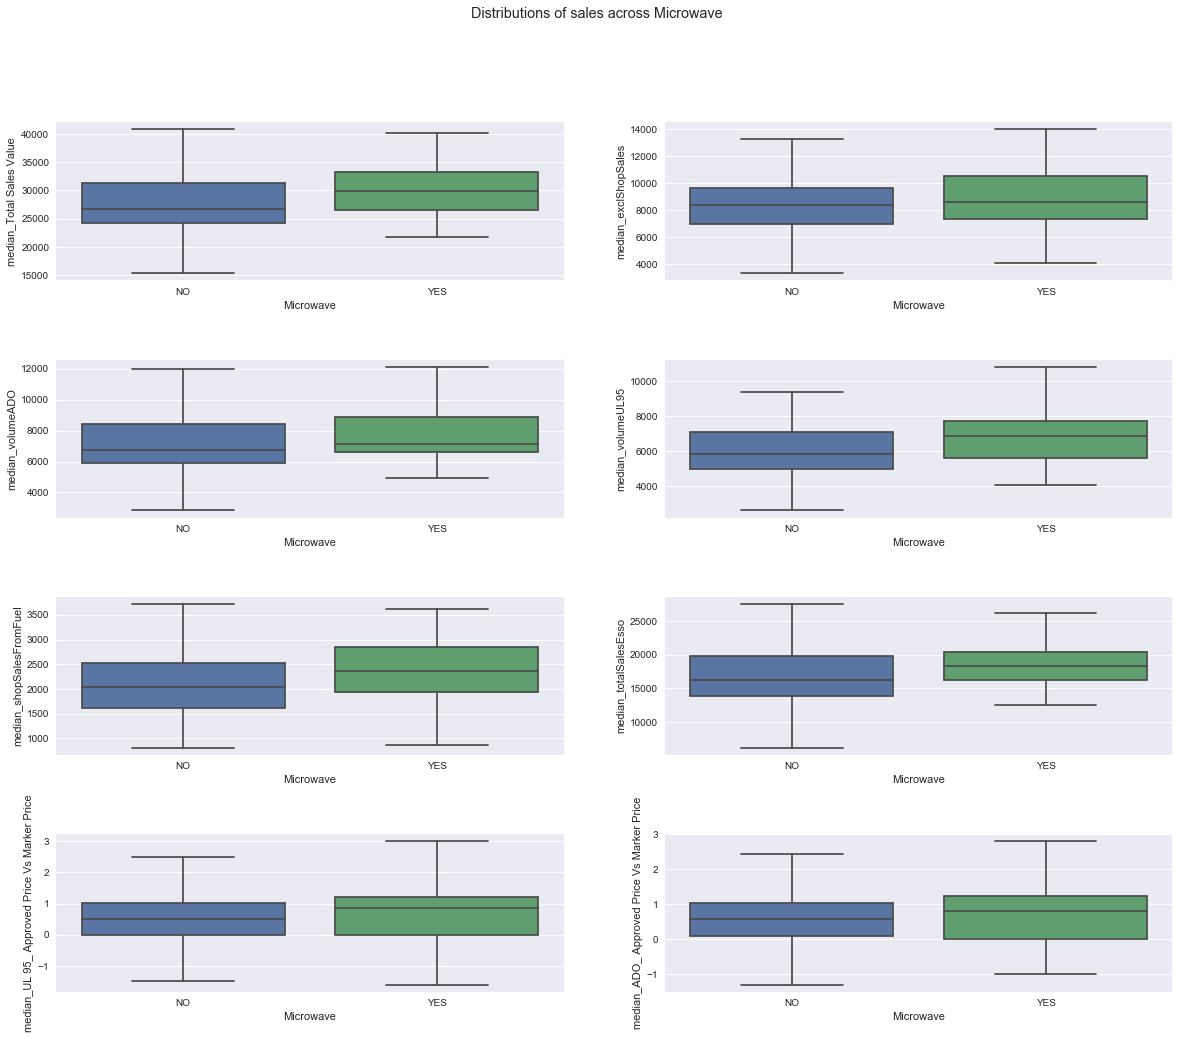

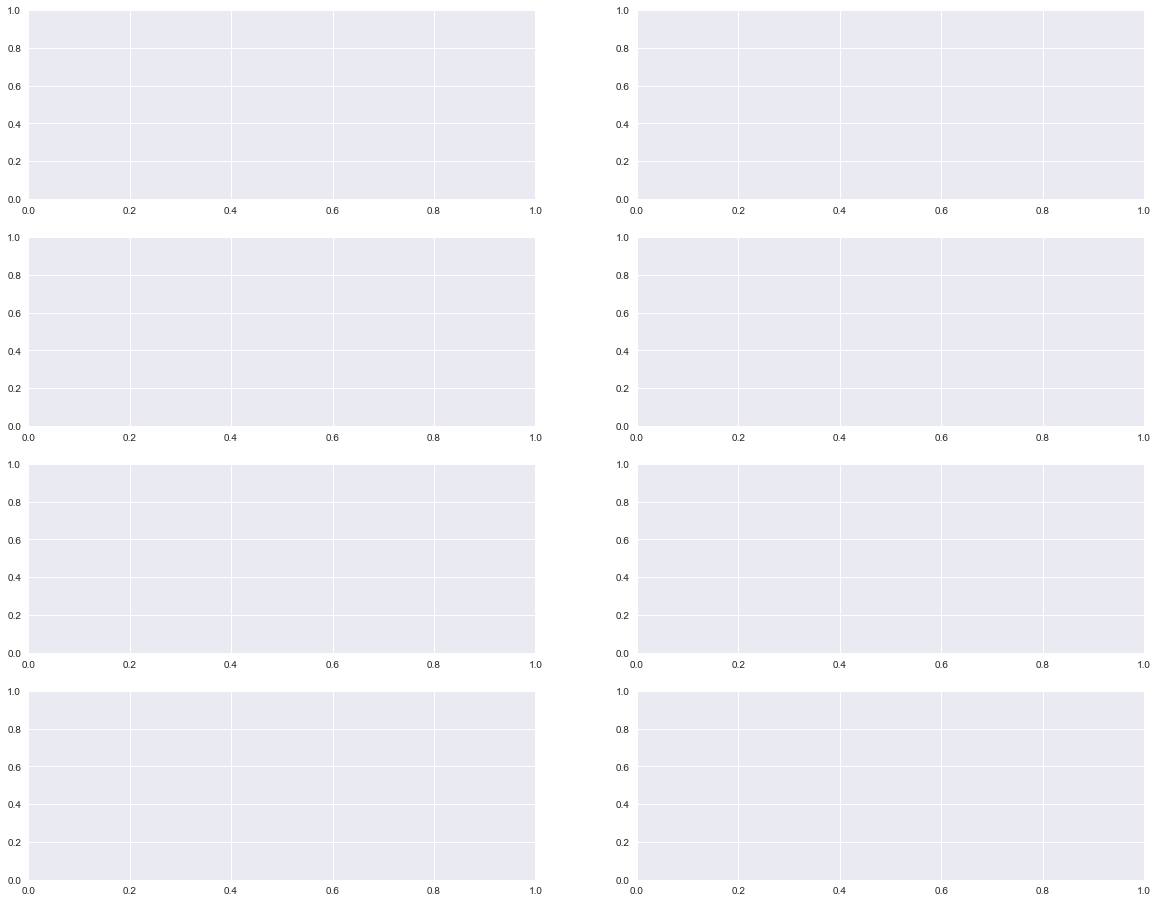

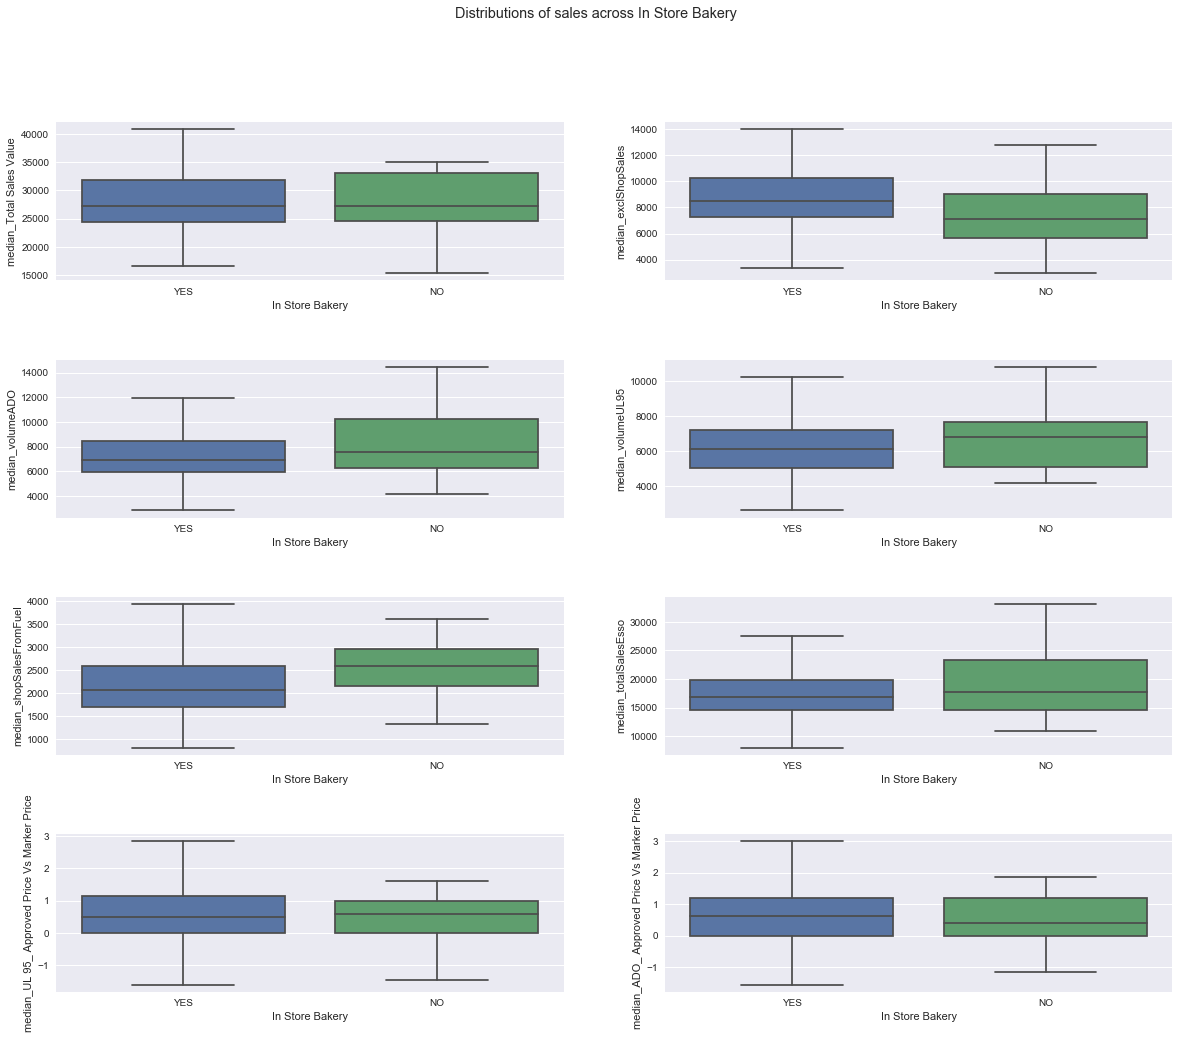

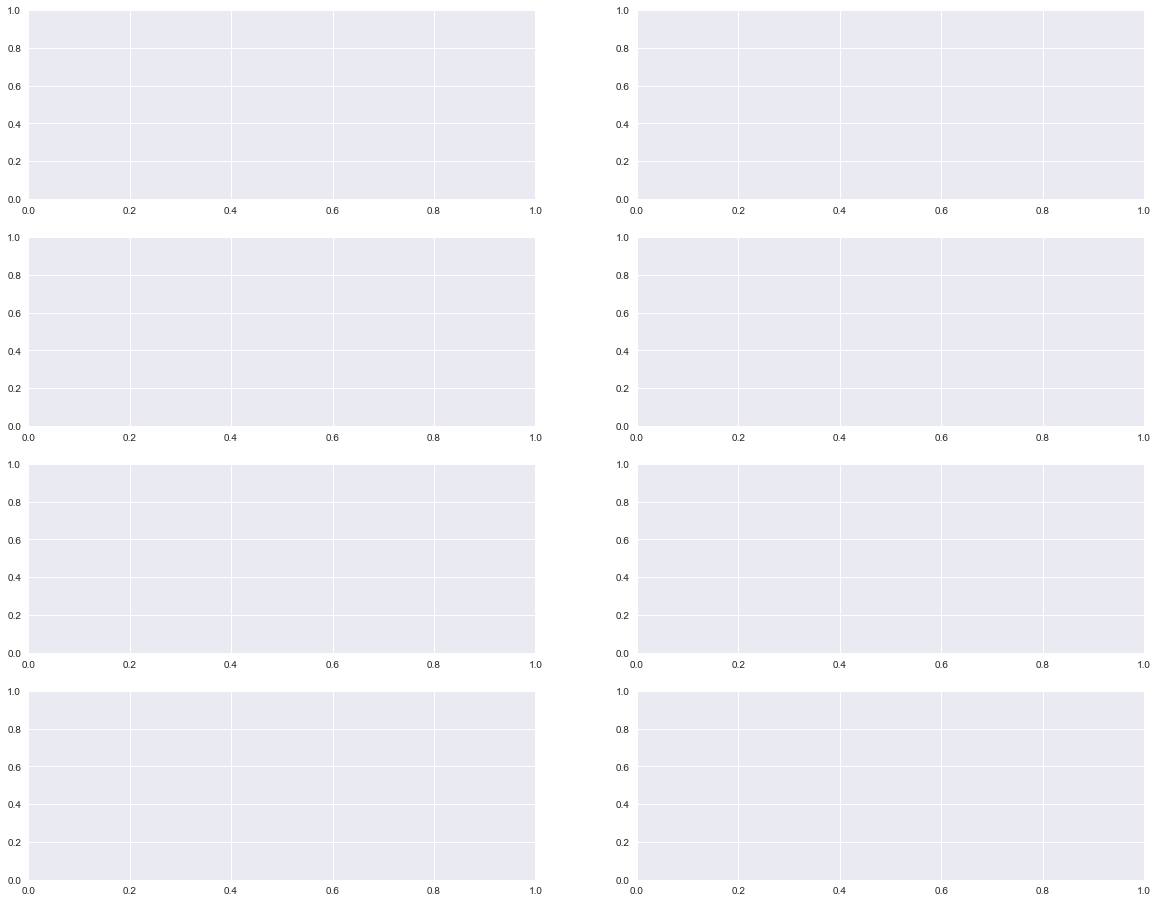

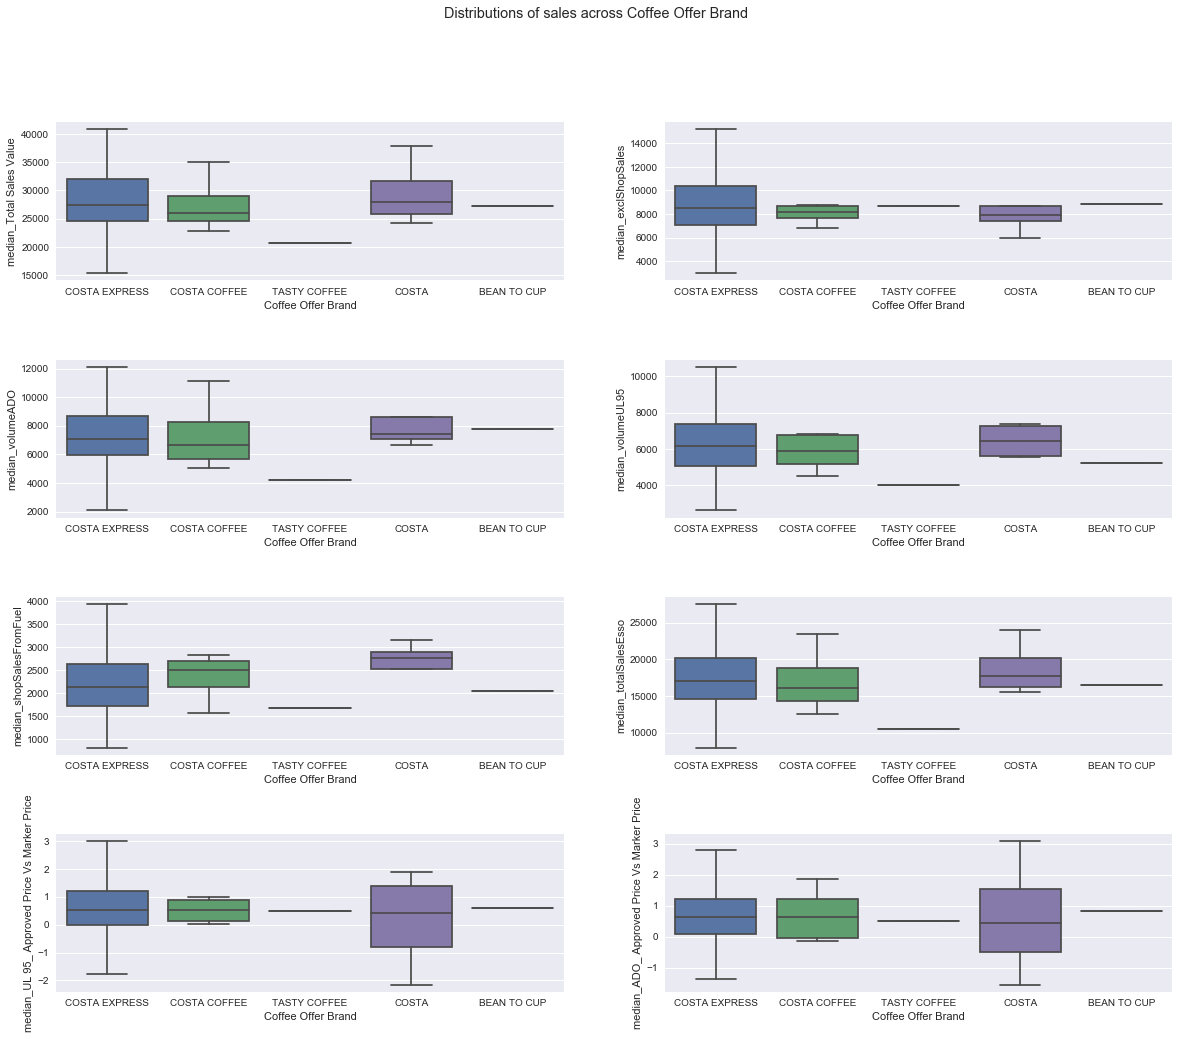

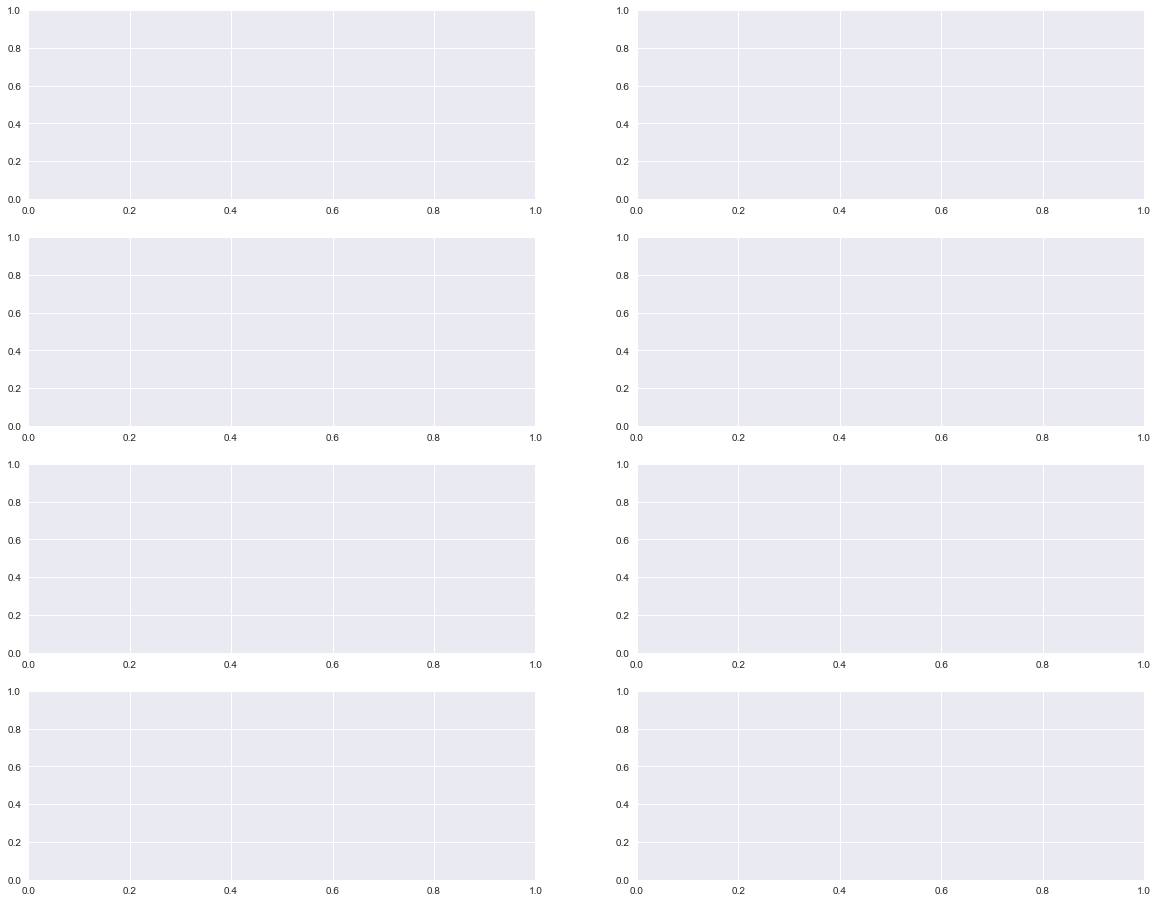

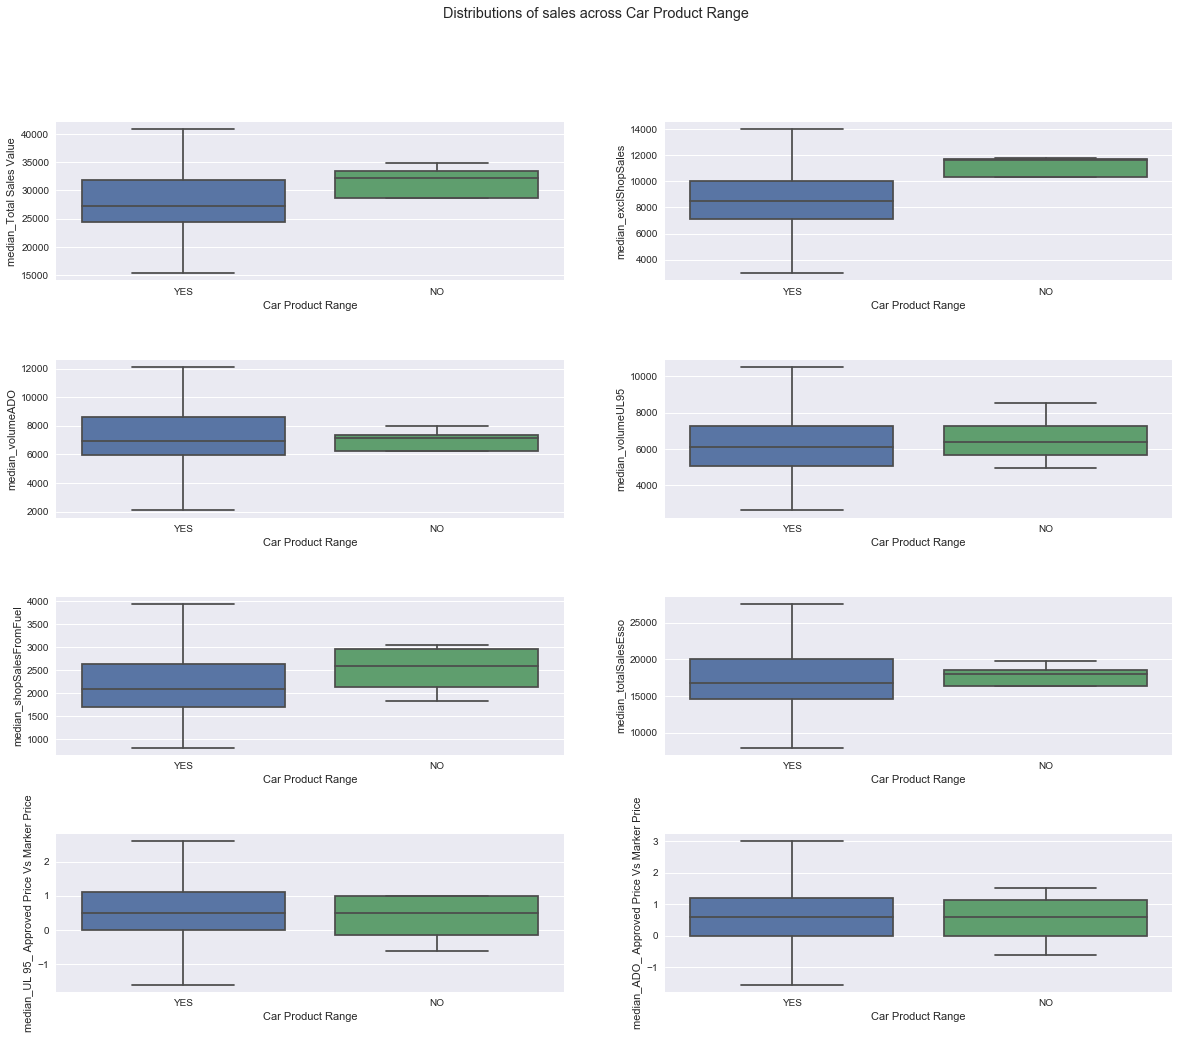

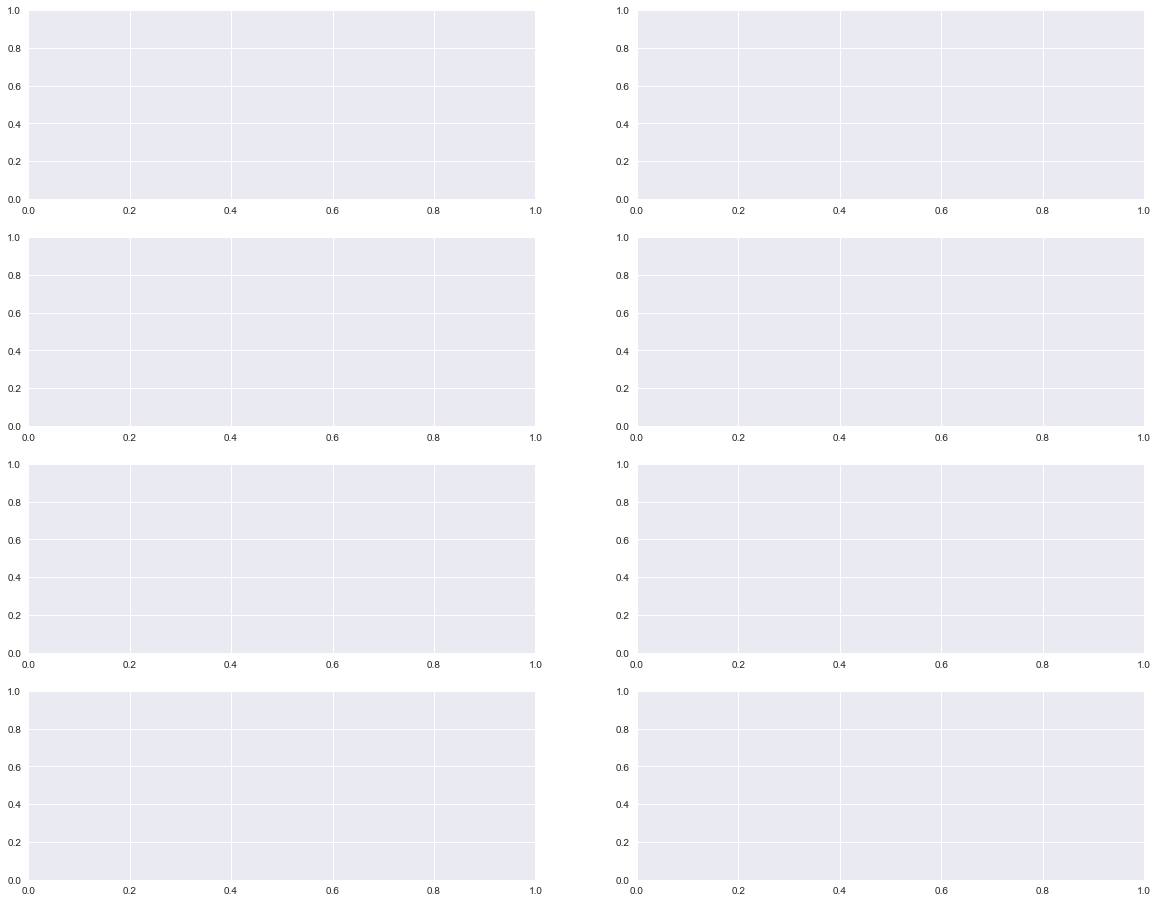

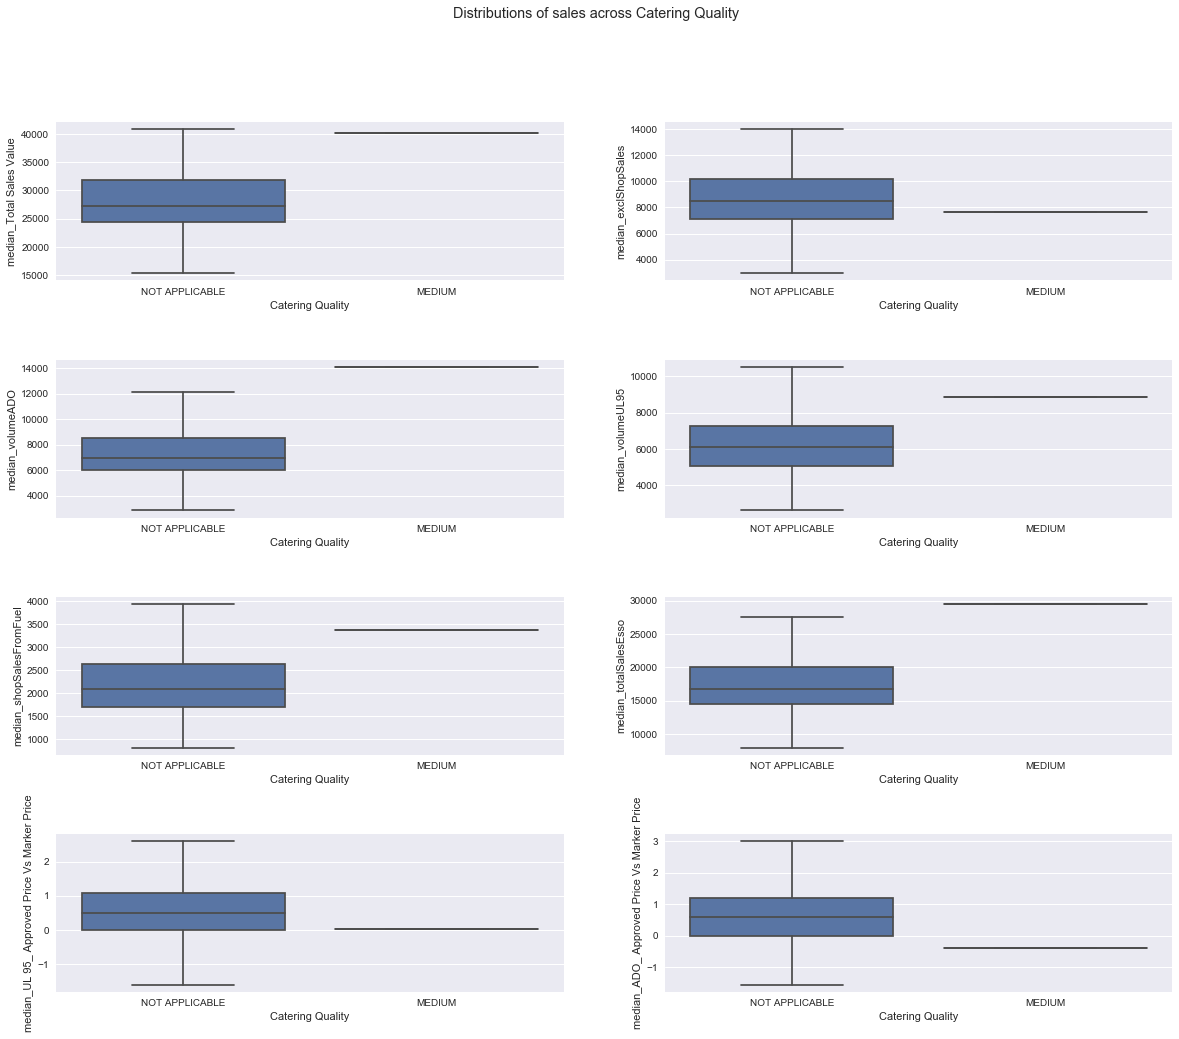

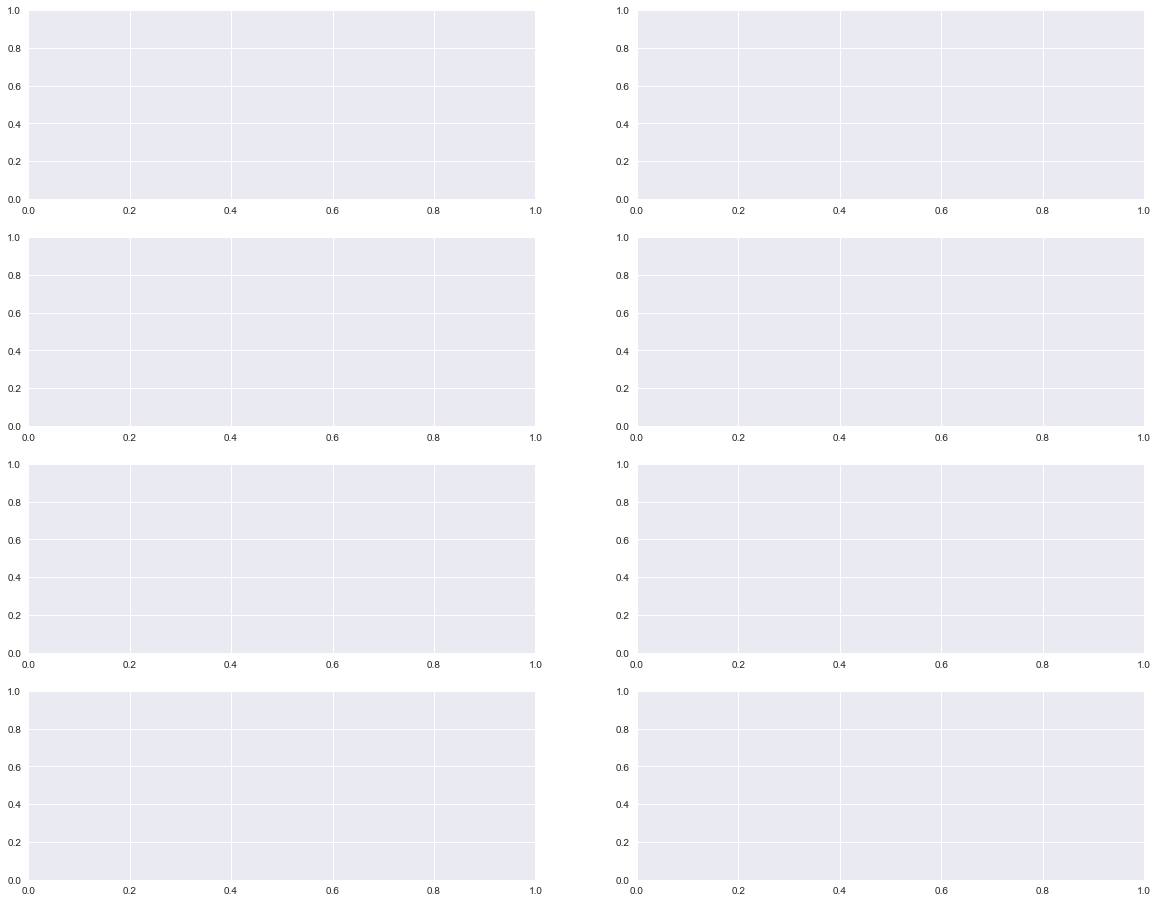

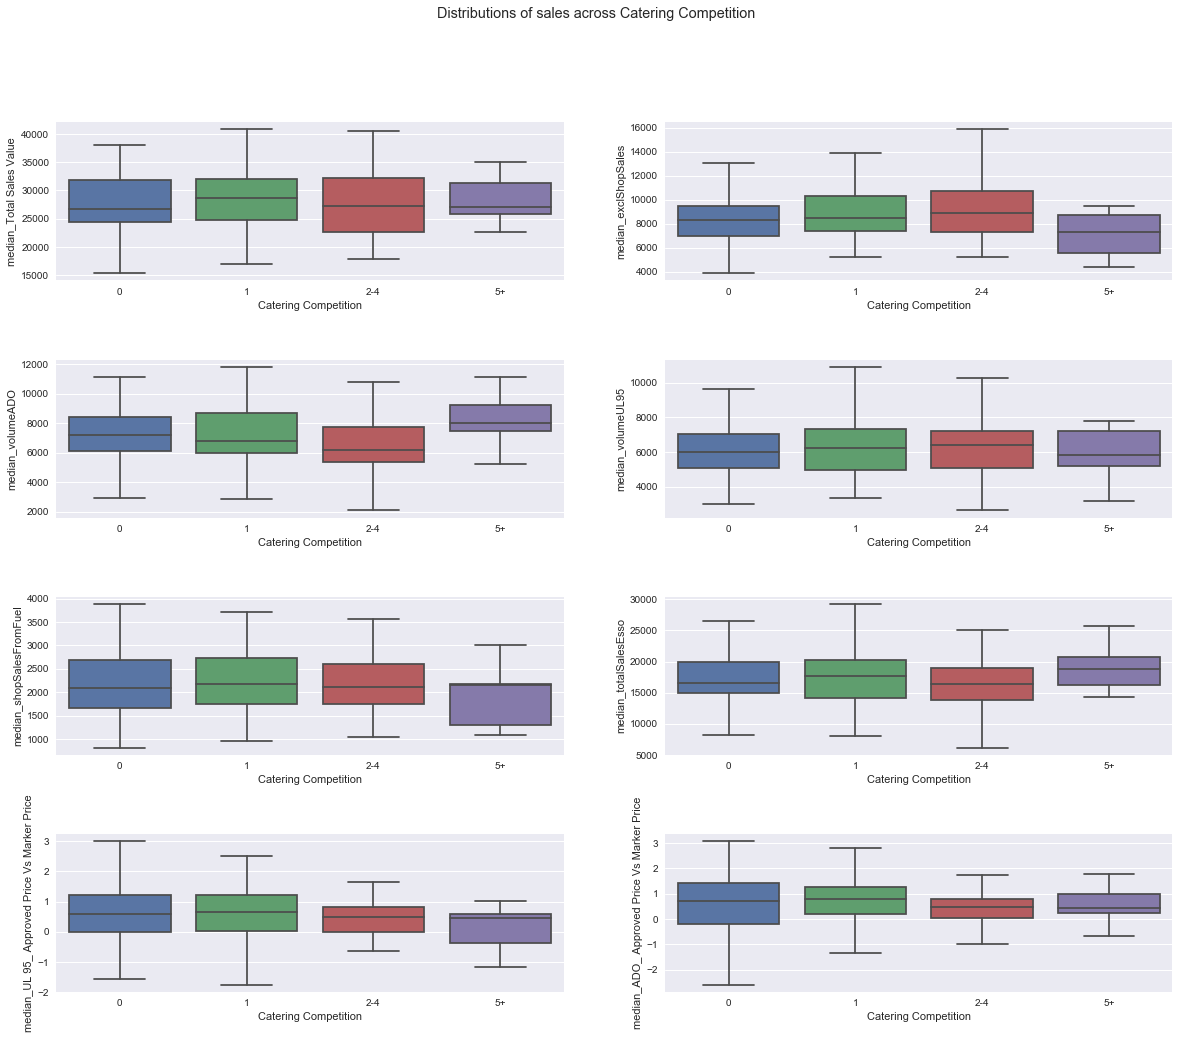

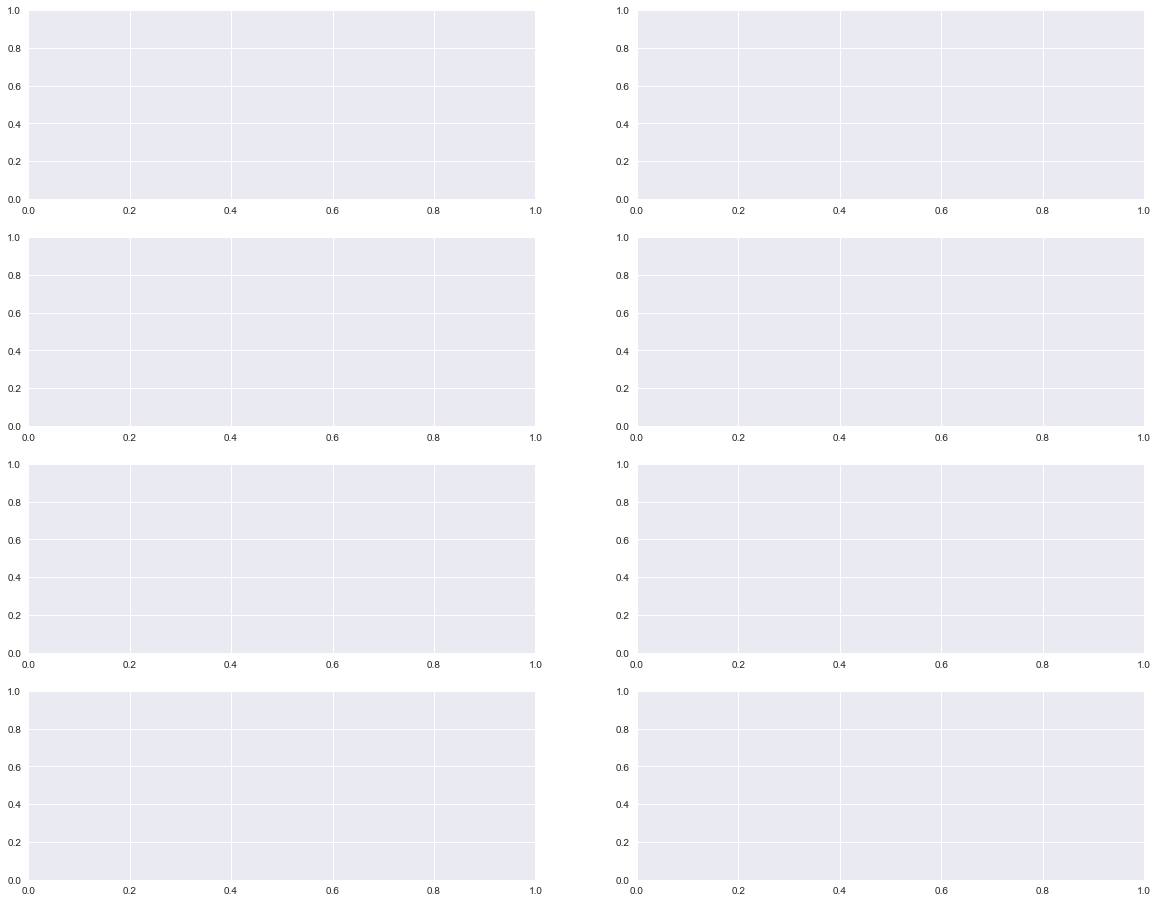

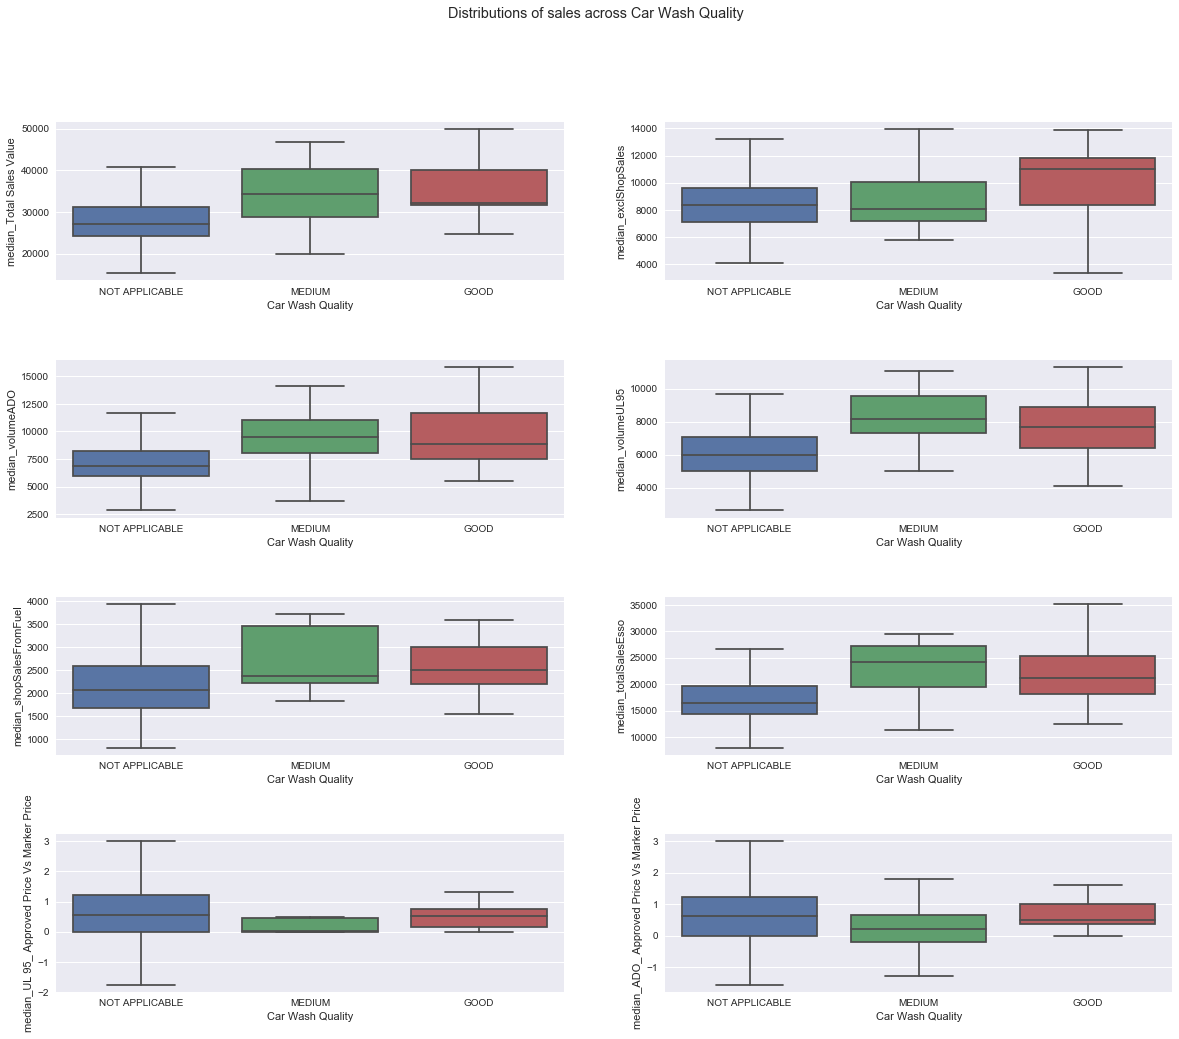

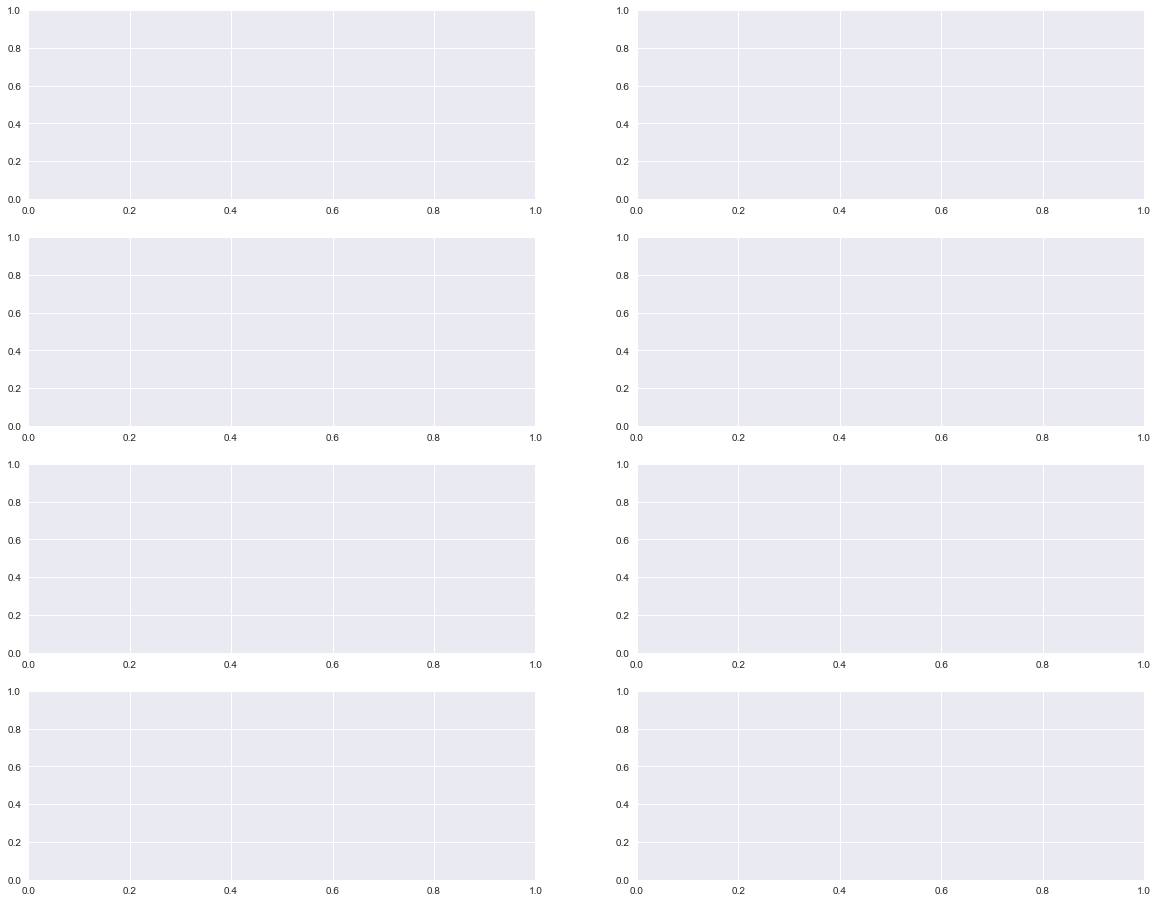

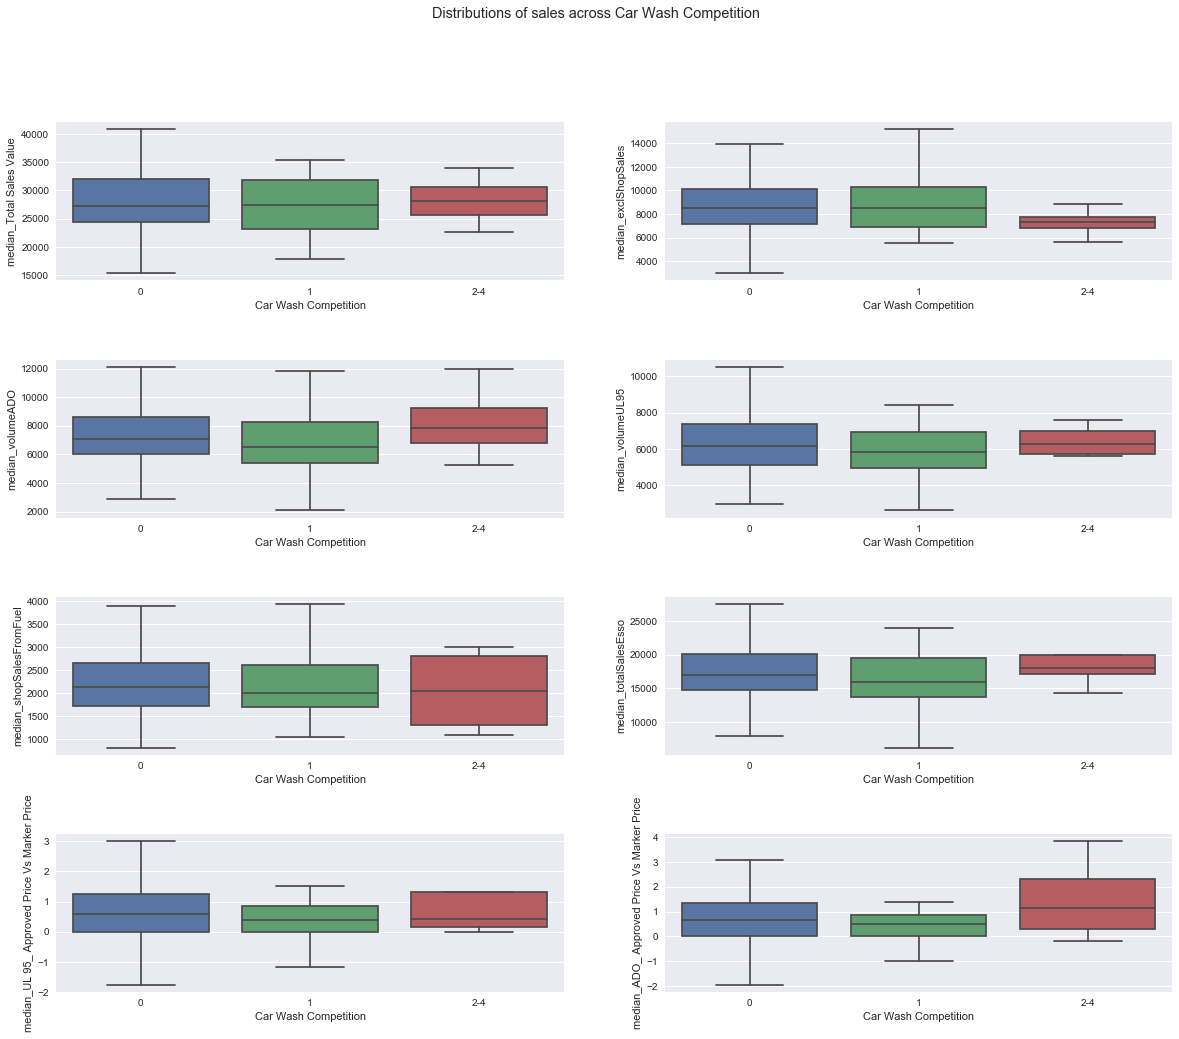

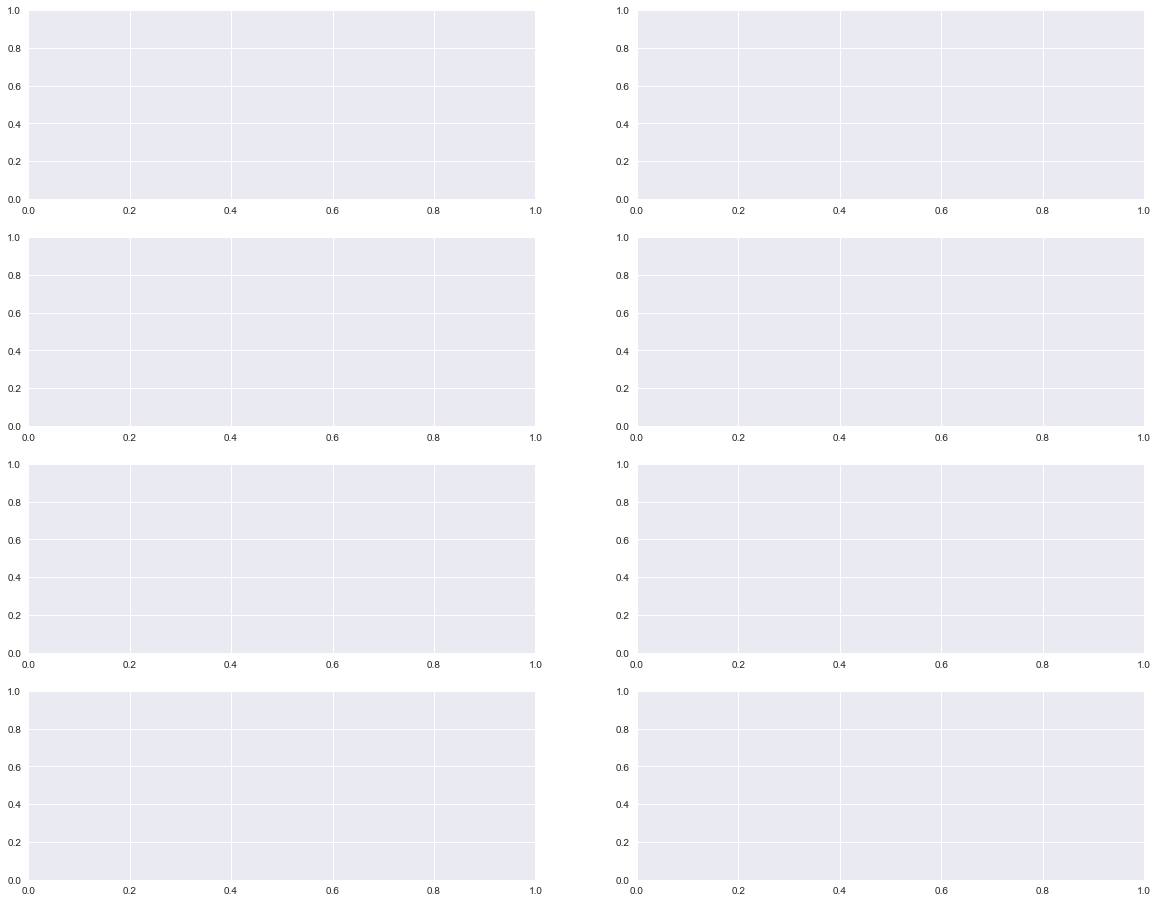

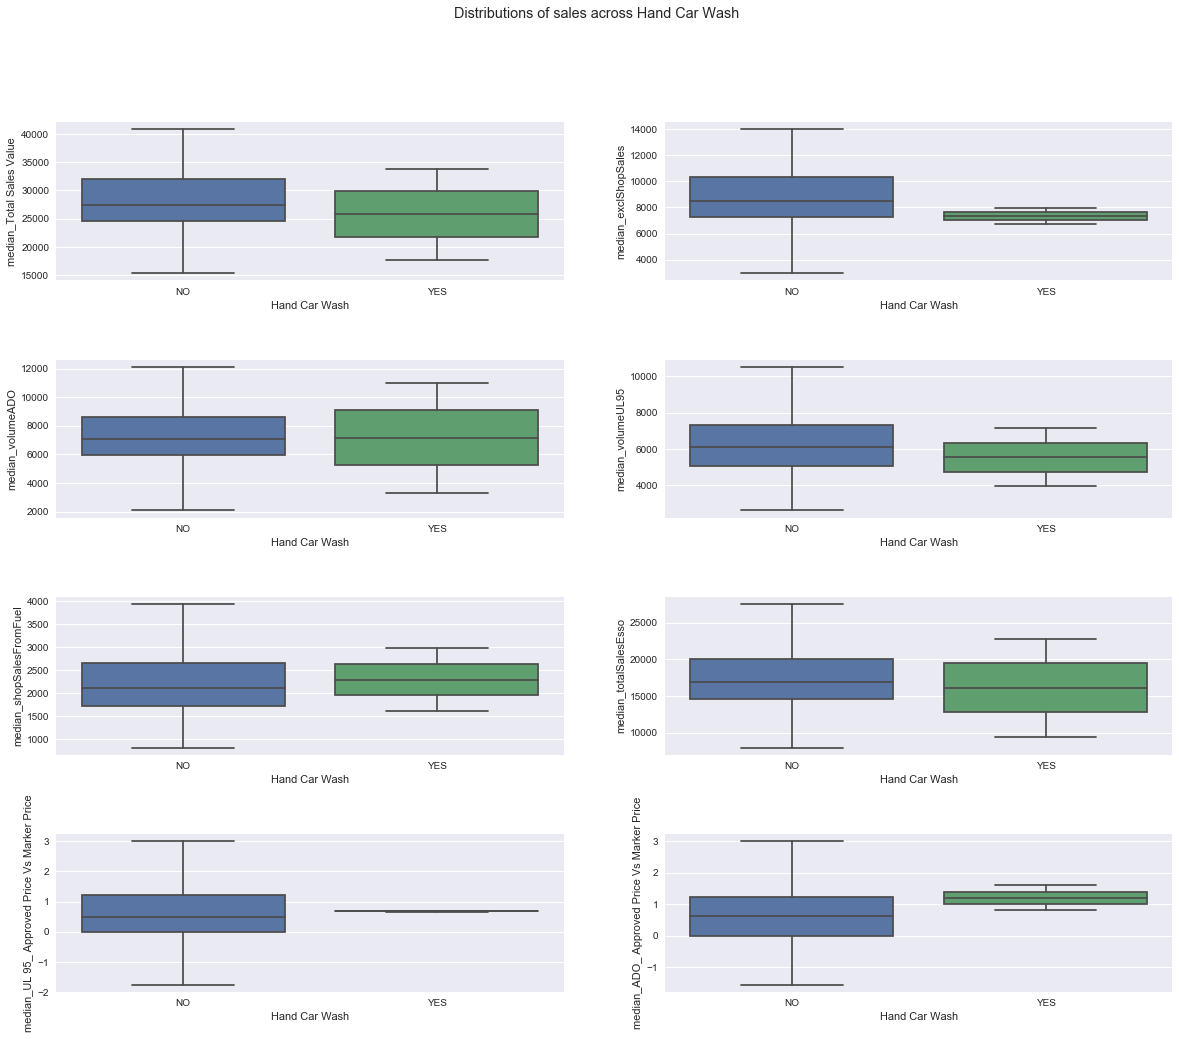

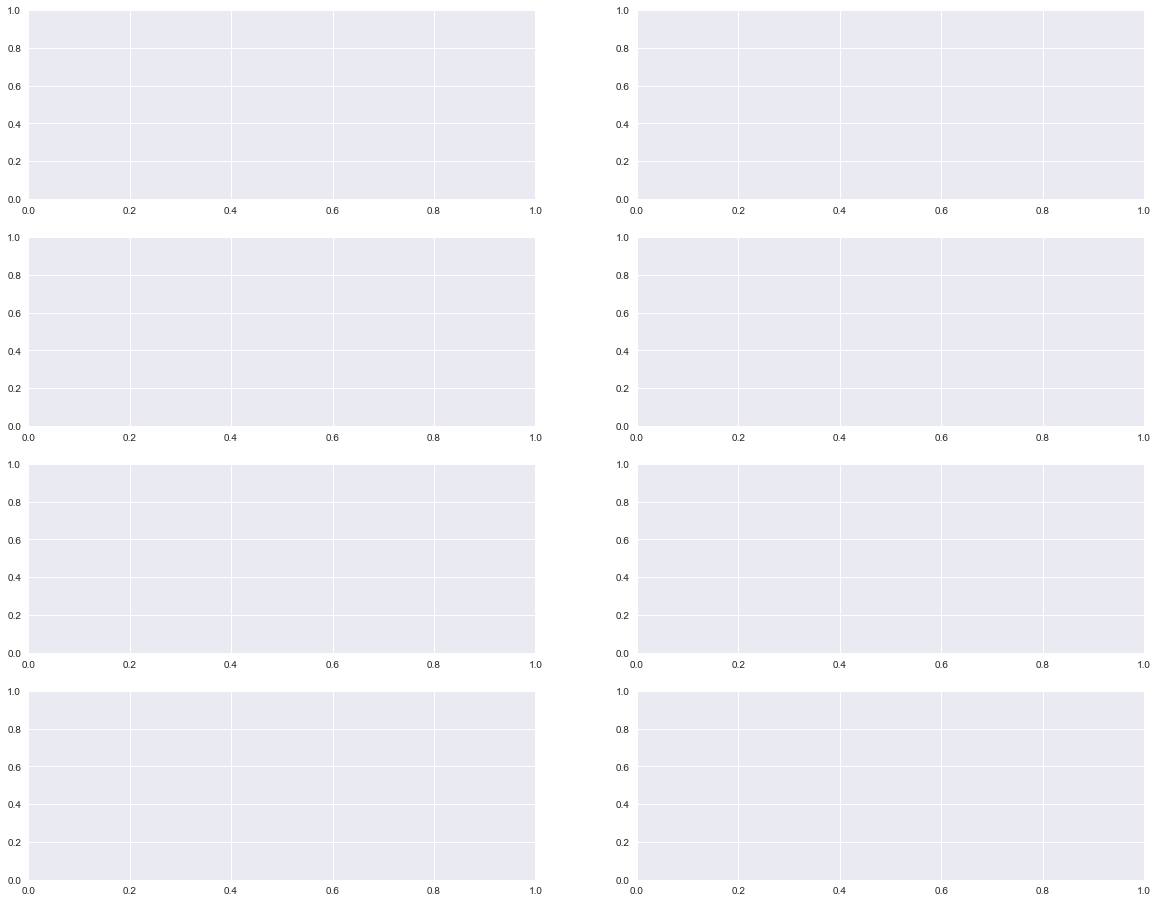

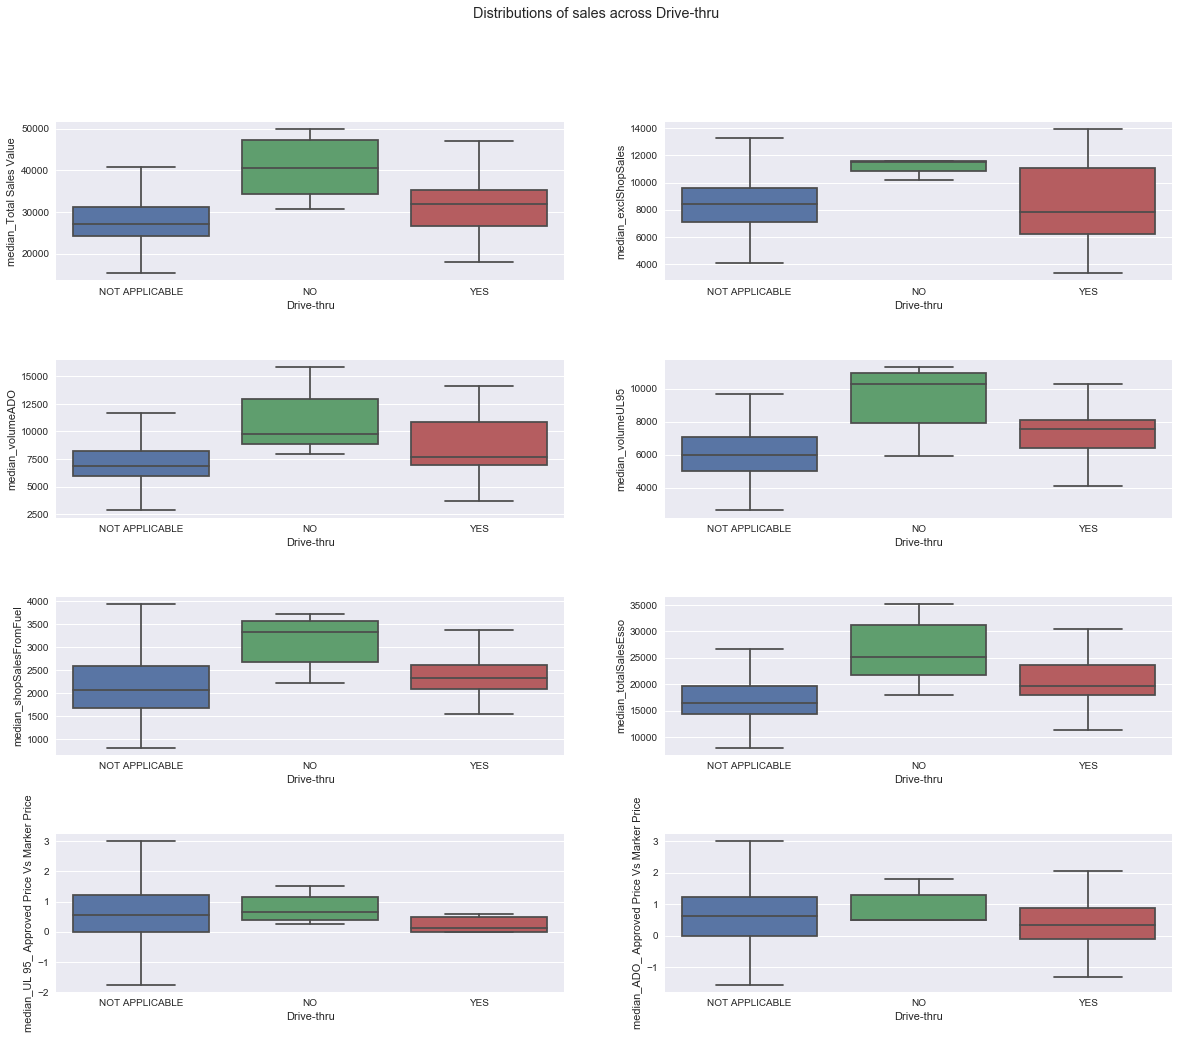

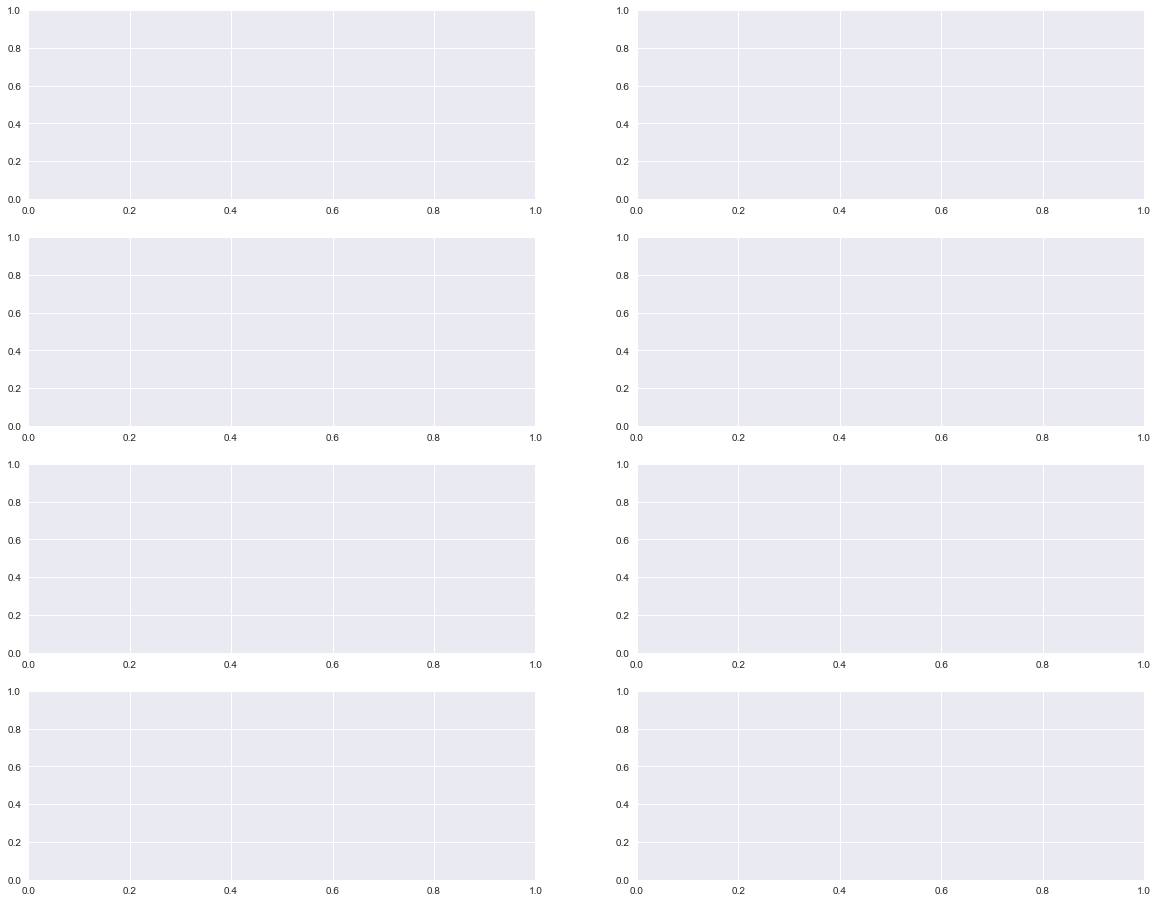

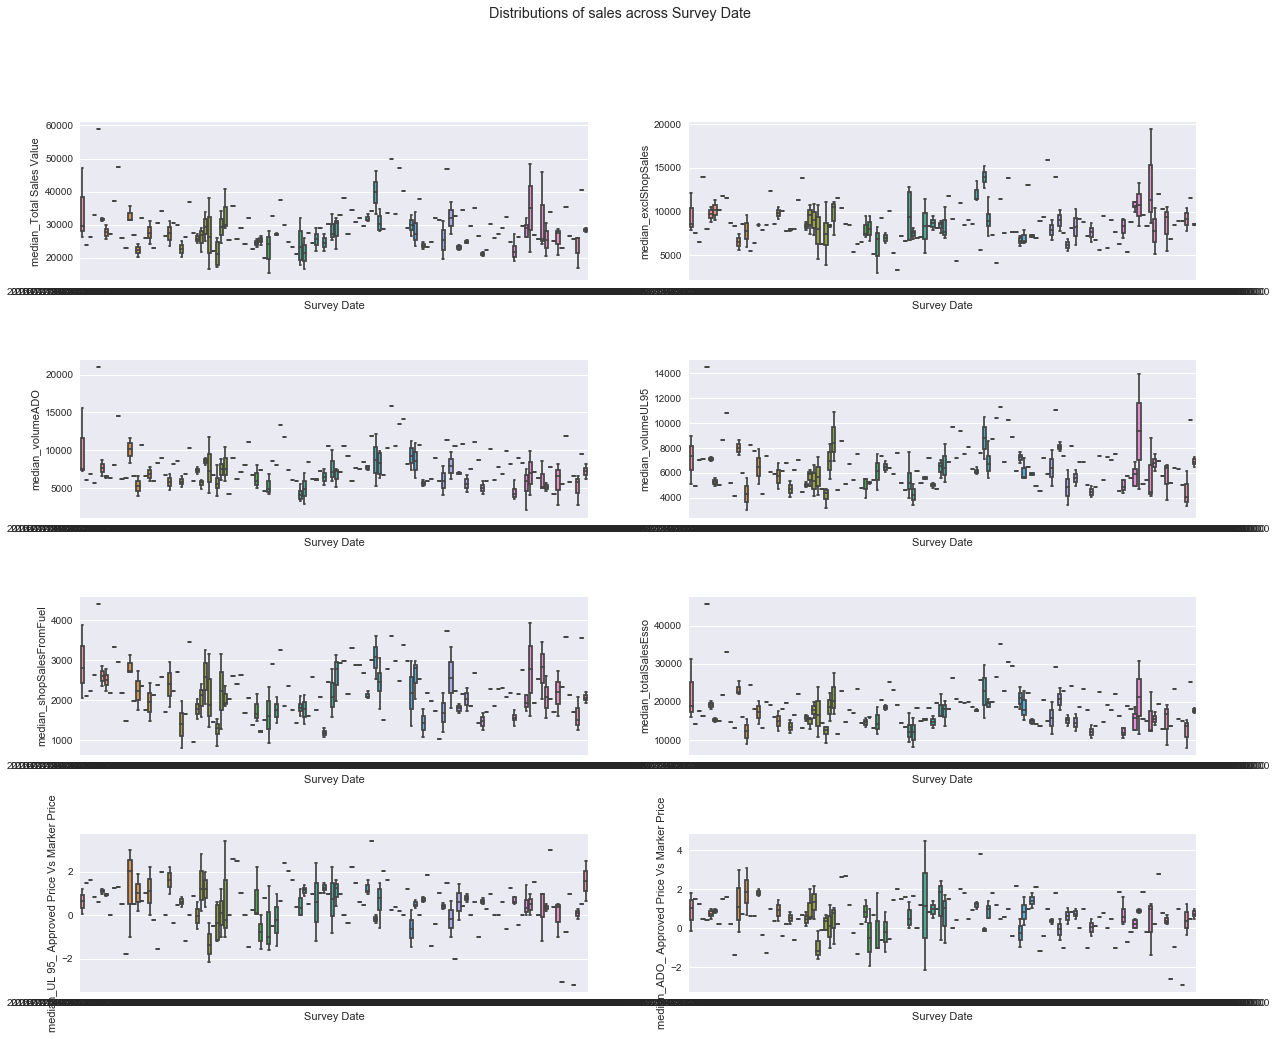

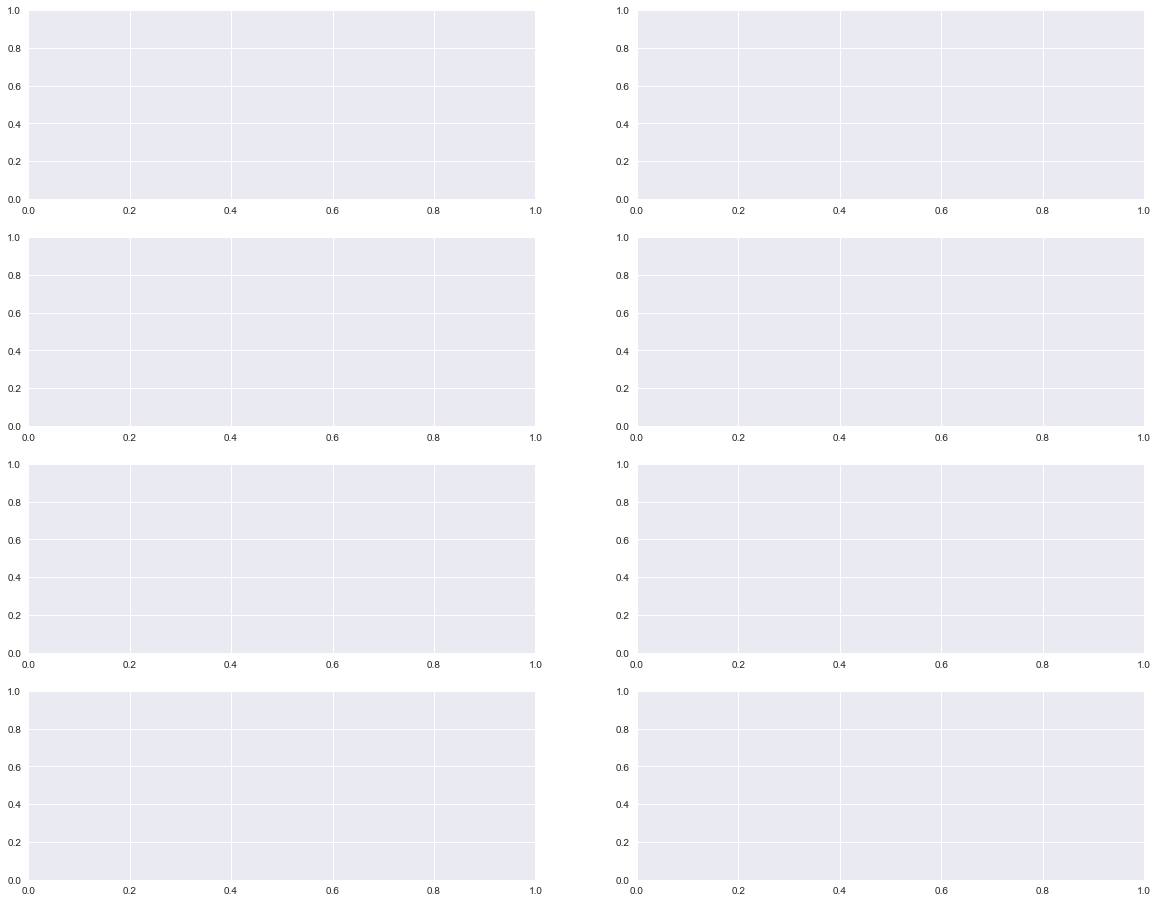

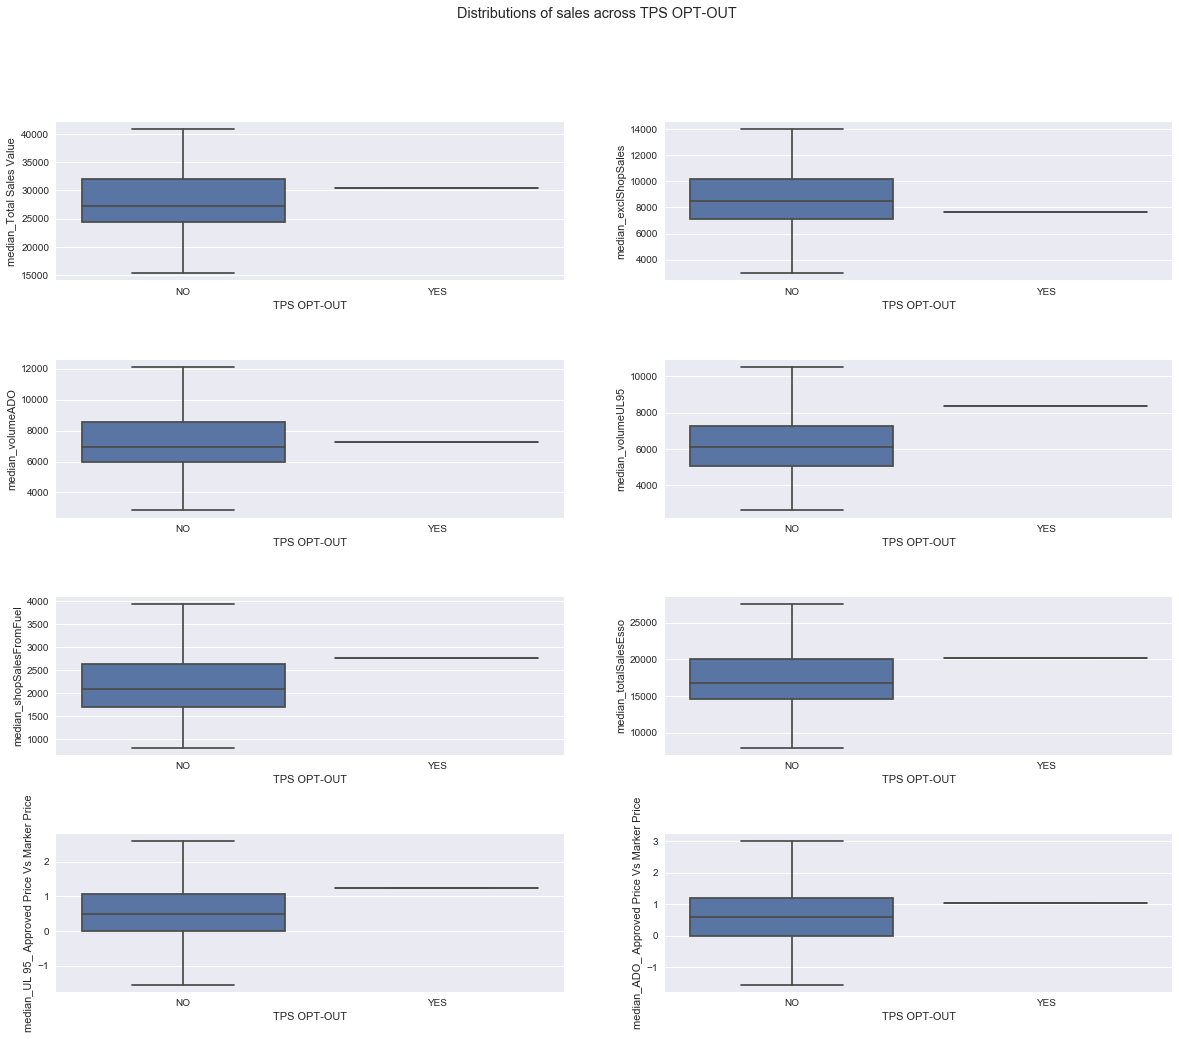

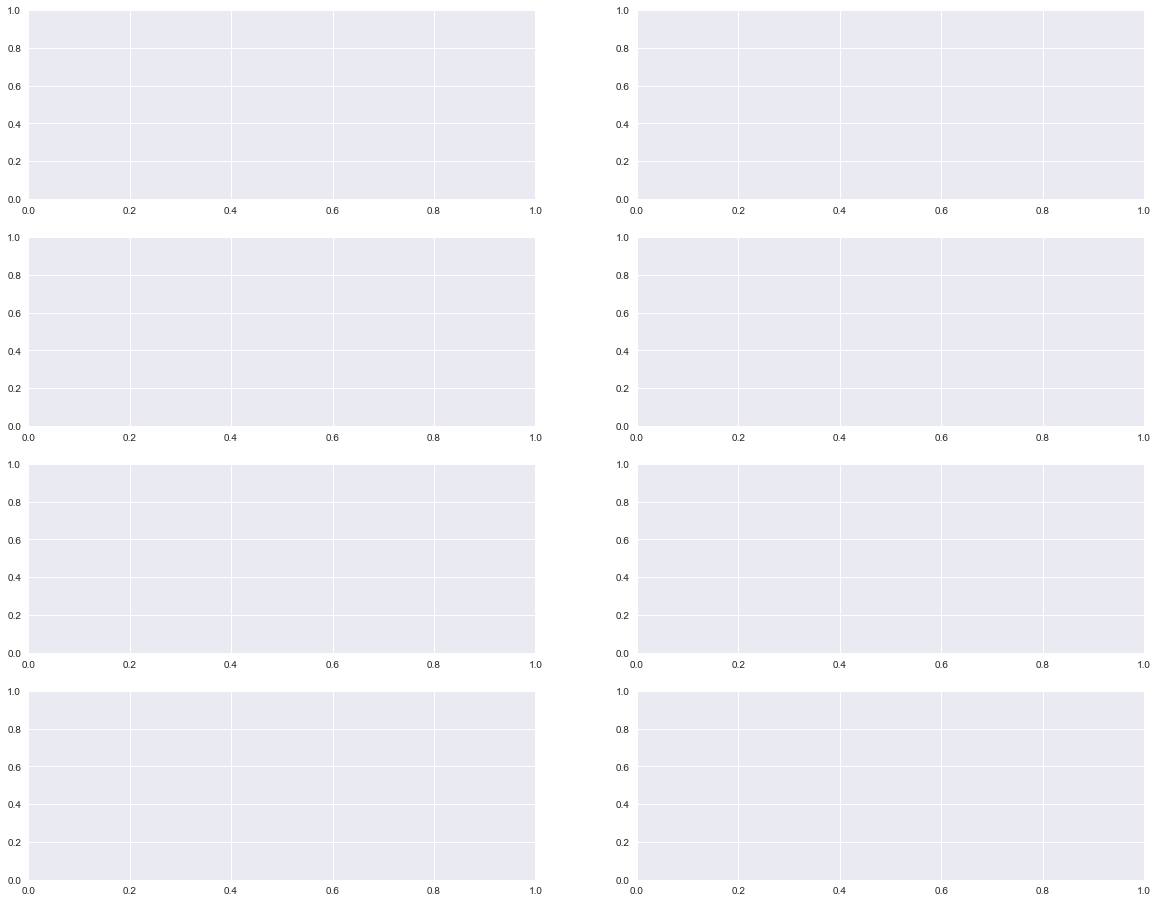

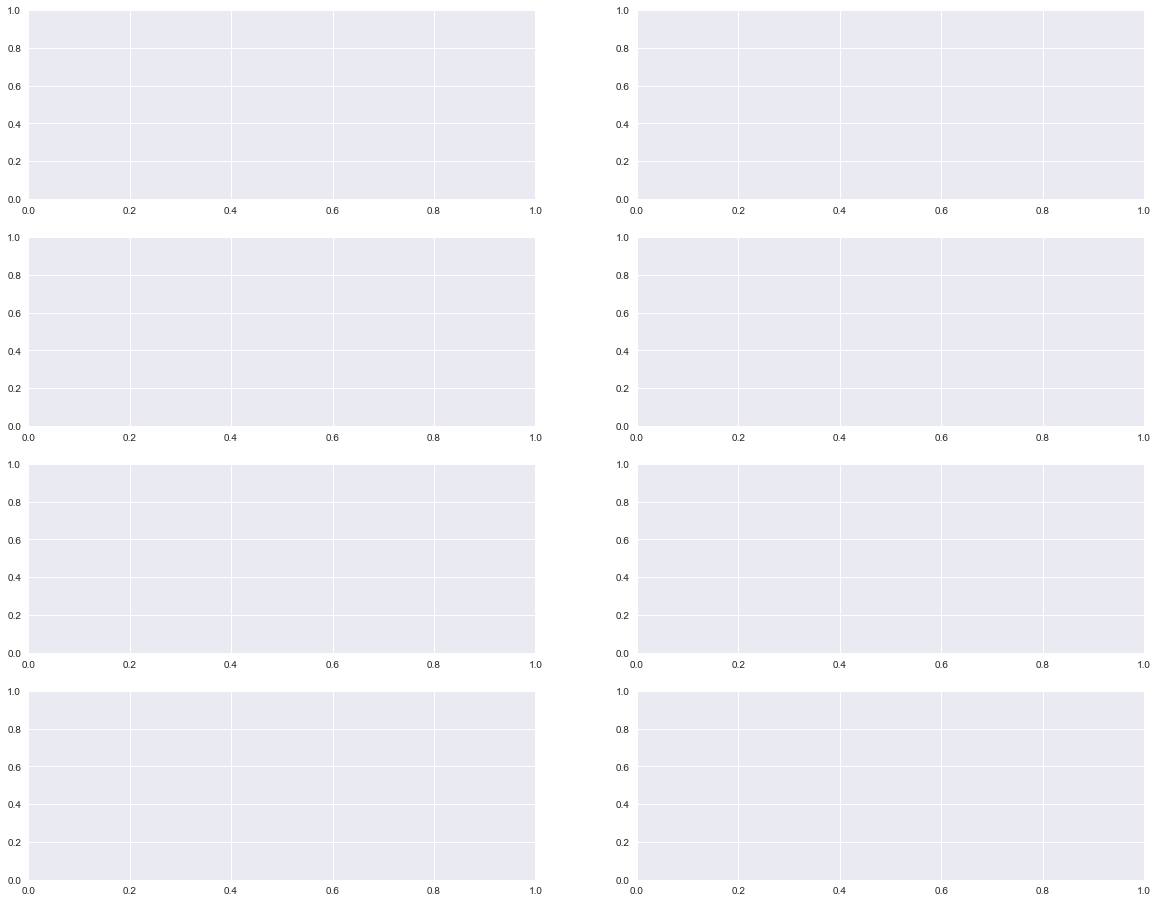

In [6]:
sns.set(rc={'figure.figsize':(20,16)})
for col in cols:
    print(col)
    try:
        fig, axes = plt.subplots(4,2)
        #fig.tight_layout()
        fig.subplots_adjust(hspace=0.5)
        fig.suptitle('Distributions of sales across '+str(col))
        for axx,y_val in zip(axes.flatten(),y_vals):
            sns.boxplot(x=col, y=y_val, data=df_site_agg_2,showfliers=False,ax=axx)    
        fig.savefig(path+"effect_of_"+str(col)+"_.png")
        fig, ax = plt.subplots(4,2)
        #fig.tight_layout()
    except Exception as e:
        print(e)

In [14]:
df_site_agg_2.to_pickle('df_site_agg_2.pkl')

In [ ]:
df_site_agg_2.columns = df_site_agg_2.columns.str.replace(" ","")

In [13]:
df_site_agg_2.columns

Index(['CatNumber', 'PBL', 'SiteName_x', 'Street', 'Town', 'COUNTY', 'Region',
       'LocalAuthorityArea', 'Postcode', 'PrimaryRoadNumber', 'Telephone',
       'PositionedX', 'PositionedY', 'LPG', 'LocationType', 'CarWash',
       'Catering', 'ServiceBays', 'ATM', 'ATMName', '24Hours', 'OpeningTime',
       'ClosingTime', 'PlotSizeFront', 'PlotSizeDepth', 'PlotSizeArea',
       'DevelopmentYear', 'Quality', 'Access', 'Visibility', 'PriTraffic',
       'SecTraffic', 'CarriagewayBarrier', 'HighlyTransient', 'TrafficSpeed',
       'ForecourtLayout', 'MFPumps', 'MFPositions', 'HGVPumps', 'HGVPositions',
       'LPGPumps', 'LPGPositions', 'MPDs', 'MFVolume', 'AutomatService',
       'DieselOnlyCards', 'CustomerToilets', 'ShopArea', 'ShopSales',
       'ShopQuality', 'DedicatedSpaces', 'PedestrianCustomers',
       'ShopCompetition', 'Alcohol', 'Lottery', 'TakeAwayFood', 'HotDrinks',
       'Microwave', 'InStoreBakery', 'CoffeeOfferBrand', 'CarProductRange',
       'CateringQuality', 'Cater

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
model = ols('sum_exclShopSales ~ CateringCompetition',data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df    F  PR(>F)
CateringCompetition   3,404,478,348,622.36   3.00 1.63    0.18
Residual            133,283,436,589,637.44 192.00  nan     nan

In [16]:
print(anova_table)

                                    sum_sq     df    F  PR(>F)
CateringCompetition   3,404,478,348,622.36   3.00 1.63    0.18
Residual            133,283,436,589,637.44 192.00  nan     nan


In [24]:
model1 = ols('sum_exclShopSales ~ CateringCompetition',data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model1, typ=1)
anova_table

df                 sum_sq              mean_sq    F  \
CateringCompetition   3.00   3,404,478,348,622.34 1,134,826,116,207.45 1.63   
Residual            192.00 133,283,436,589,637.44   694,184,565,571.03  nan   

                     PR(>F)  
CateringCompetition    0.18  
Residual                nan

In [22]:
model = ols('median_exclShopSales ~ CateringCompetition',data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

df           sum_sq       mean_sq    F  PR(>F)
CateringCompetition   3.00    60,640,125.93 20,213,375.31 3.66    0.01
Residual            192.00 1,059,408,371.23  5,517,751.93  nan     nan

In [38]:
anova_table

df                 sum_sq              mean_sq    F  \
CateringCompetition   3.00   3,404,478,348,622.34 1,134,826,116,207.45 1.63   
Residual            192.00 133,283,436,589,637.44   694,184,565,571.03  nan   

                     PR(>F)  
CateringCompetition    0.18  
Residual                nan

In [39]:
anova_table.iloc[0,4]

0.1827083177219575

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sum_exclShopSales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.635
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.183
Time:                        14:41:23   Log-Likelihood:                -2948.2
No. Observations:                 196   AIC:                             5904.
Df Residuals:                     192   BIC:                             5917.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.705e+06   8.98e+04     30.107      0.000    2.53e+06    2.88e+06
CateringCompetition[T.1]    1.147e+05   1.38e+05      0.830      0.408   -1.58e+05    3.87e+05
CateringCompetition[T.2-4]  2.779e+05   1.62e+05      1.712      0.088   -4.22e+04    5.98e+05
CateringCompetition[T.5+]  -2.989e+05   2.92e+05     -1.024      0.307   -8.75e+05    2.77e+05
==============================================================================
Omnibus:                       16.234   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.266
Skew:                           0.371   Prob(JB):                     5.98e-08
Kurtosis:                       4.877   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
any(model1.pvalues.values[1:] <= 0.05)

False

In [ ]:
model = ols('median_exclShopSales ~ CateringCompetition',data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

In [ ]:
# which factors are imprtant for exclusive shop sales # 

In [45]:
cols[0]

'24Hours'

In [57]:
model = ols(lm_exp,data =df_site_agg_2).fit()

In [54]:
lm_exp = cols[1]+' ~ CateringCompetition'

In [55]:
lm_exp

'OpeningTime ~ CateringCompetition'

In [59]:
model = ols('median_exclShopSales ~ OpeningTime',data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

df         sum_sq       mean_sq     F  PR(>F)
OpeningTime   4.00 246,252,557.04 61,563,139.26 13.46    0.00
Residual    191.00 873,795,940.12  4,574,847.85   nan     nan

In [66]:
lm_exp = 'median_exclShopSales ~ '+ cols[3]
model = ols(lm_exp,data =df_site_agg_2).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

df           sum_sq       mean_sq    F  PR(>F)
PlotSizeFront   1.00    11,933,314.94 11,933,314.94 2.09    0.15
Residual      194.00 1,108,115,182.21  5,711,933.93  nan     nan

In [63]:
cols

['24Hours',
 'OpeningTime',
 'ClosingTime',
 'PlotSizeFront',
 'PlotSizeDepth',
 'PlotSizeArea',
 'Quality',
 'Access',
 'Visibility',
 'PriTraffic',
 'SecTraffic',
 'CarriagewayBarrier',
 'HighlyTransient',
 'TrafficSpeed',
 'ForecourtLayout',
 'MFPumps',
 'MFPositions',
 'HGVPumps',
 'HGVPositions',
 'LPGPumps',
 'LPGPositions',
 'MPDs',
 'MFVolume',
 'AutomatService',
 'DieselOnlyCards',
 'CustomerToilets',
 'ShopArea',
 'ShopSales',
 'ShopQuality',
 'DedicatedSpaces',
 'PedestrianCustomers',
 'ShopCompetition',
 'Alcohol',
 'Lottery',
 'TakeAwayFood',
 'HotDrinks',
 'Microwave',
 'InStoreBakery',
 'CoffeeOfferBrand',
 'CarProductRange',
 'CateringQuality',
 'CateringCompetition',
 'CarWashQuality',
 'CarWashCompetition',
 'HandCarWash',
 'Drive-thru',
 'SurveyDate',
 'TPSOPT-OUT',
 'CTPSOPT-OUT']

In [68]:
cols_imp = list()
for col in cols:
    print(col)
    try:
        lm_exp = 'median_exclShopSales ~ '+ col
        model = ols(lm_exp,data =df_site_agg_2).fit()
        #anova_table = sm.stats.anova_lm(model, typ=1)
        #p_val = anova_table.iloc[0,4]
        if any(model.pvalues.values[1:] <= 0.05):
            cols_imp.append(col)
    except Exception as e:
        print(e)

24Hours
invalid syntax (<unknown>, line 1)
OpeningTime
ClosingTime
PlotSizeFront
PlotSizeDepth
PlotSizeArea
Quality
Access
Visibility
PriTraffic
SecTraffic
CarriagewayBarrier
HighlyTransient
TrafficSpeed
ForecourtLayout
MFPumps
MFPositions
HGVPumps
HGVPositions
LPGPumps
LPGPositions
MPDs
MFVolume
AutomatService
DieselOnlyCards
CustomerToilets
ShopArea
ShopSales
ShopQuality
DedicatedSpaces
PedestrianCustomers
ShopCompetition
Alcohol
Lottery
TakeAwayFood
HotDrinks
Microwave
InStoreBakery
CoffeeOfferBrand
CarProductRange
CateringQuality
CateringCompetition
CarWashQuality
CarWashCompetition
HandCarWash
Drive-thru
Error evaluating factor: NameError: name 'Drive' is not defined
    median_exclShopSales ~ Drive-thru
                           ^^^^^
SurveyDate
TPSOPT-OUT
Error evaluating factor: NameError: name 'TPSOPT' is not defined
    median_exclShopSales ~ TPSOPT-OUT
                           ^^^^^^
CTPSOPT-OUT
Error evaluating factor: NameError: name 'CTPSOPT' is not defined
    median_

In [69]:
cols_imp

['OpeningTime',
 'MFPumps',
 'MFPositions',
 'MFVolume',
 'AutomatService',
 'ShopSales',
 'DedicatedSpaces',
 'InStoreBakery',
 'CateringCompetition',
 'SurveyDate']

In [71]:
cols_imp = list()
for col in cols:
    print(col)
    try:
        lm_exp = 'median_exclShopSales ~ '+ col
        model = ols(lm_exp,data =df_site_agg_2).fit()
        anova_table = sm.stats.anova_lm(model, typ=1)
        p_val = anova_table.iloc[0,4]
#         if any(model.pvalues.values[1:] <= 0.05):
        if p_val <= 0.05:
            cols_imp.append(col)
    except Exception as e:
        print(e)

24Hours
invalid syntax (<unknown>, line 1)
OpeningTime
ClosingTime
PlotSizeFront
PlotSizeDepth
PlotSizeArea
Quality
Access
Visibility
PriTraffic
SecTraffic
CarriagewayBarrier
HighlyTransient
TrafficSpeed
ForecourtLayout
MFPumps
MFPositions
HGVPumps
HGVPositions
LPGPumps
LPGPositions
MPDs
MFVolume
AutomatService
DieselOnlyCards
CustomerToilets
ShopArea
ShopSales
ShopQuality
DedicatedSpaces
PedestrianCustomers
ShopCompetition
Alcohol
Lottery
TakeAwayFood
HotDrinks
Microwave
InStoreBakery
CoffeeOfferBrand
CarProductRange
CateringQuality
CateringCompetition
CarWashQuality
CarWashCompetition
HandCarWash
Drive-thru
Error evaluating factor: NameError: name 'Drive' is not defined
    median_exclShopSales ~ Drive-thru
                           ^^^^^
SurveyDate
TPSOPT-OUT
Error evaluating factor: NameError: name 'TPSOPT' is not defined
    median_exclShopSales ~ TPSOPT-OUT
                           ^^^^^^
CTPSOPT-OUT
Error evaluating factor: NameError: name 'CTPSOPT' is not defined
    median_

In [72]:
cols_imp

['OpeningTime',
 'MFPumps',
 'MFPositions',
 'MFVolume',
 'AutomatService',
 'ShopSales',
 'DedicatedSpaces',
 'InStoreBakery',
 'CateringCompetition']

In [74]:
cols_imp = list()
for col in cols:
    try:
        lm_exp = 'sum_exclShopSales ~ '+ col
        model = ols(lm_exp,data =df_site_agg_2).fit()
        anova_table = sm.stats.anova_lm(model, typ=1)
        p_val = anova_table.iloc[0,4]
#         if any(model.pvalues.values[1:] <= 0.05):
        if p_val <= 0.05:
            cols_imp.append(col)
    except Exception as e:
        print(e)

invalid syntax (<unknown>, line 1)
Error evaluating factor: NameError: name 'Drive' is not defined
    sum_exclShopSales ~ Drive-thru
                        ^^^^^
Error evaluating factor: NameError: name 'TPSOPT' is not defined
    sum_exclShopSales ~ TPSOPT-OUT
                        ^^^^^^
Error evaluating factor: NameError: name 'CTPSOPT' is not defined
    sum_exclShopSales ~ CTPSOPT-OUT
                        ^^^^^^^


In [75]:
cols_imp

['OpeningTime',
 'AutomatService',
 'ShopSales',
 'ShopQuality',
 'DedicatedSpaces']